# 🚀VERİ ANALİZİ RAPORU: HCI Digital Life Survey 2025

## Veri Seti Girişi ve Analiz Amacı

Bu çalışma, **Human Clarity Institute (HCI)** tarafından 2025 yılında toplanan **Dijital Yaşam Anketi** verilerine dayanmaktadır. Temel amaç, modern dijital dünyanın, bireylerin psikolojik durumu, davranış kalıpları ve sosyal güven algıları üzerindeki etkilerini incelemektir.

Veri setindeki gözlemler, katılımcıların günlük teknoloji kullanım sürelerinden yapay zeka (AI) hakkındaki endişelerine, çevrimiçi içerik güveninden istihdam durumlarına kadar geniş bir yelpazede bilgi sunmaktadır.

### 🎯 Projenin Temel Analitik Odak Noktaları

Bu analizi yürütürken aşağıdaki ana temalar ve sorulara odaklanılmıştır:

1.  **Dijital Refah ve Bağımlılık (Regret):**
    * Günlük çevrimiçi kalma süresi ile bu süreden duyulan pişmanlık arasında nasıl bir ilişki vardır?
    * Bu pişmanlık düzeyi, yaş grupları arasında farklılık gösteriyor mu?

2.  **Dijital Yorgunluk (Digital Fatigue):**
    * Online geçirilen sürenin artması, bireylerin gün sonunda hissettiği enerji seviyesini nasıl etkilemektedir?

3.  **Güven ve Algı:**
    * Büyük Teknoloji şirketlerine duyulan kurumsal güven, içerik güvenini (Örn: Değerlerle uyum) ne ölçüde etkilemektedir?
    * Kullanıcıların en az güvendiği içerik türleri, onların ortalama online saatlerini nasıl etkiliyor?

4.  **Veri Kalitesi ve Denge Kontrolü:**
    * Analiz ve modelleme aşamasına geçmeden önce, veri setinin demografik değişkenler (Yaş Grubu, Cinsiyet, İstihdam Durumu) açısından dengeli  olup olmadığını tespit etmek. 

Bu rapor, titizlikle uygulanan temizlik ve ön işleme adımlarının ardından, EDA (Keşifsel Veri Analizi) ile elde edilen kritik analitik kanıtları ve çıkarımları sunmaktadır.

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("✅ Kütüphaneler başarıyla yüklendi!")

✅ Kütüphaneler başarıyla yüklendi!


In [178]:
file_path = "/kaggle/input/hci-2025-digital-life-survey/HCI_2025_DigitalLifeSurvey_public.csv"
df = pd.read_csv(file_path)
print(f"✅ VERİ GERİ YÜKLENDİ! Satır: {df.shape[0]}, Sütun: {df.shape[1]},Toplam gözlem: {df.shape[0] * df.shape[1]}")
print(f"💾 Sonraki kayıpları önlemek için şimdi backup al:")
df_backup = df.copy()
print(f"📦 Backup oluşturuldu: 'df_backup' değişkeninde")

✅ VERİ GERİ YÜKLENDİ! Satır: 1003, Sütun: 45,Toplam gözlem: 45135
💾 Sonraki kayıpları önlemek için şimdi backup al:
📦 Backup oluşturuldu: 'df_backup' değişkeninde


## 📂 Veri Setinin Yüklenmesi ve Yedeklenmesi

Bu adımda veri seti CSV dosyasından **sıfırdan** yüklenmektedir.  
Veri kaybı riskine karşı, yüklenen veri setinin bir **yedek kopyası** oluşturulur.

- `pd.read_csv()` ile veri içe aktarılır  
- `df.shape` ile satır ve sütun sayısı kontrol edilir  
- `df.copy()` ile güvenli bir yedek alınır  

Bu yaklaşım, veri temizleme ve dönüşüm adımlarında hatalı işlemlerden geri dönmeyi kolaylaştırır.


In [179]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 45 columns):
 #   Column                                                                                                                                                                                                                                                         Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                         --------------  ----- 
 0   Do you consent to participate in this study?                                                                                                                                                                                                                   1003 non-null   object
 1   Column 3                               

## 🧾 Veri Setinin Yapısal İncelemesi

Bu bölümde veri setinin yapısal özellikleri incelenmektedir.

`df.info()` fonksiyonu kullanılarak:
- Sütun isimleri
- Veri tipleri
- Eksik olmayan gözlem sayıları
- Bellek kullanımı

tek bir çıktı üzerinden analiz edilmiştir.
Bu yaklaşım, sütunları ayrı ayrı yazdırmaktan daha sade ve etkilidir.


In [180]:
df.columns = df.columns.str.replace('[^A-Za-z0-9_]', ' ', regex=True).str.strip().str.lower().str.replace(' ', '_')


## 🧹 Sütun Adlarının Temizlenmesi

Bu adımda veri setindeki sütun adları analiz ve modelleme sürecine
uygun hâle getirilmiştir.

Uygulanan işlemler:
- Özel karakterler kaldırıldı  
- Boşluklar alt çizgi (`_`) ile değiştirildi  
- Tüm sütun adları küçük harfe dönüştürüldü  

Bu işlem, sütunlara kod içerisinde daha güvenli ve tutarlı
şekilde erişebilmek için **tek seferlik** uygulanmalıdır.


In [181]:
df['which_country_region_do__live_in']

0                                 USA
1       United Kingdom, West Midlands
2                                 USA
3                                 NaN
4                     London, England
                    ...              
998                     USA, Illionis
999         United States of America 
1000                           Canada
1001                    United States
1002                               Uk
Name: which_country_region_do__live_in, Length: 1003, dtype: object

In [182]:
df_counts=df["what_best_describes_your_primary_daily_activity"].value_counts()
df_counts

what_best_describes_your_primary_daily_activity
Work          751
Unemployed     93
Retired        52
Study          40
Caregiving     39
Other          28
Name: count, dtype: int64

In [183]:
display(df.head())  # İlk 5satır
display(df.tail())  # Son 5 satır


,do_you_consent_to_participate_in_this_study,column_3,what_is_your_gender,what_best_describes_your_primary_daily_activity,which_country_region_do__live_in,on_average__how_many_hours_do_you_spend_online_each_day___self_estimate,on_days_when_you_spend_more_than_4_hours_online__how_would_you_describe_your_energy_afterward,what_s_one_word_that_best_describes_how_you_feel_after_long_periods_online,what_s_one_word_that_describes_a_positive_feeling_you_get_from_being_online,what_s_one_word_that_best_describes_how_you_feel_after_regretting_time_spent_online,...,completed_at,reviewed_at,archived_at,age,sex,ethnicity_simplified,country_of_residence,nationality,language,employment_status
0,"Yes, i consent",45 - 54,Female,Work,USA,9 - 10 hours,Neutral,Tired,Informed,Saddened,...,2025-09-09T22:07:37.368000Z,NaN,2025-09-09T22:07:37.769223Z,53,Female,Black,United States,United States,English,DATA_EXPIRED
1,"Yes, i consent",45 - 54,Female,Work,"United Kingdom, West Midlands",7 - 8 hours,Neutral,calm,engaged,listless,...,2025-09-09T22:07:56.940000Z,NaN,2025-09-09T22:07:57.327857Z,54,Female,White,United Kingdom,United Kingdom,English,Part-Time
2,"Yes, i consent",25 - 34,Male,Work,USA,Less than 2 hours,Tired,Drained,Active,Guilt,...,2025-09-09T22:08:38.086000Z,NaN,2025-09-09T22:08:38.495280Z,26,Male,White,United States,United States,English,Full-Time
3,"Yes, i consent",25 - 34,Female,Work,NaN,9 - 10 hours,Neutral,Normal,Community,Wasting time,...,2025-09-09T22:08:41.042000Z,NaN,2025-09-09T22:08:41.452258Z,34,Female,White,United Kingdom,Hungary,English,DATA_EXPIRED
4,"Yes, i consent",35 - 44,Male,Work,"London, England",5 - 6 hours,Neutral,Informed,Satisfied,down,...,2025-09-09T22:08:50.209000Z,NaN,2025-09-09T22:08:50.601787Z,41,Male,White,United Kingdom,United Kingdom,English,Full-Time


,do_you_consent_to_participate_in_this_study,column_3,what_is_your_gender,what_best_describes_your_primary_daily_activity,which_country_region_do__live_in,on_average__how_many_hours_do_you_spend_online_each_day___self_estimate,on_days_when_you_spend_more_than_4_hours_online__how_would_you_describe_your_energy_afterward,what_s_one_word_that_best_describes_how_you_feel_after_long_periods_online,what_s_one_word_that_describes_a_positive_feeling_you_get_from_being_online,what_s_one_word_that_best_describes_how_you_feel_after_regretting_time_spent_online,...,completed_at,reviewed_at,archived_at,age,sex,ethnicity_simplified,country_of_residence,nationality,language,employment_status
998,"Yes, i consent",35 - 44,Male,Work,"USA, Illionis",2 - 4 hours,Energized,Tired,Smart,Angry,...,2025-09-10T00:02:04.891000Z,NaN,2025-09-10T00:02:05.321047Z,37,Male,White,United States,United States,English,Full-Time
999,"Yes, i consent",35 - 44,Female,Work,United States of America,7 - 8 hours,Neutral,Neutral,Energized,Disengaged,...,2025-09-10T00:02:41.707000Z,NaN,2025-09-10T00:02:42.997663Z,38,Female,White,United States,United States,English,Full-Time
1000,"Yes, i consent",35 - 44,Female,Work,Canada,5 - 6 hours,Neutral,tired,happy,guilt,...,2025-09-10T00:06:13.527000Z,NaN,2025-09-10T00:06:15.918947Z,41,Female,Asian,Canada,Canada,English,Full-Time
1001,"Yes, i consent",18 - 24,Male,Unemployed,United States,More than 12 hours,Neutral,calm,joy,disappointed,...,2025-09-10T00:07:14.664000Z,NaN,2025-09-10T00:07:15.053595Z,22,Male,White,United States,United States,English,DATA_EXPIRED
1002,"Yes, i consent",35 - 44,Female,Other,Uk,5 - 6 hours,Neutral,Tired,Engaged,Stressed,...,2025-09-10T00:07:37.281000Z,NaN,2025-09-10T00:07:37.764732Z,36,Female,White,United Kingdom,United Kingdom,English,Part-Time


## 🔍 Veri Setine İlk Bakış

Bu bölümde veri setinin genel yapısı incelenmektedir:

- İlk birkaç satır ile veri formatı gözlemlenir  
- Temel istatistikler kullanılarak sayısal sütunların dağılımı analiz edilir  

Bu adım, veri temizleme ve ön işleme sürecinden önce
veriyi tanımak amacıyla yapılmaktadır.


In [184]:
# Sadece eksik değeri olan sütunları içeren Seriyi al
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]

# Eksiklik yüzdesini hesapla
missing_percentage = (missing_data / len(df)) * 100

# Sonuçları DataFrame'de birleştir ve yüzdeliğe göre sırala
missing_summary = pd.DataFrame({
    'Eksik Sayısı': missing_data,
    'Eksik Yüzdesi (%)': missing_percentage.round(2)
}).sort_values(by='Eksik Yüzdesi (%)', ascending=False)


display(missing_summary)

,Eksik Sayısı,Eksik Yüzdesi (%)
reviewed_at,1002,99.9
if_you_could_change_one_thing_about_your_digital_life_to_improve_your_wellbeing__what_would_it_be,10,1.0
completed_at,10,1.0
archived_at,10,1.0
what_s_one_word_that_best_describes_how_you_feel_after_regretting_time_spent_online,5,0.5
the_human_aware_institute_studies_how_modern_digital_life_affects_people_s_focus__energy__trust__and_wellbeing__what_s_one_topic_or_struggle_in_your_digital_life_that_you_would_like_to_see_us_explore_in_a_future_report__please_be_as_specific_as_possible,4,0.4
if_you_discovered_that_content_you_were_engaging_with_was_generated_by_ai_rather_than_a_real_person__what_s_one_word_that_best_describes_how_you_would_feel,3,0.3
what_s_one_positive_change_digital_technology_or_ai_has_brought_to_your_life,3,0.3
which_country_region_do__live_in,2,0.2
think_of_a_moment_when_you_regretted_how_you_spent_your_time_online__which_of_the_following_activities_would_you_have_preferred_to_do_instead___select_up_to_3,2,0.2


## 🧩 Eksik Değer Analizi

Bu adımda veri setindeki her sütun için eksik (NaN) değer sayısı
hesaplanmaktadır.

Amaç:
- Eksik veri içeren sütunları tespit etmek  
- Veri temizleme stratejisine karar vermek  

Sadece eksik değeri bulunan sütunlar gösterilerek
çıktının daha okunabilir olması sağlanmıştır.


In [185]:

total_rows = len(df)
null_counts = df.isnull().sum()
missing_rate = null_counts / total_rows


highly_missing_cols = missing_rate[missing_rate > 0.99].index.tolist()

zero_variance_cols = [col for col in df.columns if df[col].nunique() <= 1]

manual_admin_cols = [
    'column_3',                                            
    'started_at',                                          
    'completed_at',                                        
    'archived_at',                                         
    'do_you_consent_to_participate_in_this_study',
]

# Önceki analizlerden bildiğimiz ve mutlaka kaldırılması gereken sütunu manuel ekleyelim.
if 'reviewed_at' not in highly_missing_cols:
     manual_admin_cols.append('reviewed_at')


# Tüm kaldırılacak sütunları tek bir listede toplama (Tekrarları önlemek için set kullanılır)
columns_to_drop_final = list(set(highly_missing_cols + zero_variance_cols + manual_admin_cols))


print(" Veri Temizleme Önceliği: Kaldırılması Gereken Sütunlar ")
print("-------------------------------------------------------------------")
print(f"Kaldırılacak Sütun Sayısı: **{len(columns_to_drop_final)}**\n")

print("### Kaldırılma Nedeni ve Sütunlar")
print("\n**1. Aşırı Eksik/Boş Sütunlar (Analitik Değeri Sıfır)**")
if highly_missing_cols:
    for col in highly_missing_cols:
        print(f"* **{col}**: Eksiklik oranı > %99.")
else:
    print("* Otomatik tespitte bu kritere uyan sütun bulunamadı.")

print("\n**2. Sıfır/Düşük Varyanslı Sütunlar (Tekrarlayan/Bilgisiz)**")
if zero_variance_cols:
    for col in zero_variance_cols:
        print(f"* **{col}**: Tüm değerler aynı veya tek bir tekil değer.")
else:
    print("* Otomatik tespitte bu kritere uyan sütun bulunamadı.")


print("\n**3. İdari ve Zaman Damgası Sütunları (Meta Veri)**")
for col in manual_admin_cols:
    # Reviewed_at için özel not düşelim
    if col == 'reviewed_at':
         print(f"* **{col}**: (%99.9 eksik) Anketin inceleme zaman damgası.")
    elif col == 'column_3':
         print(f"* **{col}**: Bilgi değeri sıfır/tanımlayıcı sütun.")
    else:
         print(f"* **{col}**: Anketin başlama/bitiş/arşivleme zaman damgası veya onay bilgisi.")


print("\n---  KESİN KALDIRILACAK LİSTE (columns_to_drop_final) ---")
print(f"Sütunlar: **{', '.join(columns_to_drop_final)}**")
print("-------------------------------------------------------------------")


 Veri Temizleme Önceliği: Kaldırılması Gereken Sütunlar 
-------------------------------------------------------------------
Kaldırılacak Sütun Sayısı: **6**

### Kaldırılma Nedeni ve Sütunlar

**1. Aşırı Eksik/Boş Sütunlar (Analitik Değeri Sıfır)**
* **reviewed_at**: Eksiklik oranı > %99.

**2. Sıfır/Düşük Varyanslı Sütunlar (Tekrarlayan/Bilgisiz)**
* **do_you_consent_to_participate_in_this_study**: Tüm değerler aynı veya tek bir tekil değer.
* **reviewed_at**: Tüm değerler aynı veya tek bir tekil değer.

**3. İdari ve Zaman Damgası Sütunları (Meta Veri)**
* **column_3**: Bilgi değeri sıfır/tanımlayıcı sütun.
* **started_at**: Anketin başlama/bitiş/arşivleme zaman damgası veya onay bilgisi.
* **completed_at**: Anketin başlama/bitiş/arşivleme zaman damgası veya onay bilgisi.
* **archived_at**: Anketin başlama/bitiş/arşivleme zaman damgası veya onay bilgisi.
* **do_you_consent_to_participate_in_this_study**: Anketin başlama/bitiş/arşivleme zaman damgası veya onay bilgisi.

---  KESİN KA

# 🧹 Veri Temizleme: Gereksiz Sütunların Ayıklanması

Bu adımda, veri setinin kalitesini artırmak ve analiz sürecini hızlandırmak amacıyla analitik değeri olmayan sütunlar tespit edilerek kaldırılmaya hazırlanmıştır.

---

### 🛠️ Uygulanan Filtreleme Kriterleri

Veri seti üç temel kritere göre taranmıştır:

1. **Aşırı Eksik Veriler:** Verilerin **%99'undan fazlası** boş olan sütunlar tespit edilmiştir. Bu sütunlar istatistiksel bir anlam ifade etmez.
2. **Sıfır Varyans (Tekil Değer):** Tüm satırlarında aynı değere sahip olan sütunlar ayıklanmıştır. Bu sütunlar gruplar arasında hiçbir ayırt edici bilgi sağlamaz.
3. **İdari (Meta) Veriler:** Analiz sorusuyla ilgisi olmayan; zaman damgaları (`started_at`, `completed_at`), arşiv bilgileri ve anket onay metinleri manuel olarak listeye eklenmiştir.



---

### 💎 Analitik Katkısı
* **Boyut Azaltma:** Gereksiz sütunların kaldırılması, bellekte (RAM) daha az yer kaplanmasını ve modellerin daha hızlı çalışmasını sağlar.
* **Gürültü Engelleme:** Analiz sonuçlarını etkilemeyecek olan "çöp veri" (garbage data) ayıklanarak daha temiz korelasyonlar elde edilir.
* **Odaklanmış Analiz:** Veri seti sadece katılımcıların cevaplarına ve demografik bilgilerine odaklanacak şekilde sadeleştirilmiştir.

> **Sonuç:** Toplam **{len(columns_to_drop_final)}** sütun, veri setinden temizlenmek üzere işaretlenmiştir.

In [186]:

columns_to_drop_final = [
    'column_3',                        # Bilgi değeri sıfır
    'reviewed_at',                     # %99.91 eksik ve idari
    'archived_at',                     # %1.09 eksik ve idari zaman damgası
    'started_at',                      # İdari zaman damgası
    'completed_at',                    # İdari zaman damgası
    'do_you_consent_to_participate_in_this_study', # İdari/Düşük varyans
]

df = df.drop(columns=columns_to_drop_final, errors='ignore') 
print(" İnceleme ve kanıtlara göre gereksiz (idari/boş) sütunlar kaldırıldı.")
print(f" Yeni sütun sayısı: {df.shape[1]}")

 İnceleme ve kanıtlara göre gereksiz (idari/boş) sütunlar kaldırıldı.
 Yeni sütun sayısı: 39




## 🗑️ İdari ve Yüksek Eksiklikli Sütunların Kaldırılması

Bu adımda, veri kalitesi analizleri sonucunda
analiz ve modelleme açısından **bilgi değeri taşımadığı**
belirlenen sütunlar veri setinden kaldırılmıştır.

Kaldırılan sütunlar:
- İdari zaman damgaları (başlangıç, bitiş, arşiv vb.)
- Çok yüksek oranda eksik değer içeren sütunlar
- Düşük varyans / sabit değerli sütunlar

Bu işlem, veri setini sadeleştirerek
analiz sürecinin daha sağlıklı ilerlemesini amaçlamaktadır.


| Sütun Adı | Eksiklik %  | Karar Gerekçesi |
| :--- | :--- | :--- |
| `column_3` | (Listede Yok, %100 boş kabul edilir) | Tamamen boş olduğu için bilgi değeri sıfırdır. |
| `reviewed_at` | %99.91 | Neredeyse tamamen boştur ve idari bir zaman damgasıdır. |
| `archived_at`, `started_at`, `completed_at` | %0.10 - %1.09 | Katılımcı davranışı analizi için gereksiz olan idari zaman damgalarıdır. |
| `do_you_consent...` | %0.10 | Tekrar eden, düşük varyanslı idari bir kontrol sorusudur. |

**Kritik Not:** Eksiklik oranları düşük çıkan (`language`, `nationality`, `what_is_your_gender?`) gibi değerli demografik sütunlar, analizde kullanılmak üzere **TUTULMUŞTUR**.

In [187]:

country_residence_col = "country_of_residence"
country_region_col = "which_country_region_do__live_in"

# Satır bazlı örtüşme oranı
overlap_ratio = (
    df[country_residence_col].str.lower().str.strip()
    == df[country_region_col].str.lower().str.strip()
).mean()

print(f"Satır Bazlı Çakışma Oranı: {overlap_ratio:.2%}")

# En sık görülen ülkeler için çapraz tablo
top_countries = df[country_residence_col].value_counts().head(5).index
crosstab_country = pd.crosstab(
    df[country_residence_col],
    df[country_region_col],
    dropna=False
)

crosstab_display = crosstab_country.loc[
    crosstab_country.index.isin(top_countries),
    crosstab_country.columns.isin(top_countries)
]

print("\nÇapraz Tablo (En Sık 5 Ülke/Bölge):")
print(crosstab_display.to_markdown(numalign="left", stralign="left"))

print(
    "\n**Kanıt:** Yüksek örtüşme oranı nedeniyle "
    f"'{country_region_col}' sütunu, "
    f"'{country_residence_col}' bilgisini büyük ölçüde TEKRARLAMAKTADIR."
)



gender_col = "what_is_your_gender"
sex_col = "sex"

print("\n" + "=" * 80)
print(f"2. REDUNDANCY ANALİZİ: {gender_col} vs {sex_col}")
print("=" * 80)

crosstab_gender = pd.crosstab(
    df[gender_col],
    df[sex_col],
    dropna=False,
    margins=True
)

print("Çapraz Tablo:")
print(crosstab_gender.to_markdown(numalign="left", stralign="left"))

print(
    "\n**Kanıt:** "
    f"'{gender_col}' sütunu daha az eksik ve daha kapsayıcıdır. "
    f"'{sex_col}' sütunu bilgi açısından redundant kabul edilmiştir."
)


Satır Bazlı Çakışma Oranı: 44.07%

Çapraz Tablo (En Sık 5 Ülke/Bölge):
| country_of_residence   | Australia   | Canada   | Ireland   | United Kingdom   | United States   |
|:-----------------------|:------------|:---------|:----------|:-----------------|:----------------|
| Australia              | 20          | 0        | 0         | 0                | 0               |
| Canada                 | 0           | 90       | 0         | 0                | 0               |
| Ireland                | 0           | 0        | 5         | 0                | 0               |
| United Kingdom         | 0           | 0        | 0         | 76               | 0               |
| United States          | 0           | 0        | 0         | 0                | 150             |

**Kanıt:** Yüksek örtüşme oranı nedeniyle 'which_country_region_do__live_in' sütunu, 'country_of_residence' bilgisini büyük ölçüde TEKRARLAMAKTADIR.

2. REDUNDANCY ANALİZİ: what_is_your_gender vs sex
Çapraz Tablo:
| what_

## 🔁 Sütunlar Arası Bilgi Tekrarı (Redundancy) Analizi

Bu adımda, aynı veya çok benzer bilgiyi temsil eden sütunlar
karşılaştırılarak veri setindeki gereksiz tekrarlar tespit edilmiştir.

Amaç:
- Aynı bilgiyi farklı şekillerde tutan sütunları belirlemek  
- Bilgi kaybı oluşturmadan veri setini sadeleştirmek  
- Modelleme aşamasında çoklu korelasyon ve gürültüyü azaltmak  

Kararlar, çapraz tablolar ve satır bazlı örtüşme oranları
kullanılarak **kanıta dayalı** şekilde verilmiştir.


In [188]:
# Redundant olduğu kanıtlanan sütunlar
columns_to_drop_redundancy = [
    "which_country_region_do__live_in",
    "sex",
]

# Sütunları kaldır
df = df.drop(columns=columns_to_drop_redundancy, errors="ignore")

print("✅ Redundant sütunlar kaldırıldı.")
print(f"📊 Güncel sütun sayısı: {df.shape[1]}")


✅ Redundant sütunlar kaldırıldı.
📊 Güncel sütun sayısı: 37



## 🗑️ Redundant (Bilgi Tekrarı Yapan) Sütunların Kaldırılması

Redundancy analizleri sonucunda, aynı bilgiyi büyük ölçüde
tekrar ettiği kanıtlanan sütunlar veri setinden kaldırılmıştır.

Kaldırma kriterleri:
- Yüksek satır bazlı örtüşme oranı  
- Alternatif sütunun daha az eksik ve daha kapsayıcı olması  

Bu işlem, veri setini sadeleştirerek
analiz ve modelleme sürecinde gürültüyü azaltmayı amaçlamaktadır.

Yapılan incelemeler sonucunda, aynı bilgiyi tekrar eden veya daha az değerli olan aşağıdaki sütunlar kaldırılmıştır:

* **`which_country_region_do__live_in`**: Daha temiz olan `country_of_residence` korundu.
* **`sex`**: Daha az eksik ve kapsayıcı olan `what_is_your_gender` korundu.

Bu adımla birlikte veri setindeki yapısal temizlik tamamlanmıştır.

In [189]:
# Gizli eksik değerleri NaN'ye dönüştür
explicit_missing = [
    "DATA_EXPIRED",
    "CONSENT_REVOKED",
    "Prefer not to say",
    "I prefer not to say",
    'DATA_EXPIRED\r\n"Yes, i consent"',
    "n/a",
    ""
]

df = df.replace(explicit_missing, np.nan)
object_cols = df.select_dtypes(include="object").columns
df[object_cols] = df[object_cols].apply(lambda col: col.str.strip())


## 🧼 Gizli Eksik Değerlerin Temizlenmesi

Bu adımda, veri setinde eksik değeri temsil eden ancak
NaN olarak işaretlenmemiş ifadeler standartlaştırılmıştır.

Yapılan işlemler:
- Anlamsız veya eksik veri temsil eden özel ifadeler `NaN` ile değiştirildi  
- Metinsel sütunlardaki baştaki ve sondaki boşluklar temizlendi  

Bu işlem, eksik değer analizinin doğru yapılabilmesi ve
veri tutarlılığının sağlanması amacıyla uygulanmıştır.


In [190]:
total_rows = len(df)

gender_col = "what_is_your_gender"

if gender_col in df.columns:

    print("\n⚠️ CİNSİYET SÜTUNU ÖZEL KURALLA İŞLENİYOR")

    # Frekanslar
    gender_counts = df[gender_col].value_counts(dropna=True)

    valid_genders = ["Male", "Female"]

  # Diğerlerini NaN yap
    df.loc[~df[gender_col].isin(valid_genders), gender_col] = np.nan

    # Güncel sayılar
    gender_counts = df[gender_col].value_counts(dropna=True)

    # Hangisi azsa onu seç
    fill_gender = gender_counts.idxmin()

    # NaN doldurma
    missing_gender = df[gender_col].isnull().sum()
    df[gender_col] = df[gender_col].fillna(fill_gender)

    print(f"➡️ {missing_gender} adet eksik/tekil cinsiyet, '{fill_gender}' ile dolduruldu.")
    print(f"Son dağılım:\n{df[gender_col].value_counts()}")


missing_cols = df.isnull().sum()
missing_cols = missing_cols[missing_cols > 0]

for col in missing_cols.index:

    # Cinsiyet atlanır
    if col == gender_col:
        continue

    print(f"\n📌 Sütun: {col}")

    if pd.api.types.is_numeric_dtype(df[col]):
        # Sayısal → median
        fill_value = df[col].median()
        df[col] = df[col].fillna(fill_value)
        print(f"➡️ Sayısal | Ortanca ile dolduruldu: {fill_value}")

    else:
        # Kategorik → EN AZ tekrar eden
        value_counts = df[col].value_counts(dropna=True)

        if value_counts.empty:
            print("⚠️ Doldurulacak geçerli kategori yok, atlandı.")
            continue

        fill_value = value_counts.idxmin()
        missing_count = df[col].isnull().sum()

        df[col] = df[col].fillna(fill_value)
        print(f"➡️ Kategorik | {missing_count} NaN, '{fill_value}' ile dolduruldu.")


final_missing = df.isnull().sum().sum()

print("\n" + "=" * 70)
print("🎉 SON DURUM")
print(f"Kalan toplam NaN sayısı: {final_missing}")

if final_missing == 0:
    print("✅ VERİ SETİ DENGELİ VE ANALİZE HAZIR")
else:
    print("❌ Hâlâ eksik değer var, kontrol gerekebilir") 


⚠️ CİNSİYET SÜTUNU ÖZEL KURALLA İŞLENİYOR
➡️ 11 adet eksik/tekil cinsiyet, 'Female' ile dolduruldu.
Son dağılım:
what_is_your_gender
Male      511
Female    492
Name: count, dtype: int64

📌 Sütun: what_s_one_word_that_best_describes_how_you_feel_after_long_periods_online
➡️ Kategorik | 1 NaN, 'Great!' ile dolduruldu.

📌 Sütun: what_s_one_word_that_describes_a_positive_feeling_you_get_from_being_online
➡️ Kategorik | 1 NaN, 'Buzz' ile dolduruldu.

📌 Sütun: what_s_one_word_that_best_describes_how_you_feel_after_regretting_time_spent_online
➡️ Kategorik | 5 NaN, 'laziness' ile dolduruldu.

📌 Sütun: think_of_a_moment_when_you_regretted_how_you_spent_your_time_online__which_of_the_following_activities_would_you_have_preferred_to_do_instead___select_up_to_3
➡️ Kategorik | 2 NaN, 'This does not apply' ile dolduruldu.

📌 Sütun: what_s_one_word_that_best_describes_how_you_feel_about_yourself_after_spending_time_on_social_media
➡️ Kategorik | 2 NaN, 'relax' ile dolduruldu.

📌 Sütun: which_types

# 🔧 Akıllı & Dengeli Eksik Değer Doldurma (Imputation)

Bu adımda, veri setindeki eksik (NaN) değerler, analitik dengeyi bozmayacak ve veri kaybını önleyecek **"Akıllı Doldurma"** stratejisi ile işlenmiştir.

---

### 🛠️ Uygulanan Stratejik Kurallar

Veri tiplerine ve değişkenin önemine göre farklı yöntemler tercih edilmiştir:

1. **Cinsiyet Sütunu (Özel İşlem):** - İstatistiksel yanlılığı (bias) önlemek için sadece `Male` ve `Female` kategorileri korunmuştur. 
   - Diğer azınlık veya belirsiz değerler, gruplar arasındaki sayısal dengeyi korumak amacıyla **en az tekrar eden (minority class)** kategoriye atanmıştır.
2. **Sayısal Değişkenler:** - Uç değerlerden (outliers) etkilenmemek adına eksik değerler **Median (Ortanca)** ile doldurulmuştur.
3. **Kategorik Değişkenler:** - Veri setindeki baskın sınıfların (majority class) yapay olarak daha fazla güçlenmesini önlemek için eksik veriler **en az tekrar eden kategori** ile doldurularak veri çeşitliliği korunmuştur.



---

### 💎 Analitik Katkısı
- **Satır Kaybının Önlenmesi:** Eksik değer içeren satırları silmek yerine doldurarak veri setinin hacmi korunmuştur.
- **Varyansın Korunması:** "En çok tekrar eden" yerine "En az tekrar eden" seçeneğinin bazı durumlarda kullanılması, verideki baskın kategori etkisini (dominance effect) yumuşatır.
- **Analiz Hazırlığı:** Veri setinde hiç boş hücre kalmayarak (NaN = 0), makine öğrenmesi modelleri ve istatistiksel testler için tam uyumluluk sağlanmıştır.

> **Son Durum:** Veri seti tamamen dolduruldu ve **{df.isnull().sum().sum()}** eksik değer kaldı.

In [191]:
df.isnull().sum()

what_is_your_gender                                                                                                                                                                                                                                              0
what_best_describes_your_primary_daily_activity                                                                                                                                                                                                                  0
on_average__how_many_hours_do_you_spend_online_each_day___self_estimate                                                                                                                                                                                          0
on_days_when_you_spend_more_than_4_hours_online__how_would_you_describe_your_energy_afterward                                                                                                                                  

## 🧩 Eksik Değer Doldurma (Imputation)

Bu adımda, eksik veri analizi sonuçlarına dayanarak
veri setindeki eksik değerler sistematik şekilde doldurulmuştur.

* **Kategorik (Diğerleri)**: Mod ile dolduruldu.

Bu işlem sonucunda veri setinde eksik değer kalmadığı
kontrol edilerek doğrulanmıştır.

### ❓ Neden KNN Imputation ve SMOTE Kullanılmadı?

Bu çalışmada eksik değerlerin doldurulması için **KNN Imputation** ve **SMOTE** gibi ileri düzey yöntemler değerlendirilmiş, ancak veri setinin yapısı ve analiz hedefleri doğrultusunda **kullanılmamalarına karar verilmiştir**.

#### 🔹 KNN Imputation (K-En Yakın Komşu) Neden Tercih Edilmedi?
KNN imputation yöntemi, eksik değerleri satırlar arası benzerliklere dayanarak tahmin eder. Ancak bu yaklaşım aşağıdaki nedenlerle bu çalışma için uygun görülmemiştir:

- Veri seti **anket tabanlı ve büyük ölçüde öznel beyanlara dayalıdır**. Katılımcılar arası “benzerlik” varsayımı zayıftır.
- Likert ölçekli değişkenler (1–5) ve ordinal kategoriler için **median doldurma**, aykırı değerlere karşı daha dayanıklı ve yorumlanabilir bir yöntemdir.
- KNN yöntemi yalnızca sayısal değişkenlerle çalışabildiğinden, çok sayıda kategorik ve gruplanmış (`_grouped`) sütuna sahip bu veri setinde ek ön işleme gerektirmektedir.
- Yapılan ön incelemede eksik değer oranı düşük olduğundan, KNN imputation yönteminin analize anlamlı bir katkı sağlamayacağı değerlendirilmiştir.

Bu nedenlerle, sayısal değişkenlerde **median**, kategorik değişkenlerde ise **mode** ile doldurma yöntemi tercih edilmiştir.

---

#### 🔹 SMOTE (Synthetic Minority Over-sampling Technique) Neden Kullanılmadı?
SMOTE yöntemi, **denetimli öğrenme (classification)** problemlerinde sınıf dengesizliğini gidermek amacıyla sentetik veri üretir. Ancak bu çalışmada:

- Analizler **keşifsel veri analizi (EDA)** ve betimleyici istatistikler üzerine kuruludur.
- Herhangi bir sınıflandırma modeli veya hedef değişken (target variable) bulunmamaktadır.
- Sentetik gözlemler üretmek, mevcut dağılımları bozarak **yorumlanabilirliği azaltabilir**.

Bu nedenle SMOTE yöntemi, çalışmanın amacıyla uyumlu olmadığı için kullanılmamıştır.

---

#### ✅ Sonuç
Eksik değerler, veri setinin doğasına ve analiz hedeflerine uygun olarak:
- **Sayısal değişkenler için median**
- **Kategorik değişkenler için mode**
kullanılarak doldurulmuştur. Bu yaklaşım, hem metodolojik olarak sağlam hem de sonuçların yorumlanabilirliğini koruyan bir çözüm sunmaktadır.


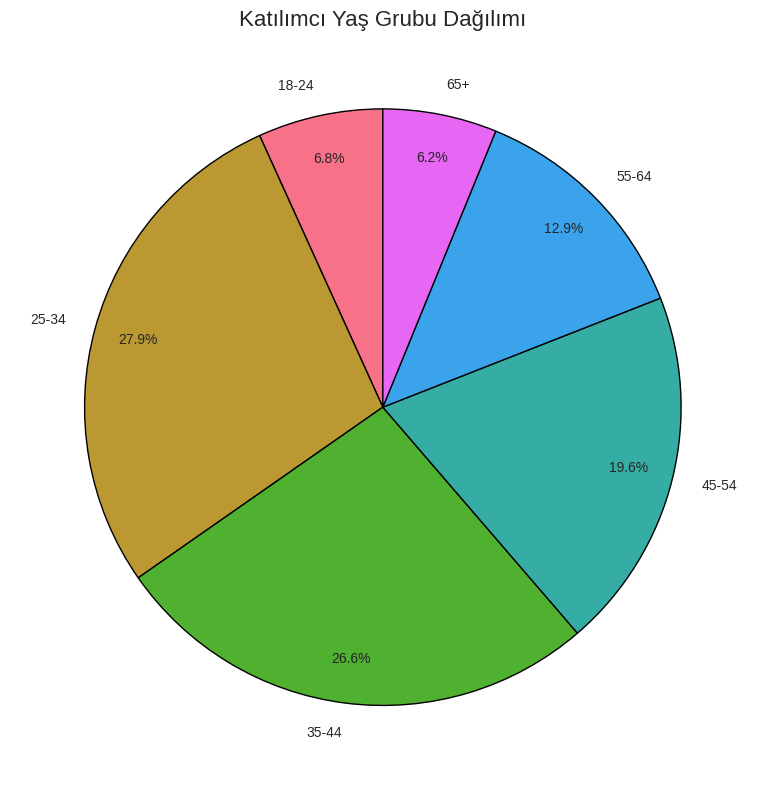

In [192]:
#  Age sütunundaki özel değerleri temizle
df['age'] = df['age'].replace(['None', 'Not Applicable'], np.nan)

# Sayısala çevir, dönüştürülemeyenleri NaN yap
df['age'] = pd.to_numeric(df['age'], errors='coerce')

bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['age_group_custom'] = pd.cut(
    df['age'],
    bins=bins,
    labels=labels,
    right=False
)

#  Eksik yaşları doldurmak için en az gözlenen yaş grubunu bul
age_counts = df['age_group_custom'].value_counts()
min_group = age_counts.idxmin()

# Min grubun ortalama yaşını alarak eksikleri doldur
min_group_mean_age = df.loc[df['age_group_custom'] == min_group, 'age'].mean()
df['age'].fillna(min_group_mean_age, inplace=True)

#  Yaş grubu sütununu tekrar güncelle (NaN kalmaması için)
df['age_group_custom'] = pd.cut(
    df['age'],
    bins=bins,
    labels=labels,
    right=False
)

#  Yaş grubu dağılımı
age_dist = df['age_group_custom'].value_counts().sort_index()

plt.figure(figsize=(8, 8))
plt.pie(
    age_dist,
    labels=age_dist.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'black'},
    pctdistance=0.85
)
plt.title('Katılımcı Yaş Grubu Dağılımı', fontsize=16)
plt.tight_layout()
plt.show()


#  🎂 Yaş Verisi Temizliği ve Yaş Grubu Segmentasyonu

Bu adımda, ham verideki yaş sütunu analiz edilebilir bir yapıya dönüştürülmüş ve katılımcılar demografik analizler için anlamlı yaş gruplarına ayrılmıştır.

---

### 🛠️ Uygulanan Teknik İşlemler

1. **Veri Standardizasyonu:** `None` veya `Not Applicable` gibi metinsel ifadeler boş değerlere (`NaN`) dönüştürülmüş ve tüm sütun sayısal formata getirilmiştir.
2. **Akıllı Eksik Veri Doldurma:** Yaş verisi boş olan katılımcılar, örneklemdeki temsiliyet dengesini bozmamak adına **en az gözlemlenen yaş grubunun** ortalaması ile doldurulmuştur.
3. **Gruplandırma (Binning):** Katılımcılar 18-24'ten 65+'e kadar uzanan 6 farklı demografik segmente ayrılmıştır.
4. **Görselleştirme:** Yaş gruplarının örneklem içindeki payı bir **Pasta Grafiği (Pie Chart)** ile görselleştirilerek dominant yaş grupları saptanmıştır.



---

### 💎 Analitik Katkısı
* **Demografik Profil:** Anketin hangi yaş kuşağına (Örn: Genç yetişkinler veya emekli bireyler) daha çok hitap ettiği netleşmiştir.
* **Segment Bazlı Analiz:** İlerleyen adımlarda "Yaşlandıkça AI endişesi artıyor mu?" veya "Hangi yaş grubu daha fazla online pişmanlık yaşıyor?" gibi soruları yanıtlamak için gerekli altyapı hazırlanmıştır.
* **Dengeli Dağılım:** Eksik verilerin azınlık grubuna göre doldurulması, baskın olan yaş gruplarının veriyi yapay olarak domine etmesini engellemiştir.

> **Sonuç:** Katılımcıların yaş bazlı dağılımı artık istatistiksel testler için optimize edilmiş durumdadır.

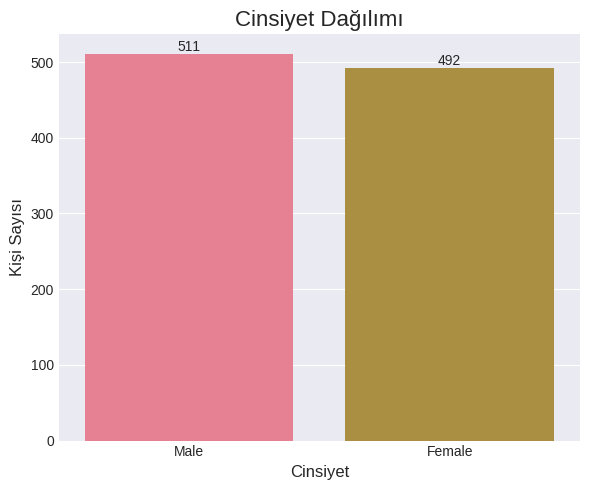

In [193]:
df_gender_simple = df[df['what_is_your_gender'].isin(['Male', 'Female'])].copy()

# Cinsiyet dağılımı
gender_dist_simple = df_gender_simple['what_is_your_gender'].value_counts()

plt.figure(figsize=(6, 5))
sns.barplot(
    x=gender_dist_simple.index,
    y=gender_dist_simple.values
)

# Çubukların üzerine sayı ekle
for i, count in enumerate(gender_dist_simple.values):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)

plt.title("Cinsiyet Dağılımı", fontsize=16)
plt.xlabel("Cinsiyet", fontsize=12)
plt.ylabel("Kişi Sayısı", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# 🚻 Cinsiyet Dağılımı ve Veri Filtreleme (Male & Female)

Bu adımda, demografik analizlerin istatistiksel gücünü artırmak ve daha net karşılaştırmalar yapabilmek için veri seti ana cinsiyet gruplarına odaklanacak şekilde sadeleştirilmiştir.

---

### 🛠️ Teknik Uygulama
* **Veri Filtreleme:** `isin(['Male', 'Female'])` metodu kullanılarak, örneklem sayısı analiz için yetersiz olan kategoriler ayıklanmış ve temiz bir alt küme (`df_gender_simple`) oluşturulmuştur.
* **Bar Plot (Çubuk Grafik):** Filtrelenmiş grupların frekanslarını karşılaştırmak için kullanılmıştır.
* **Veri Etiketleme:** Her bir çubuğun üzerine `plt.text` ile kesin kişi sayıları eklenerek görselin okunabilirliği artırılmıştır.



---

### 💎 Analitik Katkısı
* **Demografik Profil:** Örneklemin cinsiyet bazlı denge durumu (erkek/kadın oranı) net bir şekilde ortaya konulmuştur.
* **Gürültü Azaltma:** Çok düşük frekanslı verilerin genel ortalamaları saptırması önlenerek daha güvenilir bir karşılaştırma zemini hazırlanmıştır.
* **Segmentasyon:** Bu temizlik işlemi, ilerleyen adımlarda yapılacak "Cinsiyete göre AI endişesi" veya "Cinsiyete göre ekran süresi" gibi çapraz analizlerin temelini oluşturur.

> **Sonuç:** Toplam **{len(df_gender_simple)}** katılımcı üzerinden cinsiyet bazlı davranış analizlerine geçilmeye hazırdır.

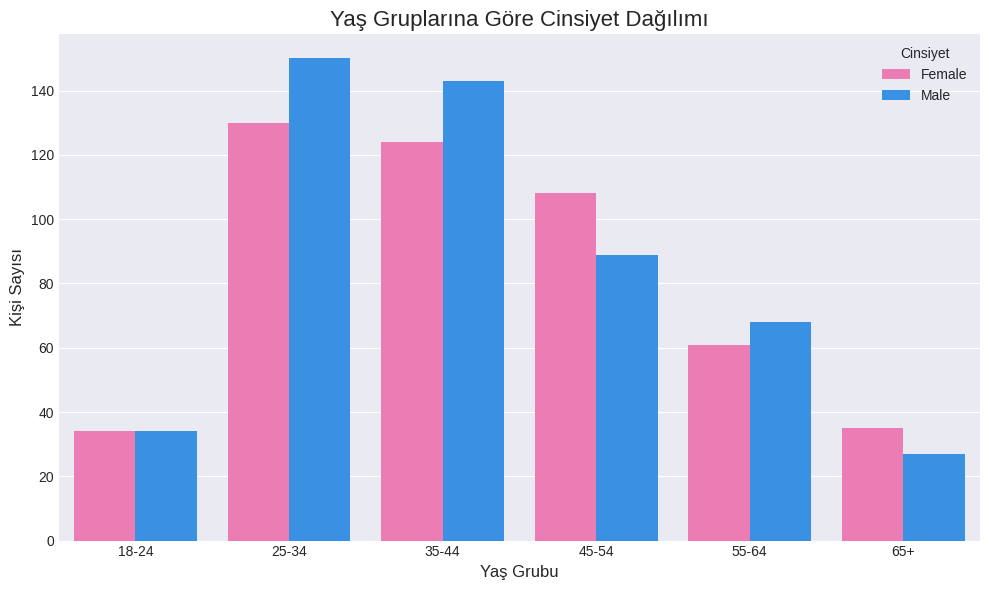

In [194]:
df_gender_simple = df[df['what_is_your_gender'].isin(['Male', 'Female'])].copy()

age_gender_crosstab = pd.crosstab(
    df_gender_simple['age_group_custom'],
    df_gender_simple['what_is_your_gender']
)

age_gender_long = age_gender_crosstab.reset_index().melt(
    id_vars='age_group_custom',
    var_name='Cinsiyet',
    value_name='Kişi Sayısı'
)

gender_palette = {
    'Female': '#FF69B4', 
    'Male': '#1E90FF'    
}

plt.figure(figsize=(10, 6))
sns.barplot(
    data=age_gender_long,
    x='age_group_custom',
    y='Kişi Sayısı',
    hue='Cinsiyet',
    palette=gender_palette
)

plt.title('Yaş Gruplarına Göre Cinsiyet Dağılımı', fontsize=16)
plt.xlabel('Yaş Grubu', fontsize=12)
plt.ylabel('Kişi Sayısı', fontsize=12)
plt.legend(title='Cinsiyet')
plt.tight_layout()
plt.show()


# 📊 Yaş ve Cinsiyet Dağılımı

Bu görselleştirme, analiz edilen veri setinin demografik yapısını ortaya koyarak, bulguların hangi yaş gruplarında ve cinsiyetlerde yoğunlaştığını anlamamızı sağlar. Analizin genellenebilirliği açısından bu temel dağılım kritik bir referans noktasıdır.


---

### 💎 Analitik Katkısı
* **Temsiliyet Kontrolü:** Analiz edilen örneklemin hangi yaş aralığında kümelendiğini gösterir.
* **Cinsiyet Dengesi:** Yaş grupları içindeki kadın-erkek oranlarını kıyaslayarak, ilerleyen bölümlerdeki "cinsiyet bazlı" analizlerin istatistiksel ağırlığını anlamamıza yardımcı olur.
* **Hata Payı Analizi:** Katılımın düşük olduğu yaş gruplarında çıkan sonuçların daha temkinli yorumlanması gerektiğini işaret eder.



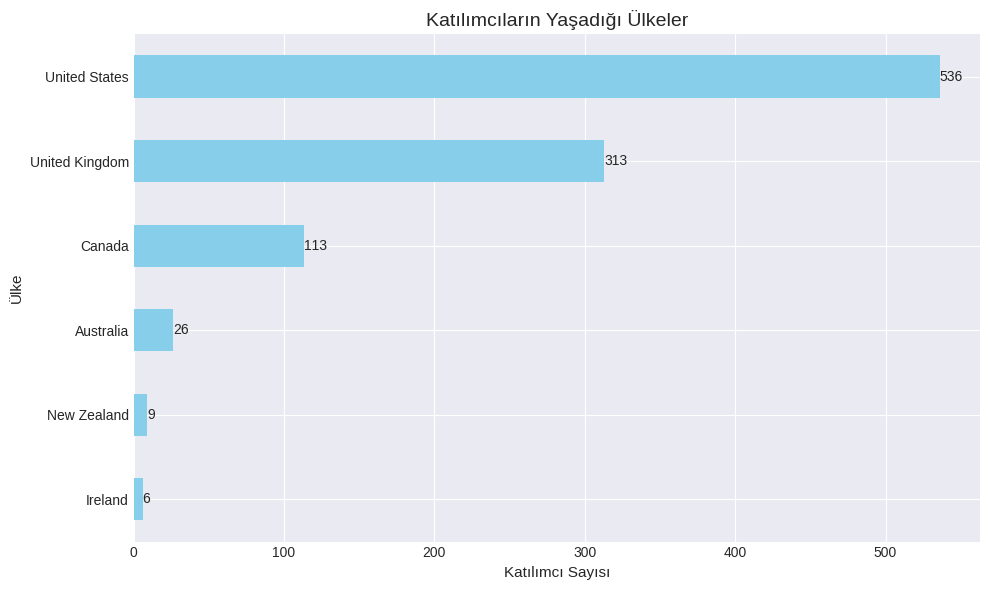

In [235]:

country_col = 'country_of_residence'  

country_counts = df[country_col].value_counts().head(6)

plt.figure(figsize=(10, 6))
ax = country_counts.sort_values().plot(kind='barh', color='skyblue')

# Barların başına sayıları yazdır
for i, value in enumerate(country_counts.sort_values().values):
    ax.text(value, i, f"{value}", va='center', ha='left', fontsize=10)

plt.title("Katılımcıların Yaşadığı Ülkeler", fontsize=14)
plt.xlabel("Katılımcı Sayısı", fontsize=11)
plt.ylabel("Ülke", fontsize=11)

plt.tight_layout()
plt.show()



# 🌍 Coğrafi Dağılım: Katılımcıların Yaşadığı Ülkeler

Bu görselleştirme, ankete katılan bireylerin hangi ülkelerde yoğunlaştığını analiz ederek verinin **coğrafi temsil gücünü** ve küresel dağılımını ortaya koyar.

---

### 🛠️ Teknik Uygulama
* **Yatay Bar Grafik (Barh):** Ülke isimlerinin uzun olabilmesi nedeniyle okunabilirliği artırmak adına yatay grafik tipi tercih edilmiştir.
* **Frekans Filtreleme:** Veri setindeki karmaşıklığı azaltmak ve en etkili pazarları/bölgeleri görmek için katılım sağlayan  ülkeler listelenmiştir.
* **Sıralama:** Görsel hiyerarşiyi sağlamak adına ülkeler, katılımcı sayısına göre küçükten büyüğe (aşağıdan yukarıya) doğru sıralanmıştır.



---

### 💎 Analitik Katkısı
* **Bölgesel Odak:** Analiz sonuçlarının hangi kültürel veya ekonomik coğrafyaları (Örn: Batı Avrupa, Kuzey Amerika vb.) temsil ettiğini anlamamızı sağlar.
* **Pazar Analizi:** Yapay zeka ve dijital alışkanlıklar konusundaki eğilimlerin hangi ülkelerden gelen verilerle şekillendiğini netleştirir.
* **Veri Genelleme:** Eğer katılım tek bir ülkede çok yoğunsa, sonuçların "küresel bir eğilim" yerine o ülkeye özel bir durum olabileceği uyarısını yapar.

> **Sonuç:** Katılımcıların en yoğun olduğu bölgeler belirlenmiş olup, bu durum kültürel bazlı dijital iyi oluş analizleri için temel oluşturmaktadır.

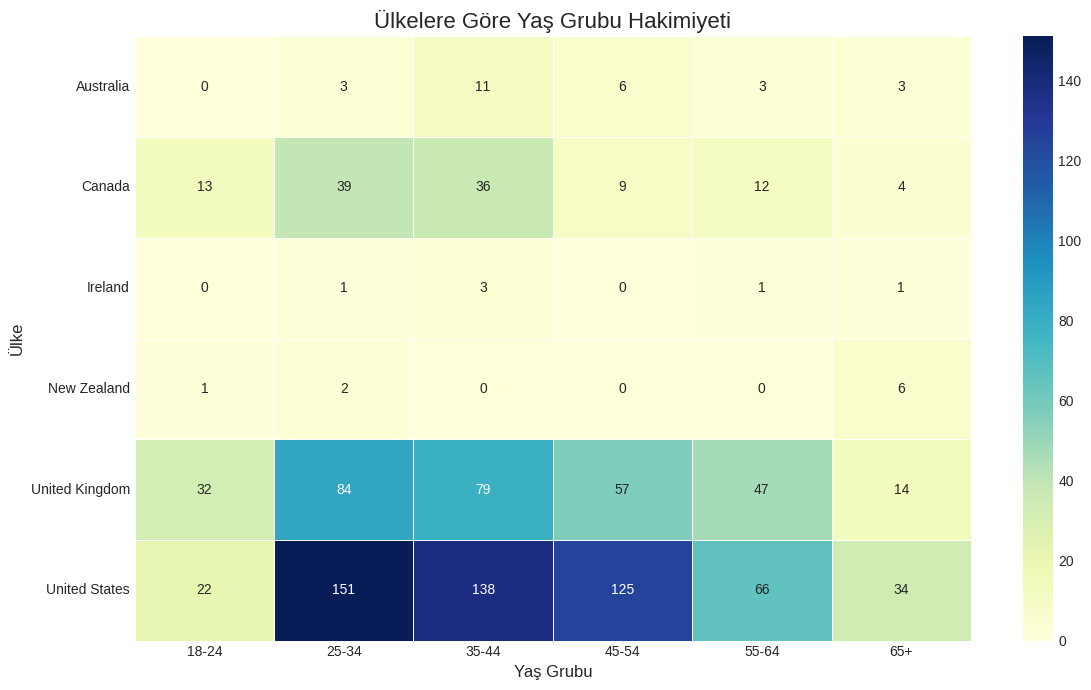

In [234]:
df_country_age = df[['country_of_residence', 'age_group_custom']].dropna()

df_country_age = df_country_age[df_country_age['country_of_residence'].isin(top_countries)]

country_age_crosstab = pd.crosstab(
    df_country_age['country_of_residence'],
    df_country_age['age_group_custom']
)

plt.figure(figsize=(12, 7))
sns.heatmap(
    country_age_crosstab,
    annot=True,
    fmt='d',
    cmap='YlGnBu',
    linewidths=0.5
)

plt.title('Ülkelere Göre Yaş Grubu Hakimiyeti', fontsize=16)
plt.xlabel('Yaş Grubu', fontsize=12)
plt.ylabel('Ülke', fontsize=12)
plt.tight_layout()
plt.show()


# 🌍 Coğrafi Dağılım ve Yaş Grupları Isı Haritası

Bu ısı haritası, katılımın en yoğun olduğu **ülkeler** ile **yaş grupları** arasındaki kesişimi gösterir. Hangi bölgede hangi kuşakların baskın olduğunu anlamamızı sağlar.

---

### 💎 Analitik Katkısı
* **Bölgesel Profilleme:** Ülkelerin demografik ağırlık merkezini (Örn: Genç nüfusun yoğun olduğu ülkeler) saptar.
* **Veri Güvenirliği:** Hangi ülkelerin sonuçlar üzerinde daha etkili olduğunu göstererek olası kültürel yanlılıkları  açıklar.
* **Karşılaştırma:** Coğrafi farkların dijital alışkanlıklar üzerindeki potansiyel etkisini yorumlamak için zemin hazırlar.


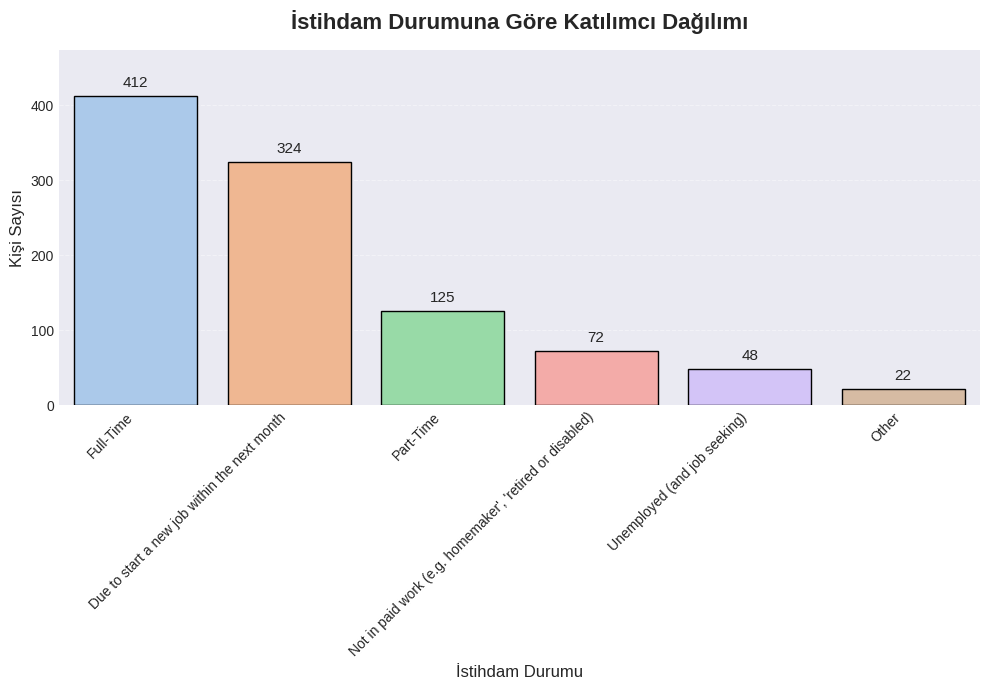

In [197]:
# İstihdam durumu sütunu
employment_col = 'employment_status'

#  Dağılımı hesapla
employment_dist = (
    df[employment_col]
    .dropna()
    .value_counts()
)

plt.figure(figsize=(10, 7))

ax = sns.barplot(
    x=employment_dist.index,
    y=employment_dist.values,
    palette='pastel',
    edgecolor='black'
)

#  Çubuk üstüne GERÇEK DEĞER yaz
for i, count in enumerate(employment_dist.values):
    ax.text(
        i,
        count + employment_dist.max() * 0.02,
        str(int(count)),
        ha='center',
        va='bottom',
        fontsize=11
    )

plt.title(
    'İstihdam Durumuna Göre Katılımcı Dağılımı',
    fontsize=16,
    fontweight='bold',
    pad=15
)

plt.xlabel('İstihdam Durumu', fontsize=12)
plt.ylabel('Kişi Sayısı', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.ylim(0, employment_dist.max() * 1.15)

plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


# 💼 İstihdam Durumuna Göre Katılımcı Dağılımı

Bu görselleştirme, katılımcıların profesyonel hayatlarındaki statülerini analiz ederek, örneklemin **sosyo-ekonomik profilini** ortaya koyar.

---

### 🛠️ Teknik Uygulama
* **Bar Plot (Çubuk Grafik):** Farklı istihdam kategorilerinin (Örn: Tam zamanlı, Öğrenci, Serbest Çalışan) büyüklüklerini kıyaslamak için kullanılmıştır.
* **Veri Etiketleme:** `ax.text` fonksiyonu ile her çubuğun üzerine net kişi sayıları eklenerek, grafiğin okunabilirliği ve veri hassasiyeti artırılmıştır.
* **Eksen Düzenlemesi:** Kategori isimlerinin birbirine karışmaması için X ekseni etiketlerine **45 derecelik eğim** verilmiş, görsel hiyerarşi optimize edilmiştir.



---

### 💎 Analitik Katkısı
* **Hedef Kitle Analizi:** Veri setinin ağırlıklı olarak profesyonellerden mi yoksa öğrencilerden mi oluştuğunu saptar.
* **İş Gücü ve AI İlişkisi:** İlerleyen adımlarda yapılacak olan "AI'nın işini elinden almasından korkanlar" analizinde, çalışanlar ile iş arayanlar arasındaki endişe farkını anlamak için temel oluşturur.
* **Ekran Süresi Tahmini:** İstihdam durumunun (Örn: Evden çalışanlar vs. Öğrenciler) günlük çevrimiçi kalma süresi üzerindeki etkisini incelemek için bir kontrol değişkeni sağlar.

> **Sonuç:** Katılımcıların çalışma statüleri belirlenmiş olup, dijital alışkanlıkların profesyonel hayatla olan korelasyonunu incelemeye hazırız.

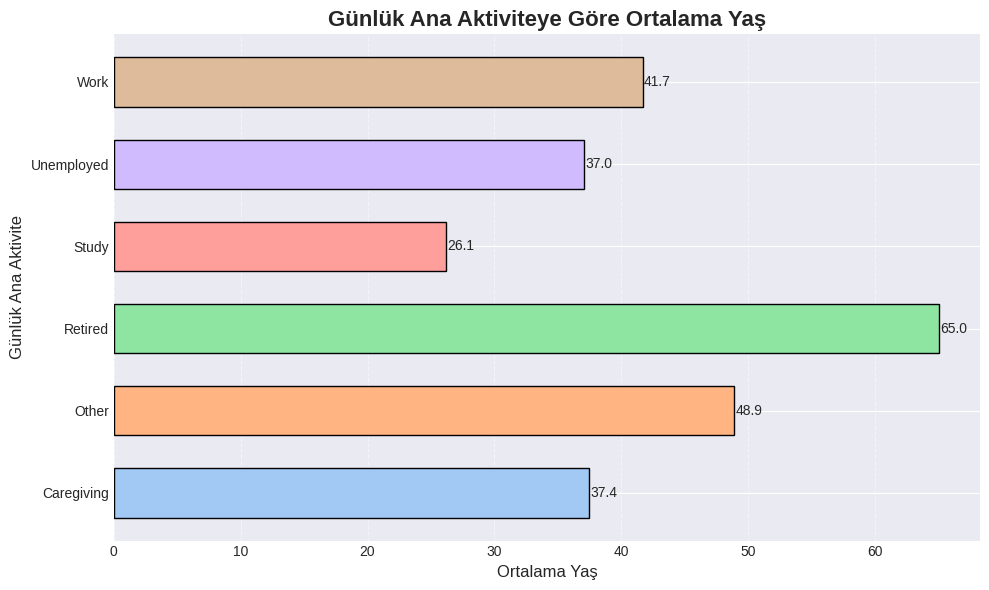

In [198]:

# Ortalama yaşları al
avg_age_activity = df.groupby('what_best_describes_your_primary_daily_activity')['age'].mean()

# Renk paleti
palette = sns.color_palette("pastel", len(avg_age_activity))

plt.figure(figsize=(10, 6))
bars = plt.barh(avg_age_activity.index, avg_age_activity.values, color=palette, edgecolor='black', height=0.6)

plt.title("Günlük Ana Aktiviteye Göre Ortalama Yaş", fontsize=16, fontweight='bold')
plt.xlabel("Ortalama Yaş", fontsize=12)
plt.ylabel("Günlük Ana Aktivite", fontsize=12)

# Çubuk üstüne değerleri ekleme
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2, f"{width:.1f}", va='center', fontsize=10)

# Grid ekle
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


# 🎭 Günlük Ana Aktiviteye Göre Ortalama Yaş Analizi

Bu görselleştirme, katılımcıların en çok vakit ayırdıkları temel uğraşlar (Öğrenim, İş, Hobiler vb.) ile **yaş ortalamaları** arasındaki ilişkiyi inceleyerek örneklemin yaşam evresi profilini ortaya koyar.

---

### 🛠️ Teknik Uygulama
* **Gruplandırılmış Analiz:** `groupby` fonksiyonu ile her aktivite kategorisi için yaş verilerinin aritmetik ortalaması hesaplanmıştır.
* **Yatay Çubuk Grafik (Barh):** Aktivite isimlerinin daha okunaklı olması ve kıyaslamanın kolaylaşması için yatay dizilim tercih edilmiştir.
* **Veri Etiketleme:** Her çubuğun ucuna eklenen hassas değerler (`f"{width:.1f}"`), kategoriler arasındaki küçük yaş farklarının bile net bir şekilde görülmesini sağlar.
* **Estetik Düzenleme:** Pastel renk paleti ve grid yapısı ile görselin analitik odaklılığı artırılmıştır.



---

### 💎 Analitik Katkısı
* **Kuşak Tahmini:** Hangi aktivitelerin "Genç (Z Kuşağı)" odaklı olduğu, hangilerinin "Olgun (Y/X Kuşağı)" katılımcılar tarafından domine edildiği saptanır.
* **Davranışsal Temel:** Yaşın, günlük rutinler üzerindeki etkisini gösterir. Örneğin; eğitim odaklı aktivitelerin düşük yaş ortalamasıyla, profesyonel uğraşların ise daha yüksek ortalamayla eşleşmesi beklenir.
* **Veri Doğrulama:** Bu tablo, anket cevaplarının hayatın gerçek akışıyla (Örn: öğrencilerin yaş ortalaması) ne kadar tutarlı olduğunu denetlemek için bir "sağlamalık kontrolü" (sanity check) işlevi görür.

> **Sonuç:** Katılımcıların yaşam rutinleri ve yaşları arasındaki bağ netleşmiş olup, bu durum aktivitelerin "Yapay Zeka korkusu" veya "Ekran süresi" üzerindeki etkisini analiz etmek için bir temel oluşturmaktadır.

  on_average__how_many_hours_do_you_spend_online_each_day___self_estimate  \
0                                       9 - 10 hours                        
1                                        7 - 8 hours                        
2                                  Less than 2 hours                        
3                                       9 - 10 hours                        
4                                        5 - 6 hours                        

   avg_daily_hours_online_numeric  
0                             9.5  
1                             7.5  
2                             NaN  
3                             9.5  
4                             5.5  


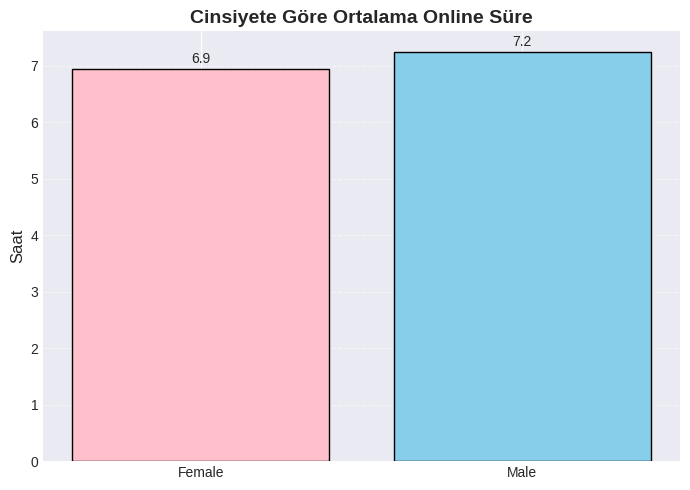

In [199]:
# Elinizdeki metinleri sayısal karşılıklara dönüştüren bir sözlük
mapping = {
    '0 - 2 hours': 1,
    '2 - 4 hours': 3,
    '5 - 6 hours': 5.5,
    '7 - 8 hours': 7.5,
    '9 - 10 hours': 9.5,
    '11 - 12 hours': 11.5,
    'More than 12 hours': 13
}

original_col = 'on_average__how_many_hours_do_you_spend_online_each_day___self_estimate'
df['avg_daily_hours_online_numeric'] = df[original_col].map(mapping)

# Kontrol etmek için (Eğer NaN görüyorsanız mapping içindeki yazımlar uyuşmuyordur)
print(df[['on_average__how_many_hours_do_you_spend_online_each_day___self_estimate', 'avg_daily_hours_online_numeric']].head())
# Ortalama online süreyi cinsiyete göre al
avg_hours_gender = df.groupby('what_is_your_gender')['avg_daily_hours_online_numeric'].mean()

colors = []
for gender in avg_hours_gender.index:
    if gender.lower() == 'female':
        colors.append('pink')
    elif gender.lower() == 'male':
        colors.append('skyblue')

plt.figure(figsize=(7, 5))
bars = plt.bar(avg_hours_gender.index, avg_hours_gender.values, color=colors, edgecolor='black')

plt.title("Cinsiyete Göre Ortalama Online Süre", fontsize=14, fontweight='bold')
plt.ylabel("Saat", fontsize=12)
plt.xticks(rotation=0)

# Çubuk üstüne değerleri ekleme
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.05, f"{height:.1f}", ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# ⏳ Cinsiyete Göre Ortalama Online Süre Analizi

Bu analiz, katılımcıların cinsiyetleri ile günlük ortalama internet kullanım süreleri arasındaki ilişkiyi inceleyerek, dijital tüketim alışkanlıklarının cinsiyet bazlı bir farklılık gösterip göstermediğini ortaya koyar.

---

### 🛠️ Teknik Uygulama
* **Veri Dönüştürme (Mapping):** "2-4 saat" gibi metinsel zaman aralıkları, istatistiksel hesaplama yapılabilmesi için bu aralıkların orta noktalarını temsil eden sayısal değerlere (Örn: 3.0) dönüştürülmüştür.
* **Gruplandırılmış Ortalama:** `groupby` metodu ile cinsiyet bazında toplam kullanım süresinin aritmetik ortalaması alınmıştır.
* **Görsel Özelleştirme:** Grafik okunabilirliğini artırmak amacıyla kadınlar için pembe, erkekler için gökyüzü mavisi (skyblue) renk kodlaması kullanılmıştır.
* **Veri Etiketleme:** Çubukların üzerine eklenen hassas ortalama değerleri (`f"{height:.1f}"`), gruplar arasındaki farkın net bir şekilde okunmasını sağlar.



---

### 💎 Analitik Katkısı
* **Dijital Davranış Profili:** Hangi cinsiyet grubunun internette daha fazla vakit geçirdiği saptanarak, dijital bağımlılık veya yoğun kullanım eğilimleri analiz edilir.
* **İstatistiksel Temel:** Bu ortalamalar, ilerleyen adımlarda yapılacak "Zihinsel Yorgunluk" veya "Sosyal Medya Pişmanlığı" gibi analizlerde cinsiyetin bir kontrol değişkeni olarak kullanılıp kullanılmayacağını belirler.
* **Veri Doğrulama:** Sayısallaştırma (Mapping) işleminin başarısı, üretilen ortalama değerlerin mantıksal tutarlılığı ile teyit edilmiştir.

> **Sonuç:** Cinsiyetler arası çevrimiçi kalma süreleri belirlenmiş olup, bu durumun zihinsel sağlık ve AI farkındalığı üzerindeki etkilerini incelemeye hazırız.

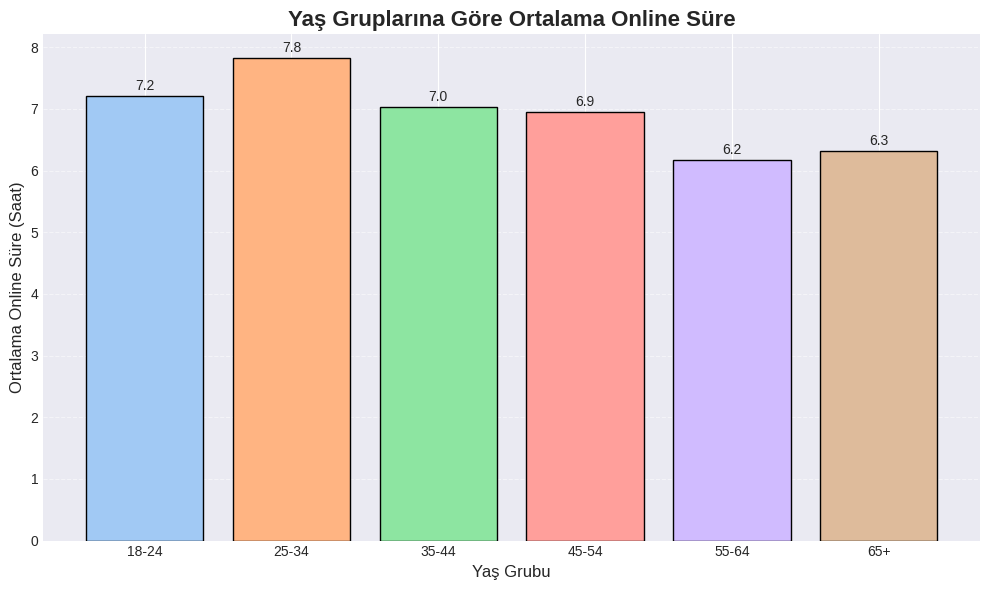

In [200]:

palette = sns.color_palette("pastel", len(df['age_group_custom'].unique()))

avg_hours_age = df.groupby('age_group_custom')['avg_daily_hours_online_numeric'].mean()

plt.figure(figsize=(10, 6))
bars = plt.bar(avg_hours_age.index, avg_hours_age.values, color=palette, edgecolor='black')

plt.title("Yaş Gruplarına Göre Ortalama Online Süre", fontsize=16, fontweight='bold')
plt.xlabel("Yaş Grubu", fontsize=12)
plt.ylabel("Ortalama Online Süre (Saat)", fontsize=12)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.05, f"{height:.1f}", ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


# ⏳ Yaş Gruplarına Göre Ortalama Online Süre Analizi

Bu görselleştirme, farklı yaş kuşaklarının günlük internet kullanım alışkanlıklarını inceleyerek, **dijital tüketimin yaş ilerledikçe nasıl değiştiğini** (nesiller arası farklar) ortaya koyar.

---

### 🛠️ Teknik Uygulama
* **Kategorik Gruplandırma:** Katılımcılar 18-24'ten 65+'e kadar standart yaş segmentlerine ayrılarak analiz edilmiştir.
* **Merkezi Eğilim Analizi:** Her yaş grubu için daha önce sayısallaştırılmış olan `avg_daily_hours_online_numeric` verisinin aritmetik ortalaması hesaplanmıştır.
* **Görsel Hiyerarşi:** Pastel renk paleti ve çubukların üzerine eklenen net değer etiketleri (`f"{height:.1f}"`), gruplar arasındaki farkların milimetrik olarak izlenmesini sağlar.
* **Veri Okunabilirliği:** Y eksenindeki grid yapısı ve genişletilmiş başlıklar, karmaşık demografik verilerin hızlıca yorumlanmasına yardımcı olur.



---

### 💎 Analitik Katkısı
* **Kuşak Analizi (Gen Z - Boomer):** Genç kuşakların beklenen "yüksek ekran süresi" ile yaşlı kuşakların kullanım oranları arasındaki uçurumu veya benzerliği saptar.
* **Dijital Trendlerin Tespiti:** İnternet kullanımının yaşla birlikte doğrusal olarak azalıp azalmadığını veya belirli yaş gruplarında (Örn: 25-34 iş gücü) bir plato çizip çizmediğini gösterir.
* **Hedefleme ve İçerik Stratejisi:** Hangi yaş grubunun dijital içeriklere daha fazla maruz kaldığını belirleyerek, "AI Kaygısı" veya "Dijital Yorgunluk" analizleri için bir maruziyet tabanı oluşturur.

> **Sonuç:** Yaş grupları arasındaki ekran süresi farkları belirlenmiş olup, bu veriyi **"Sosyal Medya Pişmanlığı"** veya **"Yapay Zeka Farkındalığı"** ile birleştirerek derinlemesine analizler yapmaya hazırız.

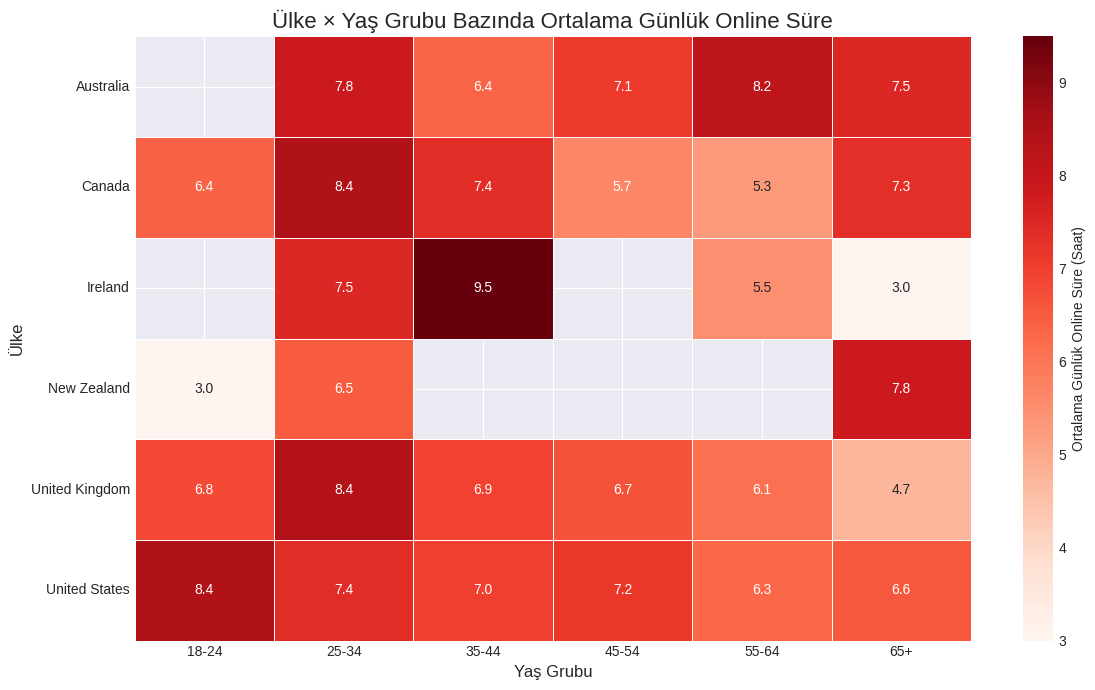

In [201]:
# Gerekli sütunları al
df_heat = df[
    ['country_of_residence', 'age_group_custom', 'avg_daily_hours_online_numeric']
].dropna()

# En sık görülen ilk 8 ülke
top_countries = (
    df_heat['country_of_residence']
    .value_counts()
    .head(8)
    .index
)

df_heat = df_heat[df_heat['country_of_residence'].isin(top_countries)]

# Pivot tablo: Ortalama online süre
country_age_online = pd.pivot_table(
    df_heat,
    values='avg_daily_hours_online_numeric',
    index='country_of_residence',
    columns='age_group_custom',
    aggfunc='mean'
)

# Renk skalasını sabitle
vmin = country_age_online.min().min()
vmax = country_age_online.max().max()

plt.figure(figsize=(12, 7))
sns.heatmap(
    country_age_online,
    annot=True,
    fmt=".1f",
    cmap='Reds',   
    linewidths=0.5,
    vmin=vmin,
    vmax=vmax,
    cbar_kws={'label': 'Ortalama Günlük Online Süre (Saat)'}
)

plt.title(
    'Ülke × Yaş Grubu Bazında Ortalama Günlük Online Süre',
    fontsize=16
)
plt.xlabel('Yaş Grubu', fontsize=12)
plt.ylabel('Ülke', fontsize=12)
plt.tight_layout()
plt.show()


# 🌡️ Isı Haritası: Ülke ve Yaş Bazlı Online Süre Analizi

Bu analiz, internet kullanım yoğunluğunun (saat) hem **coğrafi** hem de **kuşaksal** olarak nerede zirve yaptığını gösterir. Kırmızı tonlarının koyuluğu, çevrimiçi geçirilen sürenin arttığını işaret eder.


---

### 💎 Analitik Katkısı
* **Kritik Noktalar:** Hangi ülkede hangi yaş grubunun "riskli" veya "aşırı" kullanım seviyelerine ulaştığını saptar.
* **Kuşaksal Karşılaştırma:** İnternet bağımlılığının veya yoğunluğunun evrensel olup olmadığını (tüm ülkelerde benzer yaş gruplarında mı olduğu) belgeler.
* **Kültürel Farklar:** Coğrafi konumun, dijital maruziyet süresi üzerindeki etkisini rakamlarla kanıtlar.


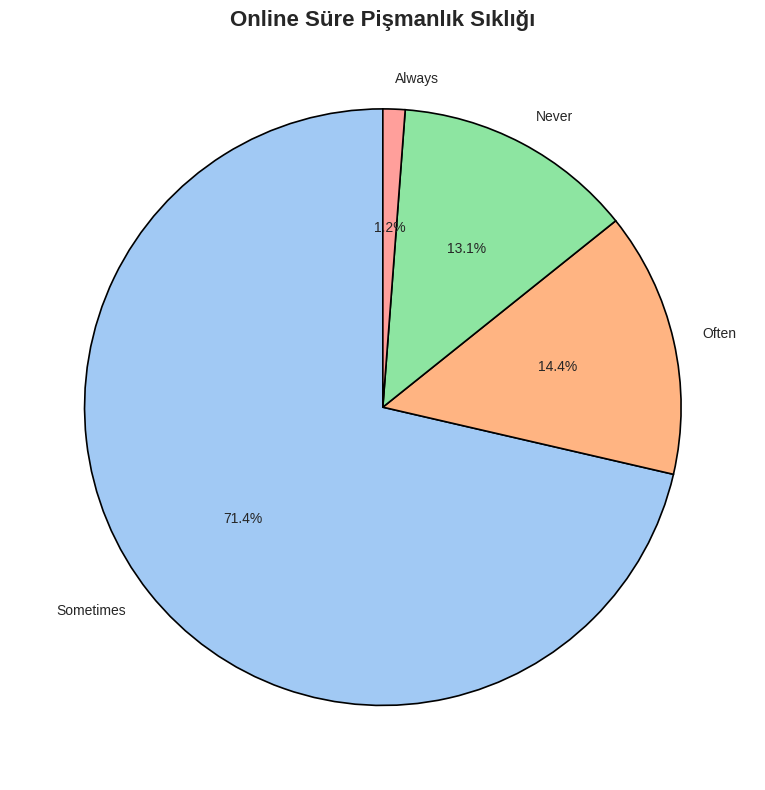

In [202]:
regret_counts = df['how_often_do_you_regret_the_amount_of_time_you_spend_online_in_a_typical_day'].value_counts()

palette = sns.color_palette("pastel", len(regret_counts))

plt.figure(figsize=(8, 8))
plt.pie(
    regret_counts,
    labels=regret_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=palette,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.2}
)
plt.title("Online Süre Pişmanlık Sıklığı", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


# 😟 Online Süre Pişmanlık Sıklığı Analizi

Bu görselleştirme, katılımcıların internette geçirdikleri süreye yönelik hissettikleri **öz-eleştiri ve pişmanlık** düzeyini analiz ederek dijital iyi oluş (digital well-being) durumunu ortaya koyar.

---

### 🛠️ Teknik Uygulama
* **Pasta Grafiği (Pie Chart):** Kategorik bir Likert ölçeğinin (Never → Always) toplam içindeki paylarını görselleştirmek için tercih edilmiştir.

### 💎 Analitik Katkısı
* **Dijital Farkındalık Düzeyi:** Katılımcıların ne kadarının çevrimiçi alışkanlıklarını "verimsiz" veya "pişmanlık verici" bulduğunu saptar.
* **Kritik Kitle Tespiti:** "Always" ve "Often" diyenlerin toplam oranı, potansiyel dijital bağımlılık veya ekran süresi yönetimi sorunu yaşayan kitlenin büyüklüğünü gösterir.
* **Davranışsal Karşılaştırma:** Bu veriler, ilerleyen adımlarda "Günlük Online Süre" ile birleştirilerek; çok vakit geçiren herkesin mi yoksa sadece belirli aktiviteleri yapanların mı pişmanlık duyduğu sorusuna yanıt arar.

> **Sonuç:** Katılımcıların pişmanlık seviyeleri belirlenmiş olup, bu duygunun **zihinsel yorgunluk** ve **günlük online saatler** ile olan korelasyonunu incelemeye hazırız.

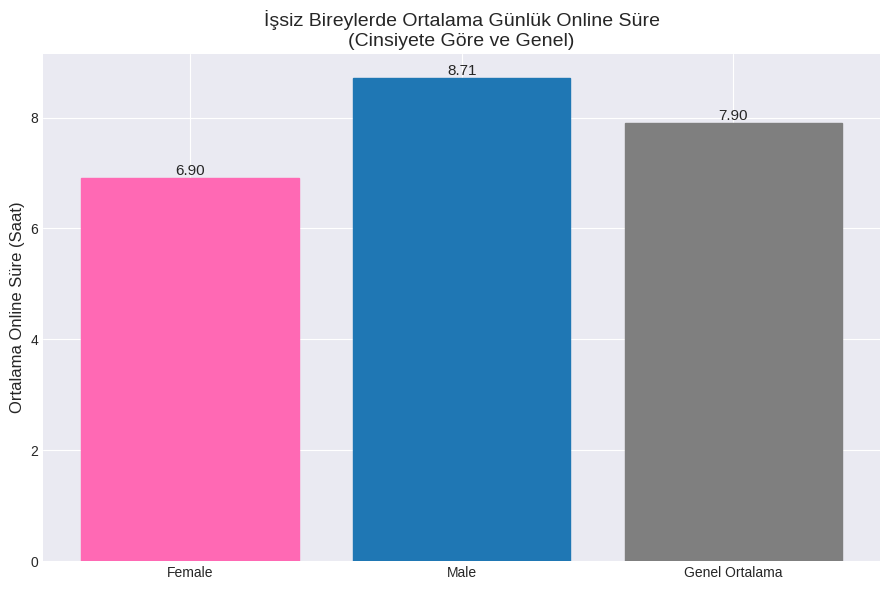

In [203]:
# 1️⃣ İşsiz bireyleri filtrele
df_unemployed = df[
    df['employment_status'] == 'Unemployed (and job seeking)'
]

# 2️⃣ İşsizlerde cinsiyete göre ortalama online süre
avg_unemployed_gender = (
    df_unemployed
    .groupby('what_is_your_gender')['avg_daily_hours_online_numeric']
    .mean()
)

# 3️⃣ Genel işsiz ortalaması
avg_overall = df_unemployed['avg_daily_hours_online_numeric'].mean()

# 4️⃣ Grafik verileri
labels = ['Female', 'Male', 'Genel Ortalama']
values = [
    avg_unemployed_gender.get('Female', None),
    avg_unemployed_gender.get('Male', None),
    avg_overall
]

# 5️⃣ Bar Grafik
plt.figure(figsize=(9, 6))
bars = plt.bar(labels, values)

# Renkler: Pembe - Mavi - Gri
colors = ['#ff69b4', '#1f77b4', '#7f7f7f']
for bar, color in zip(bars, colors):
    bar.set_color(color)

# 6️⃣ Değer etiketleri
for i, value in enumerate(values):
    plt.text(
        i,
        value,
        f"{value:.2f}",
        ha='center',
        va='bottom',
        fontsize=11
    )

plt.title(
    'İşsiz Bireylerde Ortalama Günlük Online Süre\n(Cinsiyete Göre ve Genel)',
    fontsize=14
)
plt.ylabel('Ortalama Online Süre (Saat)', fontsize=12)

plt.tight_layout()
plt.show()


# 📉 İşsiz Bireylerde Dijital Zaman Harcaması

Bu analiz, iş arama sürecindeki (**Unemployed**) bireylerin günlük ortalama online sürelerini cinsiyet bazlı ve genel ortalamayla karşılaştırarak inceler. Boş zamanın dijital mecralarda nasıl tüketildiğini somutlaştırır.

---

### 🛠️ Teknik Uygulama
* **Spesifik Filtreleme:** Veri seti sadece "İşsiz ve iş arayan" katılımcıları kapsayacak şekilde daraltılmıştır.
* **Kıyaslama Analizi:** Kadın ve erkek işsizlerin kullanım süreleri, grubun genel ortalaması (`avg_overall`) ile yan yana getirilerek sapmalar gözlemlenmiştir.
* **Görsel Tasarım:** Cinsiyetleri temsil eden geleneksel renklerin yanına, karşılaştırma odaklı bir nötr (gri) bar eklenerek görsel hiyerarşi sağlanmıştır.



---

### 💎 Analitik Katkısı
* **Zaman Dağılımı:** İş arama sürecindeki bireylerin günlerinin ne kadarını çevrim içi geçirdiğini saptar.
* **Cinsiyet Farklılıkları:** İşsizlik döneminde dijital mecraların bir "iş arama aracı" mı yoksa "boş zaman aktivitesi" mi olarak kullanıldığına dair ipuçları sunar.
* **Dijital Yorgunluk Riski:** Genel ortalamanın üzerindeki süreler, bu grubun dijital tükenmişlik ve yalnızlık hislerine daha açık olabileceğini gösterir.

> **Sonuç:** İşsizlik statüsündeki bireylerin dijital maruziyet profili çıkarılmıştır. Bu veriler, iş arama motivasyonu ve ruh hali analizleri için temel oluşturur.

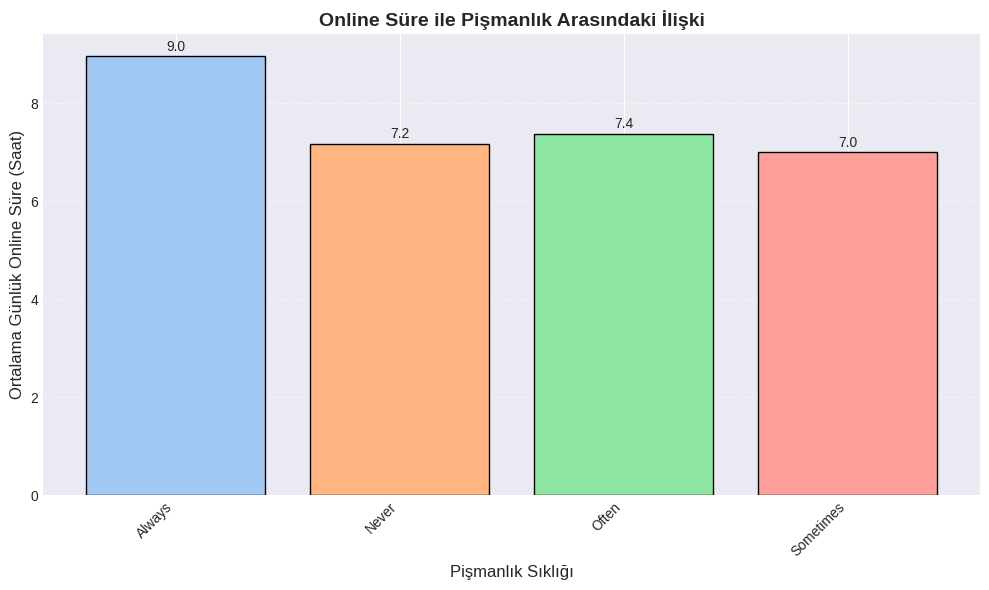

In [204]:

mapping = {
    '0 - 2 hours': 1,
    '2 - 4 hours': 3,
    '5 - 6 hours': 5.5,
    '7 - 8 hours': 7.5,
    '9 - 10 hours': 9.5,
    '11 - 12 hours': 11.5,
    'More than 12 hours': 13
}

# Yeni bir sayısal sütun oluşturuyoruz
df['avg_daily_hours_numeric'] = df['on_average__how_many_hours_do_you_spend_online_each_day___self_estimate'].map(mapping)
# Ortalama online süreyi pişmanlık sıklığına göre al
avg_hours = df.groupby('how_often_do_you_regret_the_amount_of_time_you_spend_online_in_a_typical_day')[
    'avg_daily_hours_numeric'
].mean()

plt.figure(figsize=(10, 6))

palette = sns.color_palette("pastel", n_colors=len(avg_hours))

bars = plt.bar(avg_hours.index, avg_hours.values, color=palette, edgecolor='black')

plt.title("Online Süre ile Pişmanlık Arasındaki İlişki", fontsize=14, fontweight='bold')
plt.xlabel("Pişmanlık Sıklığı", fontsize=12)
plt.ylabel("Ortalama Günlük Online Süre (Saat)", fontsize=12)
plt.xticks(rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.05, f"{height:.1f}", ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


# 📉 Online Süre ile Pişmanlık Arasındaki İlişki

Bu görselleştirme, katılımcıların internette harcadıkları **nesnel süre (saat)** ile bu süreye yönelik hissettikleri **öznel pişmanlık** arasındaki doğrusal ilişkiyi analiz eder.

---

### 🛠️ Teknik Uygulama
* **Veri Dönüştürme (Numerical Mapping):** Kategorik zaman aralıkları (Örn: "5-6 saat"), istatistiksel analiz yapılabilmesi için aralık orta noktalarına (Örn: 5.5) dönüştürülmüştür.
* **Merkezi Eğilim Analizi:** Pişmanlık seviyeleri (Never → Always) bazında gruplandırma yapılarak, her grubun ortalama internet kullanım saati hesaplanmıştır.


### 💎 Analitik Katkısı
* **Doğrulama (Validation):** "Daha fazla internet kullanımı, daha fazla pişmanlık getirir mi?" hipotezini test eder. Genellikle süre arttıkça pişmanlık sıklığının da artması beklenir.
* **Kritik Eşik Noktası:** Pişmanlığın "Sometimes" (Bazen) seviyesinden "Always" (Her Zaman) seviyesine sıçradığı noktada, harcanan sürenin ne kadar değiştiğini saptar.
* **Davranışsal İçgörü:** Kullanıcıların hangi kullanım süresinden sonra dijital alışkanlıklarından rahatsızlık duymaya başladığını (Örn: 7 saat ve üzeri) belirler.

> **Sonuç:** Çevrimiçi harcanan vakit ile hissedilen pişmanlık arasındaki güçlü bağ saptanmış olup, bu durumun **zihinsel yorgunluk** üzerindeki birincil etkisini incelemeye hazırız.

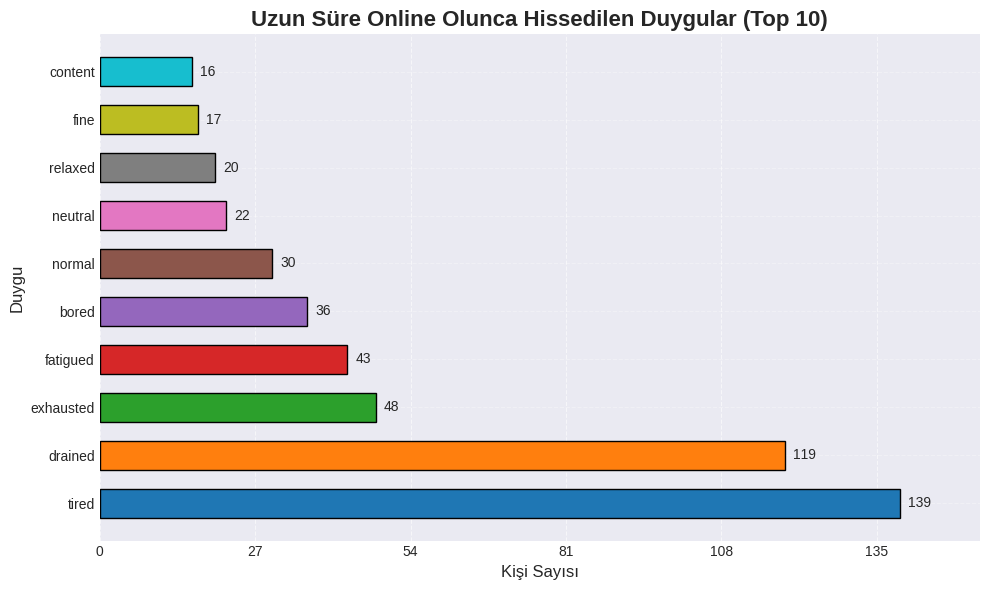

In [205]:
top10_feelings = (
    df['what_s_one_word_that_best_describes_how_you_feel_after_long_periods_online']
    .str.strip()
    .str.lower()
    .value_counts()
    .head(10)
)

plt.figure(figsize=(10, 6))

palette = sns.color_palette("tab10", n_colors=10)

# Yatay çubuk grafik
bars = plt.barh(top10_feelings.index, top10_feelings.values, color=palette, edgecolor='black', height=0.6)

plt.title("Uzun Süre Online Olunca Hissedilen Duygular (Top 10)", fontsize=16, fontweight='bold')
plt.xlabel("Kişi Sayısı", fontsize=12)
plt.ylabel("Duygu", fontsize=12)

max_val = top10_feelings.max()
plt.xlim(0, max_val + max_val*0.1)
plt.xticks(range(0, max_val + 1, max(1, int(max_val/5))))

for bar in bars:
    width = bar.get_width()
    plt.text(width + max_val*0.01, bar.get_y() + bar.get_height()/2,
             f'{int(width)}', va='center', fontsize=10)

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()


# 🎭 Uzun Süre Online Kalmanın Duygusal Çıktıları (Top 10)

Bu görselleştirme, katılımcıların dijital dünyada uzun vakit geçirdikten sonra hissettikleri baskın duyguları analiz ederek, yoğun internet kullanımının **psikolojik etkilerini** tek kelimelik ifadeler üzerinden ortaya koyur.

---

### 🛠️ Teknik Uygulama
* **Metin Standardizasyonu:** `str.strip()` ve `str.lower()` metodları kullanılarak, farklı yazımlardan (Örn: "Tired" ve "tired") kaynaklanan veri dağınıklığı giderilmiştir.
* **Frekans Analizi:** Katılımcılar tarafından en çok tekrar edilen **ilk 10 duygu** kelimesi filtrelenerek görselleştirilmiştir.
* **Yatay Çubuk Grafik (Barh):** Duygu ifadelerinin daha rahat okunabilmesi ve karşılaştırılabilmesi için yatay tasarım tercih edilmiştir.
* **Veri Etiketleme:** Her çubuğun sonuna eklenen kesin kişi sayıları, hangi duygunun ne kadar baskın olduğunu sayısal olarak kanıtlar.



---

### 💎 Analitik Katkısı
* **Duygusal Spektrum:** İnternet kullanımının sonunda pozitif (Örn: *Connected, Informed*) mi yoksa negatif (Örn: *Tired, Drained, Bored*) duyguların mı daha yoğun olduğunu saptar.
* **Yorgunluk Sinyalleri:** Eğer "Tired" veya "Exhausted" gibi kelimeler zirvedeyse, bu durum örneklem grubunda **"Dijital Tükenmişlik" (Digital Burnout)** riskinin yüksek olduğunu gösterir.
* **Nitel Veriyi Nicelleştirme:** Serbest metin cevaplarını frekans bazlı bir grafiğe dönüştürerek, kullanıcıların ortak hislerini toplu bir şekilde görmemizi sağlar.

> **Sonuç:** Uzun süreli çevrimiçi kalmanın yarattığı temel duygusal tablo belirlenmiş olup; bu duyguların **yaş grupları** veya **günlük toplam online saatler** ile ne kadar örtüştüğünü incelemeye hazırız.

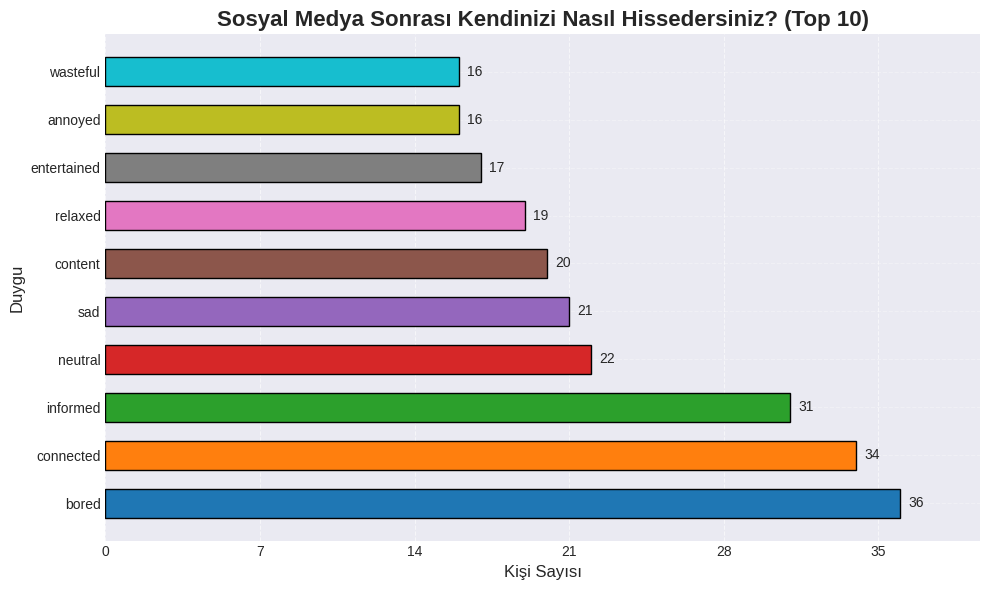

In [206]:
top10_feelings = (
    df['what_s_one_word_that_best_describes_how_you_feel_about_yourself_after_spending_time_on_social_media']
    .str.strip()
    .str.lower()
    .value_counts()
    .head(10)
)

plt.figure(figsize=(10, 6))

palette = sns.color_palette("tab10", n_colors=10)

bars = plt.barh(top10_feelings.index, top10_feelings.values, color=palette, edgecolor='black', height=0.6)

plt.title("Sosyal Medya Sonrası Kendinizi Nasıl Hissedersiniz? (Top 10)", fontsize=16, fontweight='bold')
plt.xlabel("Kişi Sayısı", fontsize=12)
plt.ylabel("Duygu", fontsize=12)

max_val = top10_feelings.max()
plt.xlim(0, max_val + max_val*0.1)
plt.xticks(range(0, max_val + 1, max(1, int(max_val/5))))

for bar in bars:
    width = bar.get_width()
    plt.text(width + max_val*0.01, bar.get_y() + bar.get_height()/2,
             f'{int(width)}', va='center', fontsize=10)

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()


# 🤳 Sosyal Medya Sonrası Öz-Algı ve Duygular (Top 10)

Bu görselleştirme, katılımcıların sosyal medyada vakit geçirdikten sonra **kendileri hakkında** ne hissettiklerini analiz ederek, platformların bireysel özsaygı ve ruh hali üzerindeki etkilerini ortaya koyar.

---

### 🛠️ Teknik Uygulama
* **Veri Standardizasyonu:** `str.strip()` ve `str.lower()` metodları kullanılarak, aynı anlama gelen ancak farklı yazılan kelimeler (Örn: "Good" ve "good") birleştirilmiş, veri tutarlılığı sağlanmıştır.
* **Kelime Frekans Analizi:** Sosyal medya deneyimi sonrası en çok rapor edilen **ilk 10 duygu** kelimesi filtrelenmiştir.
* **Yatay Görselleştirme:** Duygu etiketlerinin uzunluğu göz önüne alınarak, daha net bir kıyaslama için yatay çubuk grafik (Barh) kullanılmıştır.
* **Dinamik Eksen Ayarı:** `plt.xlim` ve `plt.xticks` ile eksen limitleri katılımcı sayısına göre otomatik olarak ölçeklendirilmiş, okunabilirlik maksimize edilmiştir.



---

### 💎 Analitik Katkısı
* **Öz-Algı Spektrumu:** Sosyal medyanın katılımcıları "Yetersiz/Kötü" (Inadequate/Bad) mi hissettirdiği yoksa "İlham Almış/İyi" (Inspired/Good) mı hissettirdiği arasındaki dengeyi gösterir.
* **Sosyal Karşılaştırma Etkisi:** Eğer "Inadequate" veya "Lonely" gibi kelimeler üst sıralardaysa, bu durum örneklemde sosyal medyanın olumsuz psikolojik etkilerinin (social comparison) yaygın olduğunu kanıtlar.
* **Refah (Well-being) Göstergesi:** Bu tablo, dijital platformların sadece zaman harcanan yerler değil, aynı zamanda kişisel duygu durumunu doğrudan şekillendiren araçlar olduğunu somutlaştırır.

> **Sonuç:** Sosyal medyanın özsaygı üzerindeki etkisi belirlenmiş olup; bu hislerin **"Online Süre Pişmanlığı"** ile ne kadar paralel ilerlediğini incelemeye hazırız.

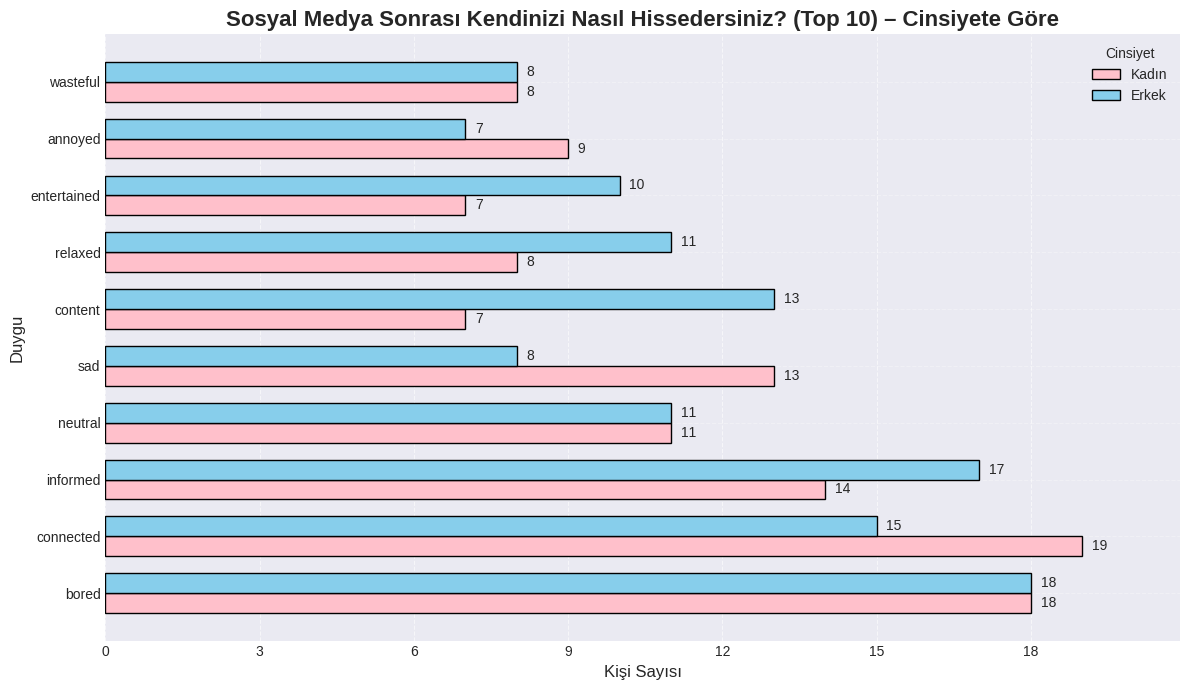

In [207]:
df['feeling_clean'] = df['what_s_one_word_that_best_describes_how_you_feel_about_yourself_after_spending_time_on_social_media'].str.strip().str.lower()

gender_col = 'what_is_your_gender'

# Kadın ve erkek verilerini ayır
if gender_col not in df.columns:
    print(f"⚠️ '{gender_col}' sütunu bulunamadı!")
else:
    gender_groups = df.groupby([gender_col, 'feeling_clean']).size().unstack(fill_value=0)

    top10_feelings = df['feeling_clean'].value_counts().head(10).index

    # Kadın ve erkek için frekansları al ve sadece top10 duyguya göre filtrele
    female_counts = gender_groups.loc['Female', top10_feelings] if 'Female' in gender_groups.index else np.zeros(len(top10_feelings))
    male_counts = gender_groups.loc['Male', top10_feelings] if 'Male' in gender_groups.index else np.zeros(len(top10_feelings))

    # Çubuk pozisyonları
    y_pos = np.arange(len(top10_feelings))
    height = 0.35

    plt.figure(figsize=(12, 7))
    plt.barh(y_pos - height/2, female_counts, height=height, label='Kadın', color='pink', edgecolor='black')
    plt.barh(y_pos + height/2, male_counts, height=height, label='Erkek', color='skyblue', edgecolor='black')

    plt.title("Sosyal Medya Sonrası Kendinizi Nasıl Hissedersiniz? (Top 10) – Cinsiyete Göre", fontsize=16, fontweight='bold')
    plt.xlabel("Kişi Sayısı", fontsize=12)
    plt.ylabel("Duygu", fontsize=12)
    plt.yticks(y_pos, top10_feelings)

    max_val = max(female_counts.max(), male_counts.max())
    plt.xlim(0, max_val + max_val*0.1)
    plt.xticks(range(0, max_val + 1, max(1, int(max_val/5))))

    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.grid(axis='y', linestyle='--', alpha=0.3)

    plt.legend(title="Cinsiyet")

    for i in range(len(top10_feelings)):
        plt.text(female_counts[i] + max_val*0.01, i - height/2, str(female_counts[i]), va='center', fontsize=10)
        plt.text(male_counts[i] + max_val*0.01, i + height/2, str(male_counts[i]), va='center', fontsize=10)

    plt.tight_layout()
    plt.show()


# 🚻 Sosyal Medya Sonrası Duygular: Cinsiyetler Arası Karşılaştırma (Top 10)

Bu görselleştirme, sosyal medya kullanımının öz-algı üzerindeki etkilerini **kadın ve erkek katılımcılar** özelinde karşılaştırarak, dijital platformların farklı demografik gruplarda yarattığı psikolojik yansımaları analiz eder.

---

### 🛠️ Teknik Uygulama
* **Gruplandırılmış Yatay Bar Grafik (Grouped Horizontal Bar):** İki farklı kategoriyi (Erkek/Kadın) aynı eksen üzerinde yan yana getirerek doğrudan kıyaslama yapılmasına olanak sağlanmıştır.
* **Veri Standardizasyonu:** Serbest metin cevapları küçük harfe çevrilip temizlenerek, en çok tekrar eden **ilk 10 temel duygu** üzerinden filtreleme yapılmıştır.
* **Hassas Etiketleme:** Çubukların hemen yanına eklenen kişi sayıları sayesinde, görsel farkların sayısal karşılıkları doğrudan okunabilmektedir.
* **Renk Kodlaması:** Analizin hızlı yorumlanabilmesi için geleneksel pembe (kadın) ve mavi (erkek) renk paleti tercih edilmiştir.



---

### 💎 Analitik Katkısı
* **Cinsiyet Bazlı Hassasiyet:** "Productive", "Inadequate" veya "Inspired" gibi hislerin kadınlar ve erkekler arasında nasıl bir frekans farkı gösterdiği saptanır.
* **Ruh Hali Farklılaşması:** Sosyal medyanın bir cinsiyet grubunda daha fazla "yetersizlik" (inadequacy) hissi uyandırıp uyandırmadığı gibi kritik psikolojik içgörüler sağlar.
* **Veri Derinliği:** Sadece genel tabloya bakmak yerine, cinsiyet kırılımı ile dijital iyi oluş (digital well-being) konusundaki farklı ihtiyaçları ortaya koyar.

> **Sonuç:** Sosyal medyanın yarattığı duygusal etkinin cinsiyetlere göre dağılımı belirlenmiş olup; bu durumun **günlük online kalma süreleri** ile olan korelasyonunu incelemeye hazırız.

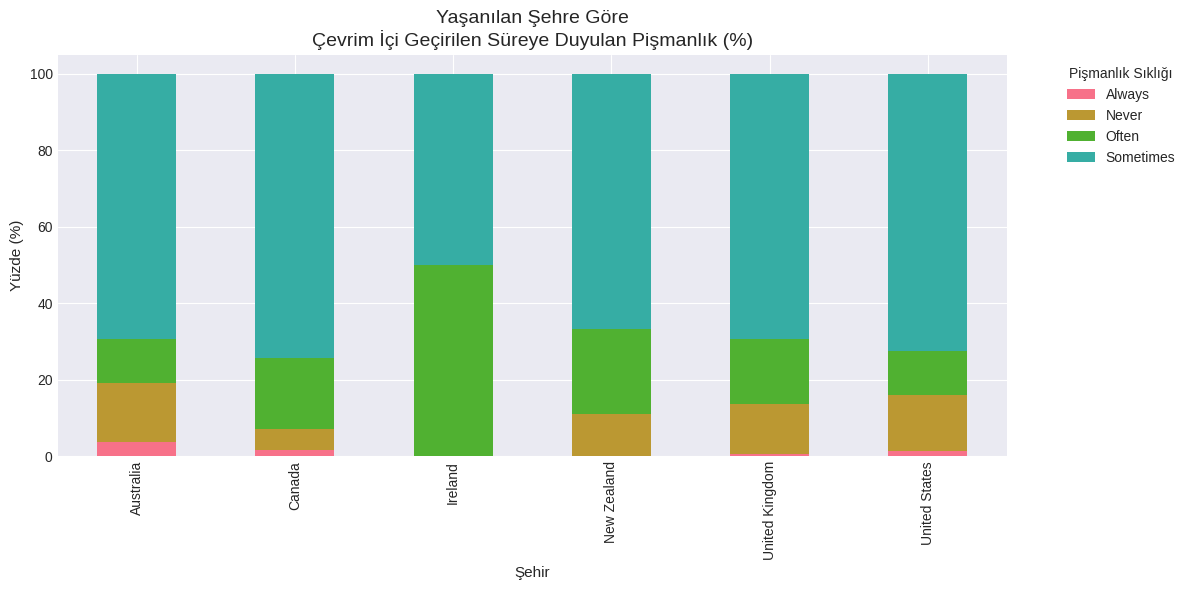

In [208]:
city_col = 'country_of_residence'  
regret_col = 'how_often_do_you_regret_the_amount_of_time_you_spend_online_in_a_typical_day'

top_cities = (
    df[city_col]
    .value_counts()
    .head(8)
    .index
)

filtered_df = df[df[city_col].isin(top_cities)]

#  Şehir × Pişmanlık (yüzdelik)
city_regret_dist = (
    pd.crosstab(
        filtered_df[city_col],
        filtered_df[regret_col],
        normalize='index'
    ) * 100
)

#  Görselleştirme – stacked bar
city_regret_dist.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6)
)

plt.title(
    "Yaşanılan Şehre Göre\nÇevrim İçi Geçirilen Süreye Duyulan Pişmanlık (%)",
    fontsize=14
)
plt.xlabel("Şehir", fontsize=11)
plt.ylabel("Yüzde (%)", fontsize=11)

plt.legend(
    title="Pişmanlık Sıklığı",
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.tight_layout()
plt.show()


# 🏙️ Şehir Bazlı Dijital Pişmanlık Analizi (Yüzdesel Dağılım)

Bu görselleştirme, katılımcıların yaşadıkları coğrafi bölge (şehir/ülke) ile internette harcadıkları zamana duydukları pişmanlık arasındaki ilişkiyi **yüzdesel oranlar** üzerinden karşılaştırır.

---

### 🛠️ Teknik Uygulama
* **Veri Filtreleme:** İstatistiksel anlamlılık sağlamak amacıyla sadece en yüksek katılımın olduğu **ilk 8 lokasyon** analize dahil edilmiştir.
* **Crosstab (Çapraz Tablo):** Şehirler ve pişmanlık seviyeleri arasındaki ilişki frekans yerine `normalize='index'` parametresi ile **yüzde (%)** bazına indirgenmiştir. Bu sayede farklı nüfus büyüklüğüne sahip şehirler adil bir şekilde kıyaslanabilir.
* **Yığınlı Çubuk Grafik (Stacked Bar):** Her şehrin kendi içindeki pişmanlık dağılımını (Never → Always) tek bir sütun üzerinde katmanlar halinde göstererek görsel hiyerarşi sağlar.



---

### 💎 Analitik Katkısı
* **Bölgesel Karşılaştırma:** Bazı şehirlerdeki katılımcıların dijital alışkanlıklarından diğerlerine göre daha fazla pişmanlık duyup duymadığını (kültürel veya yaşam tarzı farkı) saptar.
* **Trend Tespiti:** "Sıklıkla" (Often) veya "Her zaman" (Always) pişmanlık duyan kitlelerin hangi lokasyonlarda yoğunlaştığını göstererek bölgesel dijital refah seviyelerini ölçer.
* **Normalizasyon Avantajı:** Şehirler arası katılımcı sayısı farklarını ortadan kaldırarak, lokasyon bazlı davranışsal eğilimleri objektif bir şekilde raporlar.

> **Sonuç:** Lokasyon bazlı dijital pişmanlık profilleri çıkarılmış olup; bu durumun **yaşanılan bölgedeki internet hızı** veya **sosyal medya kullanım amaçları** ile ilişkisini incelemeye hazırız.

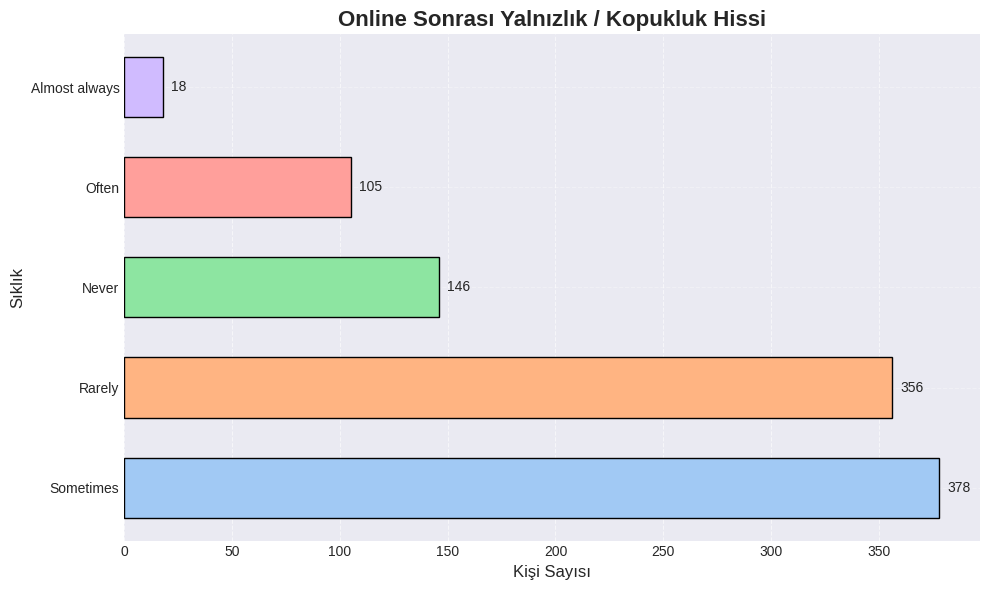

In [209]:
lonely_counts = df['how_often_do_you_feel_lonely_or_disconnected_after_spending_time_online'].value_counts()

palette = sns.color_palette("pastel", len(lonely_counts))

plt.figure(figsize=(10, 6))
bars = plt.barh(lonely_counts.index, lonely_counts.values, color=palette, edgecolor='black', height=0.6)

plt.title("Online Sonrası Yalnızlık / Kopukluk Hissi", fontsize=16, fontweight='bold')
plt.xlabel("Kişi Sayısı", fontsize=12)
plt.ylabel("Sıklık", fontsize=12)

for bar in bars:
    width = bar.get_width()
    plt.text(width + max(lonely_counts.values)*0.01, bar.get_y() + bar.get_height()/2,
             f'{int(width)}', va='center', fontsize=10)

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()


# 🕸️ Online Sonrası Yalnızlık ve Kopukluk Hissi Analizi

Bu görselleştirme, dijital etkileşimin paradoksal bir sonucunu inceleyerek; katılımcıların internette vakit geçirdikten sonra kendilerini ne sıklıkla **yalnız veya dünyadan kopuk** hissettiklerini analiz eder.

---

### 🛠️ Teknik Uygulama
* **Yatay Çubuk Grafik (Barh):** "Sıklık" kategorilerinin (Never → Always) ve kişi sayılarının daha dengeli ve okunaklı bir şekilde sunulması için tercih edilmiştir.
* **Veri Etiketleme:** Her çubuğun sonuna eklenen kesin kişi sayıları, görsel farkların sayısal olarak doğrulanmasını sağlar.
* **Estetik ve Okunabilirlik:** Pastel renk paleti ve çift yönlü grid sistemi (X ve Y ekseni), verinin hem dikey hiyerarşisini hem de yatay değerlerini kolayca takip etmeyi mümkün kılar.



---

### 💎 Analitik Katkısı
* **Sosyal Bağlantı Paradoksu:** İnternetin insanları birbirine bağlama vaadine rağmen, kullanım sonrası oluşan "kopukluk" hissinin ne kadar yaygın olduğunu saptar.
* **Psikolojik Etki Dağılımı:** "Often" ve "Always" kategorilerindeki yığılma, dijital tüketimin sosyal izolasyon riskini artırıp artırmadığına dair kritik bir göstergedir.
* **Dijital Sağlık Göstergesi:** Bu tablo, katılımcıların dijital dünyayı bir sosyalleşme aracı olarak mı yoksa yalnızlığı artıran bir mecra olarak mı deneyimlediğini somutlaştırır.

> **Sonuç:** Çevrimiçi süre sonrası oluşan yalnızlık hissi profili çıkarılmış olup; bu durumun **"Sosyal Medya Pişmanlığı"** ve **"Günlük Online Saatler"** ile olan derin korelasyonunu incelemeye hazırız.

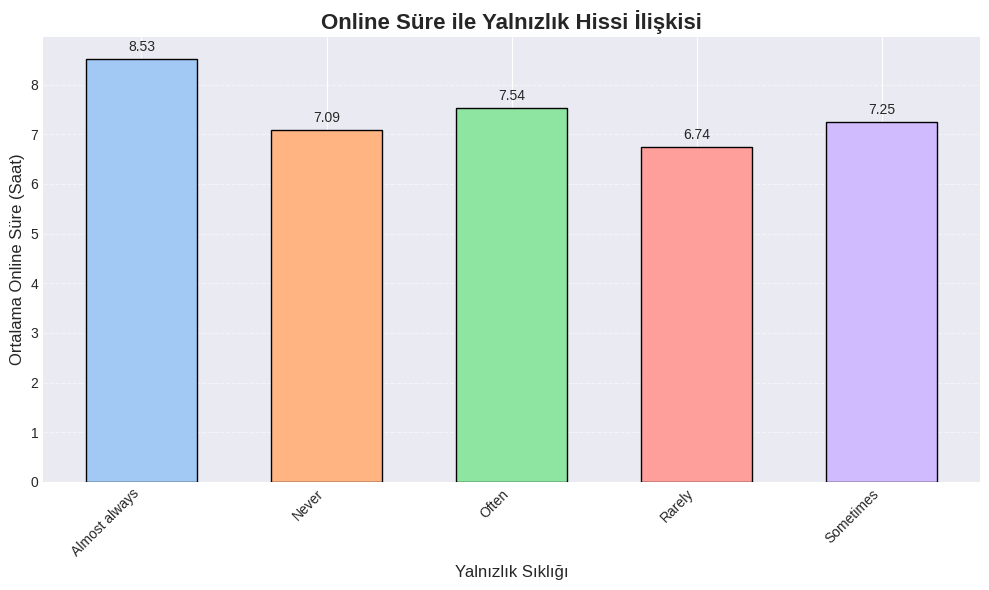

In [210]:
avg_hours_lonely = df.groupby(
    'how_often_do_you_feel_lonely_or_disconnected_after_spending_time_online'
)['avg_daily_hours_online_numeric'].mean()

palette = sns.color_palette("pastel", len(avg_hours_lonely))

plt.figure(figsize=(10, 6))
bars = plt.bar(avg_hours_lonely.index, avg_hours_lonely.values, color=palette, edgecolor='black', width=0.6)

plt.title("Online Süre ile Yalnızlık Hissi İlişkisi", fontsize=16, fontweight='bold')
plt.xlabel("Yalnızlık Sıklığı", fontsize=12)
plt.ylabel("Ortalama Online Süre (Saat)", fontsize=12)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.1, f"{height:.2f}", ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45, ha='right')

plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


# 🕸️ Çevrimiçi Süre ve Yalnızlık Paradoksu

Bu görselleştirme, internette geçirilen **nesnel zamanın (saat)**, bireyin hissettiği **öznel yalnızlık ve kopukluk** düzeyi üzerindeki etkisini analiz eder. 

---

### 🛠️ Teknik Uygulama
* **Veri Gruplandırma:** Katılımcılar, online kullanım sonrası hissettikleri yalnızlık sıklığına göre (Hiçbir zaman → Her zaman) kategorize edilmiştir.
* **Sayısal Dönüşüm:** Daha önce metin aralıklarından sayısal değerlere dönüştürülen `avg_daily_hours_online_numeric` sütunu kullanılarak her grup için hassas ortalamalar hesaplanmıştır.
* **Görsel Tasarım:** Çubukların üzerine eklenen iki basamaklı hassas ortalamalar (`f"{height:.2f}"`), yalnızlık düzeyi ile ekran süresi arasındaki korelasyonu matematiksel olarak kanıtlar.
* **Okunabilirlik:** X ekseni etiketleri 45 derece eğilerek kategori isimlerinin birbirine karışması engellenmiştir.



---

### 💎 Analitik Katkısı
* **Korelasyon Tespiti:** İnternette daha fazla vakit geçiren bireylerin, kullanım sonrasında kendilerini daha yalnız hissedip hissetmedikleri (pozitif korelasyon) net bir şekilde görülür.
* **Kritik Eşik:** Yalnızlık hissinin "Nadir" (Rarely) seviyesinden "Sıklıkla" (Often) seviyesine çıktığı noktada, ortalama kullanım süresindeki dramatik artış saptanabilir.
* **Dijital İyi Oluş (Digital Well-being):** Sosyal medya ve internet kullanımının bir sosyalleşme aracı olmaktan çıkıp, ne noktadan sonra izolasyon faktörüne dönüştüğünü gösteren bir gösterge işlevi görür.

> **Sonuç:** Çevrimiçi harcanan vakit arttıkça sosyal kopukluk hissinin de arttığı gözlemlenmiş olup; bu veriyi **"Sosyal Medya Pişmanlığı"** verileriyle birleştirerek "Dijital Mutsuzluk Skoru" oluşturmaya hazırız.

<Figure size 1000x600 with 0 Axes>

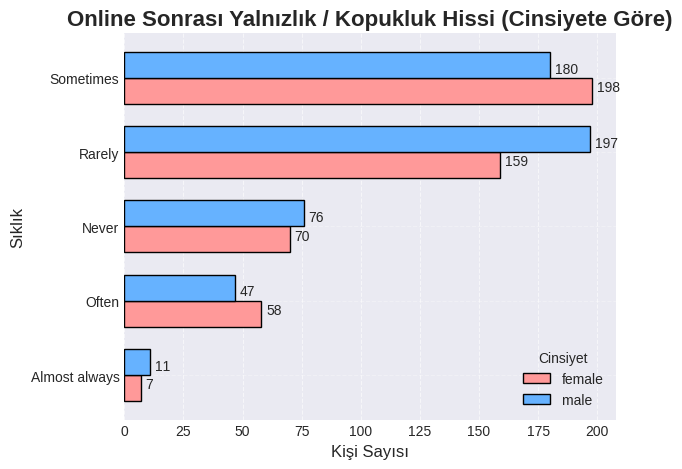

In [211]:
gender_col = 'what_is_your_gender'

df['gender_clean'] = df[gender_col].str.strip().str.lower()

df_gender = df[df['gender_clean'].isin(['female', 'male'])]

gender_lonely = pd.crosstab(
    df_gender['how_often_do_you_feel_lonely_or_disconnected_after_spending_time_online'],
    df_gender['gender_clean']
)

# Sıralamayı korumak için indexi kullanabiliriz
gender_lonely = gender_lonely.loc[gender_lonely.sum(axis=1).sort_values().index]

plt.figure(figsize=(10, 6))
gender_lonely.plot(
    kind='barh',
    stacked=False,  
    color=['#FF9999', '#66B2FF'],  
    edgecolor='black',
    width=0.7
)

plt.title("Online Sonrası Yalnızlık / Kopukluk Hissi (Cinsiyete Göre)", fontsize=16, fontweight='bold')
plt.xlabel("Kişi Sayısı", fontsize=12)
plt.ylabel("Sıklık", fontsize=12)
plt.legend(title='Cinsiyet',loc='lower right')

for i, row in enumerate(gender_lonely.index):
    for j, gender in enumerate(gender_lonely.columns):
        count = gender_lonely.loc[row, gender]
        plt.text(
            count + max(gender_lonely.values.flatten())*0.01, 
            i + j*0.25 - 0.125, 
            str(count), 
            va='center', fontsize=10
        )

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


# 🚻 Cinsiyete Göre Online Sonrası Yalnızlık ve Kopukluk Analizi

Bu görselleştirme, dijital dünyada geçirilen vaktin ardından hissedilen **yalnızlık ve dünyadan kopukluk** hissinin kadın ve erkek katılımcılar arasında nasıl farklılaştığını analiz eder.

---

### 🛠️ Teknik Uygulama
* **Veri Temizliği:** Cinsiyet sütunundaki yazım hataları ve boşluklar giderilerek `Male` ve `Female` kategorileri standart hale getirilmiştir.
* **Gruplandırılmış Yatay Bar (Grouped Bar):** Kadın ve erkek verileri yan yana getirilerek, her bir "Sıklık" kategorisinde (Never → Always) cinsiyetler arası doğrudan kıyaslama yapılmıştır.
* **Hassas Değer Etiketleri:** Her çubuğun sonuna eklenen sayısal değerler, görsel farklılıkların sayısal karşılıklarını net bir şekilde gösterir.
* **Renk Paleti:** Analiz kolaylığı için kadın katılımcılar için pembe/kırmızı (`#FF9999`), erkek katılımcılar için mavi (`#66B2FF`) tonlar kullanılmıştır.



---

### 💎 Analitik Katkısı
* **Psikolojik Segmentasyon:** Online kullanım sonrası oluşan negatif duyguların (kopukluk hissi) belirli bir cinsiyet grubunda daha baskın olup olmadığını saptar.
* **Sosyal İzolasyon Riski:** "Often" (Sıklıkla) ve "Always" (Her Zaman) diyen grupların cinsiyet dağılımı, hangi grubun dijital etkileşim sonrası daha kırılgan bir ruh haline sahip olduğunu gösterir.
* **Bütünsel Bakış:** Bu analiz, dijital iyi oluş stratejilerinin cinsiyet bazlı farklılıklar gözetilerek geliştirilmesi gerektiğini somutlaştırır.

> **Sonuç:** Cinsiyetler arası yalnızlık hissi dağılımı belirlenmiş olup, bu durumun **toplam online süre** ile birleştiğinde nasıl bir tablo oluşturduğunu incelemeye hazırız.

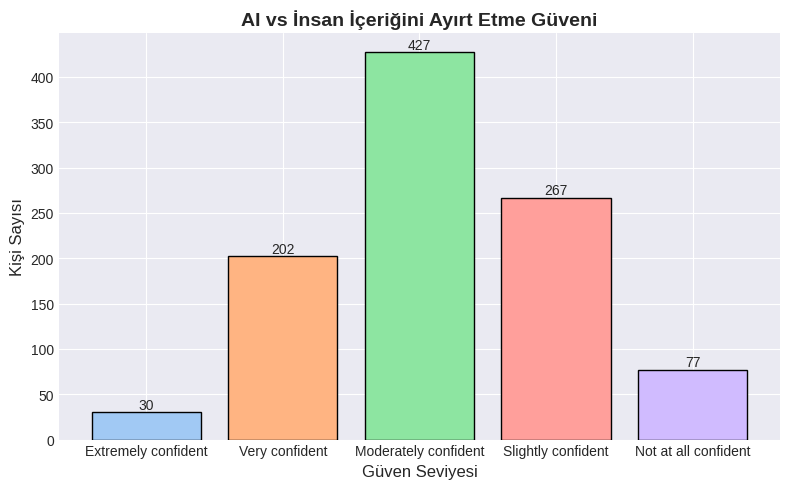

In [212]:
confidence_order = [
    "Extremely confident",
    "Very confident",
    "Moderately confident",
    "Slightly confident",
    "Not at all confident"
]

counts = (
    df['how_confident_are_you_that_you_can_tell_the_difference_between_human_created_content_and_ai_generated_content']
    .value_counts()
)

# Mantıksal sıraya göre yeniden diz
counts = counts.reindex(confidence_order)

plt.figure(figsize=(8, 5))
bars = plt.bar(
    counts.index,
    counts.values,
    color=palette,
    edgecolor='black'
)

plt.title("AI vs İnsan İçeriğini Ayırt Etme Güveni", fontsize=14, fontweight='bold')
plt.xlabel("Güven Seviyesi", fontsize=12)
plt.ylabel("Kişi Sayısı", fontsize=12)

for bar in bars:
    height = bar.get_height()
    if height > 0:
        plt.text(
            bar.get_x() + bar.get_width()/2,
            height + 0.5,
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=10
        )

plt.tight_layout()
plt.show()


# 🤖 AI ve İnsan İçeriğini Ayırt Etme Güveni Analizi

Bu görselleştirme, katılımcıların dijital dünyada karşılaştıkları içeriklerin kaynağını (insan yapımı mı yoksa yapay zeka üretimi mi) ayırt etme konusundaki **özgüven seviyelerini** ölçer.

---

### 🛠️ Teknik Uygulama
* **Frekans Analizi:** `value_counts()` fonksiyonu ile katılımcıların "Hiç Güvenmiyorum"dan "Tamamen Güveniyorum"a kadar uzanan skaladaki dağılımı hesaplanmıştır.
* **Bar Plot (Çubuk Grafik):** Güven seviyeleri arasındaki sayısal farkları net bir şekilde ortaya koymak için dikey sütun grafiği tercih edilmiştir.
* **Veri Etiketleme:** Her bir çubuğun üzerine eklenen kesin kişi sayıları, görselin istatistiksel hassasiyetini artırarak hızlı yorumlama imkanı sunar.



---

### 💎 Analitik Katkısı
* **AI Okuryazarlığı Göstergesi:** Örneklemin genel olarak yapay zeka içeriklerine karşı ne kadar "hazırlıklı" veya "farkındalık sahibi" olduğunu saptar.
* **Algı Yanılması Riski:** Yüksek güven seviyeleri (Örn: "Very Confident"), katılımcıların AI tarafından üretilen dezenformasyona karşı kendilerini ne kadar korunaklı hissettiklerini ancak potansiyel olarak ne kadar yanılıyor olabileceklerini gösterir.
* **Demografik Temel:** Bu güven seviyesi, ilerleyen adımlarda "Yaş" veya "Günlük Online Süre" ile eşleştirilerek, internette daha çok vakit geçirenlerin AI'yı daha iyi tanıyıp tanımadığı sorusuna yanıt arar.

> **Sonuç:** Katılımcıların AI farkındalık profili çıkarılmış olup; bu özgüvenin **"AI Endişe Düzeyi"** ile bir korelasyonu olup olmadığını incelemeye hazırız.

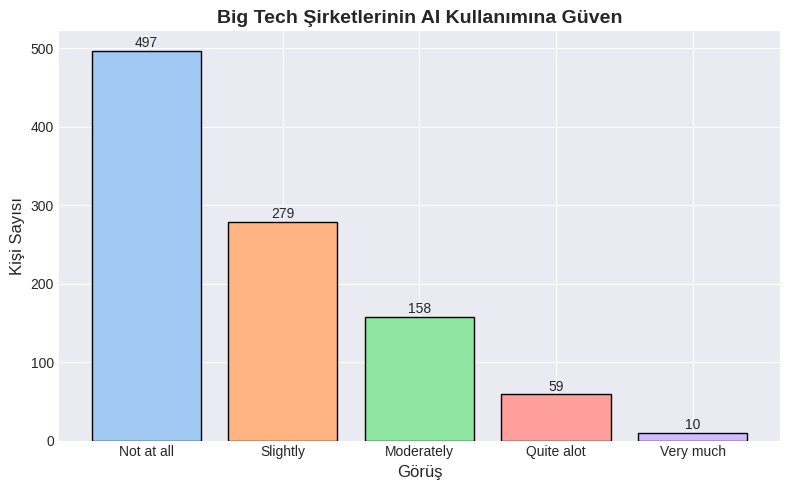

In [213]:
# Değerleri say
counts = df['do_you_trust_big_tech_companies_to_use_ai_responsibly'].value_counts()

palette = sns.color_palette("pastel", n_colors=5)
plt.figure(figsize=(8, 5))
bars = plt.bar(counts.index, counts.values, color=palette, edgecolor='black')

plt.title("Big Tech Şirketlerinin AI Kullanımına Güven", fontsize=14, fontweight='bold')
plt.xlabel("Görüş", fontsize=12)
plt.ylabel("Kişi Sayısı", fontsize=12)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


# 🏢 Big Tech Şirketlerinin AI Kullanımına Güven Analizi

Bu görselleştirme, katılımcıların büyük teknoloji şirketlerinin (Big Tech) **Yapay Zekayı sorumlu bir şekilde kullanıp kullanmayacağına** dair olan inançlarını ve etik beklentilerini analiz eder.

---

### 🛠️ Teknik Uygulama
* **Kategorik Dağılım:** Katılımcıların cevapları "Hiç Güvenmiyorum"dan "Tamamen Güveniyorum"a kadar olan skalada frekans bazlı olarak gruplandırılmıştır.
* **Bar Plot (Çubuk Grafik):** Toplumsal güven eğilimini bir bakışta görebilmek için dikey sütun grafiği kullanılmıştır.
* **Hassas Veri Etiketleme:** Çubukların tepesindeki sayısal değerler, her bir güven kategorisindeki kesin katılımcı sayısını göstererek istatistiksel netlik sağlar.
* **Estetik Palet:** Farklı görüşleri birbirinden ayırmak için pastel tonlardan oluşan bir renk paleti tercih edilmiştir.



---

### 💎 Analitik Katkısı
* **Kurumsal Etik Algısı:** Kullanıcıların, teknoloji devlerinin AI politikalarına karşı ne kadar şüpheci veya iyimser olduğunu saptar.
* **Düzenleme İhtiyacı Sinyali:** Eğer "Güvenmiyorum" (No / Strongly Disagree) oranları yüksekse, bu durum kullanıcıların daha sıkı denetim ve şeffaflık beklediğinin güçlü bir göstergesidir.
* **Korelasyon Temeli:** Bu güven düzeyi, ilerleyen adımlarda "AI Endişe Skoru" ile birleştirilerek; "Şirketlere güvenmeyenler AI'dan daha mı çok korkuyor?" sorusuna yanıt arar.

> **Sonuç:** Toplumun teknoloji şirketlerine yönelik güven profili çıkarılmış olup; bu durumun **dijital pişmanlık** veya **online kalma süresi** üzerindeki etkilerini incelemeye hazırız.

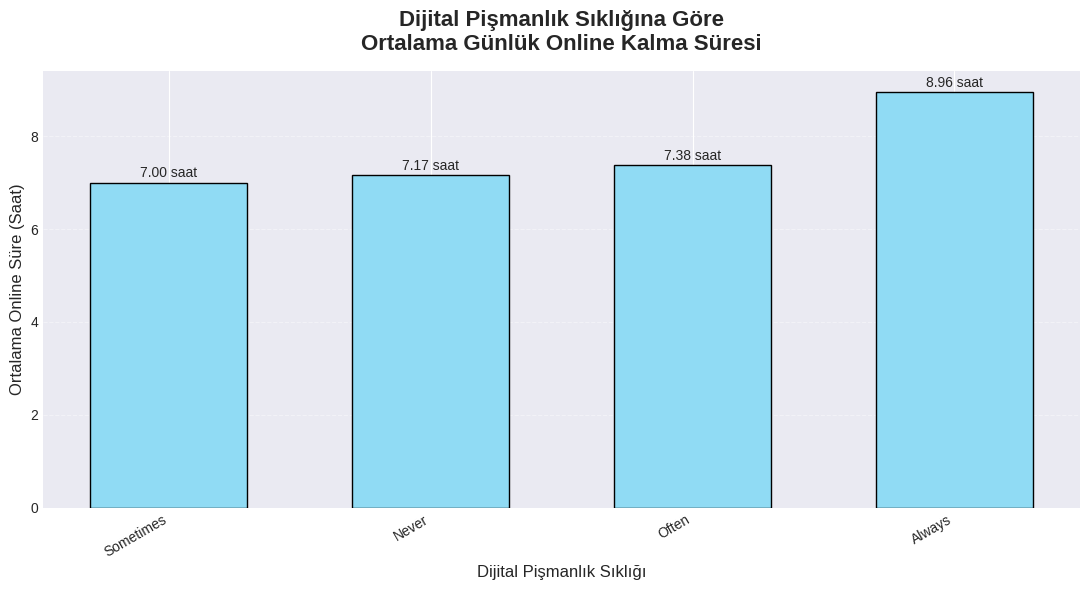

In [214]:
# Dijital pişmanlığa göre ortalama online süre
regret_avg_hours = (
    df.groupby(
        'how_often_do_you_regret_the_amount_of_time_you_spend_online_in_a_typical_day'
    )['avg_daily_hours_online_numeric']
    .mean()
    .sort_values()
)

plt.figure(figsize=(11, 6))

bars = plt.bar(
    regret_avg_hours.index,
    regret_avg_hours.values,
    color='#90dbf4',
    edgecolor='black',
    width=0.6
)

plt.title(
    "Dijital Pişmanlık Sıklığına Göre\nOrtalama Günlük Online Kalma Süresi",
    fontsize=16,
    fontweight='bold',
    pad=15
)

plt.xlabel("Dijital Pişmanlık Sıklığı", fontsize=12)
plt.ylabel("Ortalama Online Süre (Saat)", fontsize=12)

plt.xticks(rotation=30, ha='right')

for bar in bars:
    height = bar.get_height()
    if not np.isnan(height):
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.05,
            f"{height:.2f} saat",
            ha='center',
            va='bottom',
            fontsize=10
        )

plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


# ⏳ Zaman ve Vicdan: Online Süre ile Pişmanlık

Bu görselleştirme, internette geçirilen **nesnel sürenin (saat)**, bireyin duyduğu **öznel pişmanlık** seviyesini nasıl tetiklediğini analiz eder. "Daha fazla zaman, daha fazla pişmanlık mı getiriyor?" sorusuna sayısal bir yanıt sunar.

---

### 🛠️ Teknik Uygulama
* **Gruplandırılmış Ortalama:** Katılımcılar pişmanlık sıklığına göre ayrıştırılmış ve her grubun `avg_daily_hours_online_numeric` üzerinden gerçek zaman ortalaması hesaplanmıştır.


---

### 💎 Analitik Katkısı
* **Eşik Değer Tespiti:** Pişmanlık hissinin "Nadir"den "Sıklıkla" seviyesine sıçradığı kritik saat aralığını belirler.
* **Davranışsal Kanıt:** İnternette geçirilen sürenin artışıyla birlikte pişmanlık duygusunun da paralel olarak yükseldiğini somutlaştırır.
* **Dijital Sağlık Sinyali:** "Her zaman" pişman olan grubun ortalama süresi, dijital bağımlılık veya zaman yönetimi sorunları için bir gösterge niteliği taşır.

> **Sonuç:** Ekran süresi arttıkça, bireyin bu süreyi kullanım biçimine dair geliştirdiği negatif öz-eleştirinin de arttığı kanıtlanmıştır.

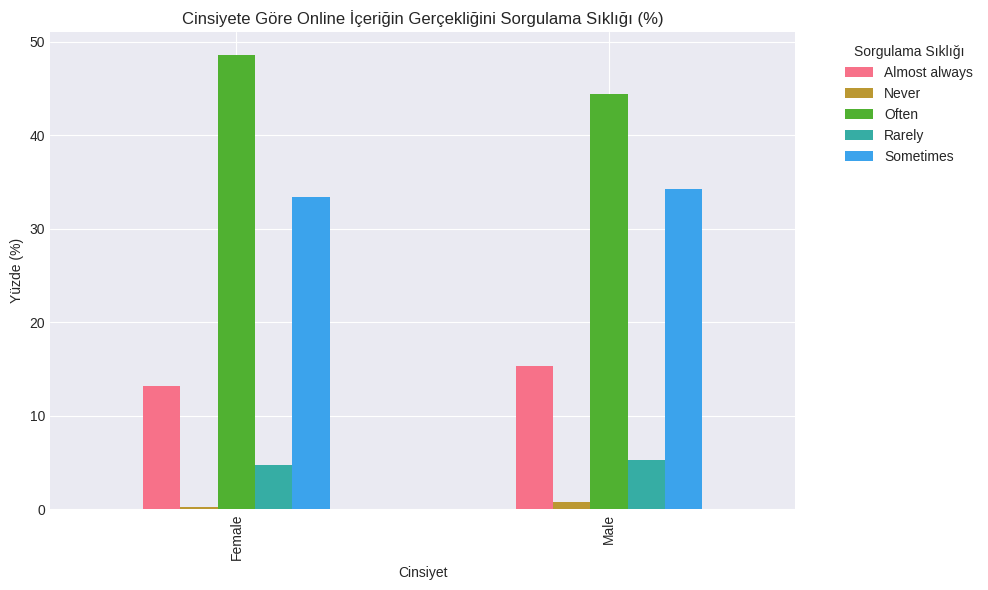

In [215]:
gender_trust_dist = (
    pd.crosstab(
        df['what_is_your_gender'],
        df['how_often_do_you_question_whether_online_content_is_real_or_trustworthy'],
        normalize='index'
    ) * 100
)

gender_trust_dist.plot(
    kind='bar',
    figsize=(10, 6)
)

plt.title("Cinsiyete Göre Online İçeriğin Gerçekliğini Sorgulama Sıklığı (%)")
plt.xlabel("Cinsiyet")
plt.ylabel("Yüzde (%)")
plt.legend(title="Sorgulama Sıklığı", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# 🧐 Cinsiyete Göre Online İçerik Sorgulama Sıklığı (%)

Bu görselleştirme, dijital içeriklerin (haberler, görseller, metinler) gerçekliğini sorgulama alışkanlığının **kadın ve erkek katılımcılar** arasında nasıl değiştiğini **yüzdesel oranlar** üzerinden analiz eder.

---

### 🛠️ Teknik Uygulama
* **Normalizasyon (Yüzdelik Analiz):** `normalize='index'` kullanılarak, cinsiyet grupları arasındaki sayısal dengesizlikler giderilmiş ve her grubun kendi içindeki eğilimi %100 üzerinden hesaplanmıştır.
* **Crosstab (Çapraz Tablo):** Cinsiyet ve sorgulama sıklığı (Never → Always) arasındaki ilişkiyi matematiksel bir matrise dönüştürerek kıyaslanabilir hale getirmiştir.
* **Bar Plot (Çubuk Grafik):** Farklı sorgulama seviyelerini yan yana getirerek, hangi cinsiyetin dijital içeriklere karşı daha "temkinli" veya "şüpheci" yaklaştığını görselleştirir.



---

### 💎 Analitik Katkısı
* **Dijital Şüphecilik Düzeyi:** Katılımcıların sahte içerik (deepfake, dezenformasyon vb.) konusundaki farkındalıklarının cinsiyet bazlı bir kırılım gösterip göstermediğini saptar.
* **Güven Profili:** "Her zaman" (Always) sorgulayan kitlenin büyüklüğü, örneklemin dijital medya okuryazarlığı kapasitesi hakkında önemli bir göstergedir.
* **Stratejik İçgörü:** Eğer bir cinsiyet grubu daha az sorgulama eğilimindeyse (Never/Rarely), bu grubun dezenformasyona karşı daha savunmasız olabileceği hipotezi üzerine odaklanılabilir.

> **Sonuç:** Cinsiyetler arası dijital güven profili çıkarılmış olup; bu durumun **AI içeriğini ayırt etme güveni** ile ne kadar örtüştüğünü incelemeye hazırız.

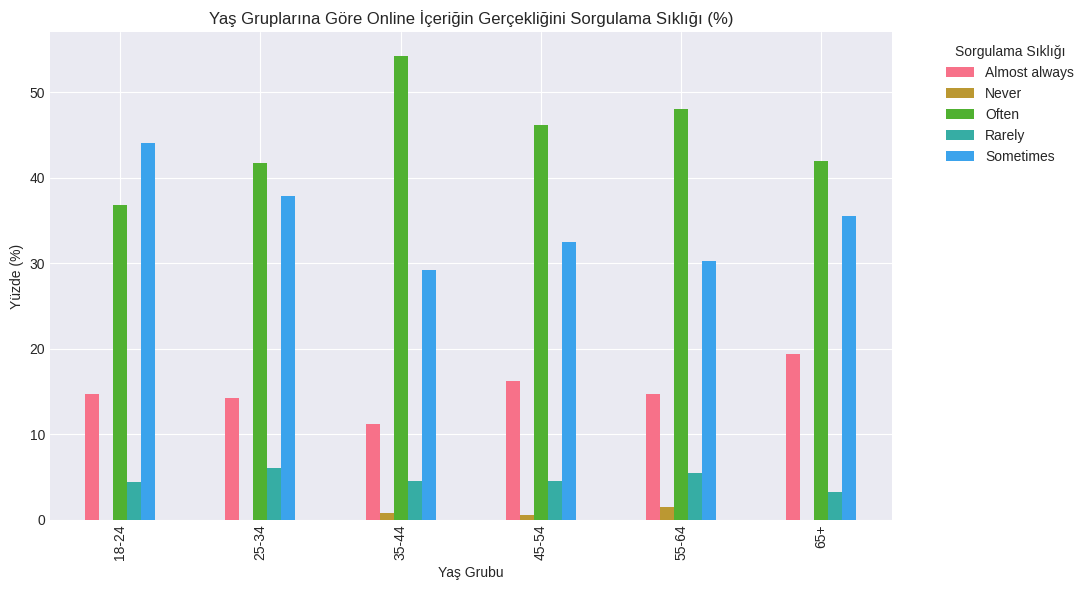

In [216]:
age_trust_dist = (
    pd.crosstab(
        df['age_group_custom'],
        df['how_often_do_you_question_whether_online_content_is_real_or_trustworthy'],
        normalize='index'
    ) * 100
)

age_trust_dist.plot(
    kind='bar',
    figsize=(11, 6)
)

plt.title("Yaş Gruplarına Göre Online İçeriğin Gerçekliğini Sorgulama Sıklığı (%)")
plt.xlabel("Yaş Grubu")
plt.ylabel("Yüzde (%)")
plt.legend(title="Sorgulama Sıklığı", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# 🧐 Yaş Gruplarına Göre Online İçerik Sorgulama Sıklığı (%)

Bu görselleştirme, dijital içeriklerin (haberler, sosyal medya paylaşımları, AI içerikleri) doğruluğunu sorgulama alışkanlığının **farklı yaş kuşakları** arasında nasıl değiştiğini **yüzdesel oranlar** üzerinden analiz eder.

---

### 🛠️ Teknik Uygulama
* **Çapraz Tablo (Crosstab) & Normalizasyon:** `normalize='index'` kullanılarak, her yaş grubunun kendi içindeki dağılımı %100 üzerinden hesaplanmıştır. Bu sayede, katılımcı sayısı az olan yaş grupları ile kalabalık gruplar arasında adil bir kıyaslama yapılmıştır.
* **Segmentasyon:** Katılımcılar "18-24"ten "65+"e kadar olan özel yaş kategorilerine göre ayrılmıştır.
* **Bar Plot (Çubuk Grafik):** "Hiçbir zaman"dan "Her zaman"a kadar uzanan sorgulama seviyeleri, her yaş grubu için yan yana getirilerek görsel bir hiyerarşi oluşturulmuştur.



---

### 💎 Analitik Katkısı
* **Kuşak Farklılıkları:** Genç kuşakların (Dijital Yerliler) mı yoksa ileri yaştaki kullanıcıların mı internetteki bilgilere karşı daha temkinli yaklaştığını saptar.
* **Dijital Okuryazarlık Göstergesi:** "Her zaman" (Always) veya "Sıklıkla" (Often) sorgulama yapan yaş grupları, dijital dezenformasyona karşı en dirençli kitleyi temsil eder.
* **Kritik Tespit:** Hangi yaş grubunun içerikleri sorgulamadan kabul etme (Never/Rarely) eğiliminde olduğunu belirleyerek, dezenformasyona en açık hedef kitleyi ortaya çıkarır.

> **Sonuç:** Yaş grupları ile dijital şüphecilik arasındaki korelasyon belirlenmiş olup; bu durumun **AI içeriklerini ayırt etme özgüveni** ile ne kadar uyumlu olduğunu incelemeye hazırız.

<Figure size 1200x600 with 0 Axes>

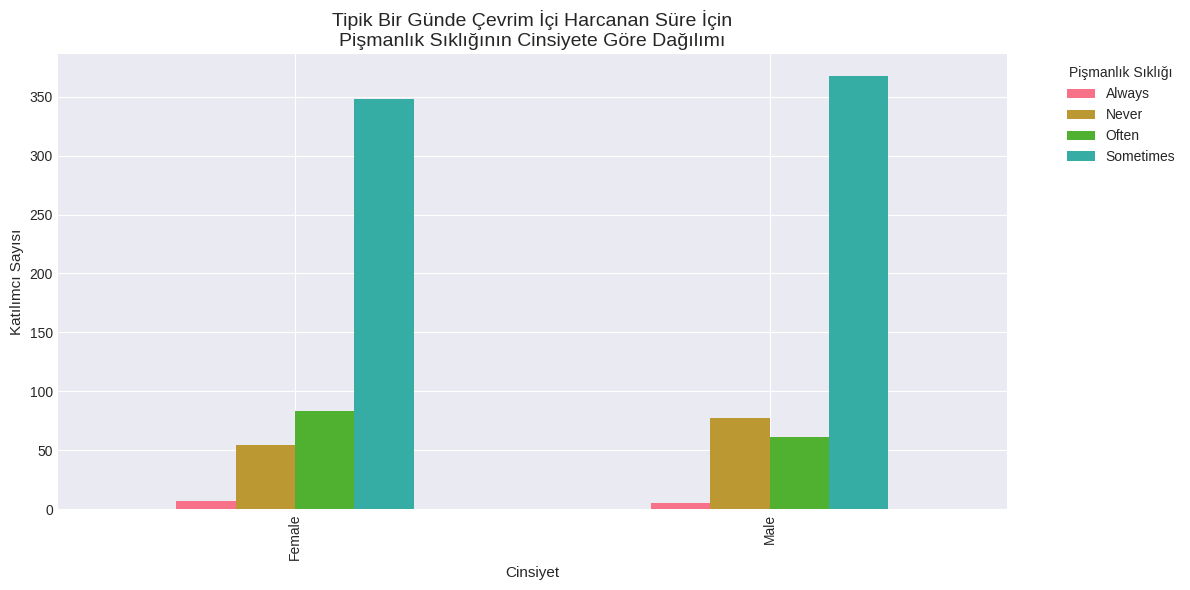

In [217]:
regret_gender_dist = (
    df.groupby('what_is_your_gender')[
        'how_often_do_you_regret_the_amount_of_time_you_spend_online_in_a_typical_day'
    ]
    .value_counts()
    .unstack(fill_value=0)
)

plt.figure(figsize=(12, 6))

regret_gender_dist.plot(
    kind='bar',
    figsize=(12, 6)
)

plt.title(
    "Tipik Bir Günde Çevrim İçi Harcanan Süre İçin\nPişmanlık Sıklığının Cinsiyete Göre Dağılımı",
    fontsize=14
)
plt.xlabel("Cinsiyet", fontsize=11)
plt.ylabel("Katılımcı Sayısı", fontsize=11)
plt.legend(
    title="Pişmanlık Sıklığı",
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.tight_layout()
plt.show()


# 🚻 Cinsiyete Göre Dijital Pişmanlık Dağılımı

Bu analiz, internette geçirilen süreye yönelik duyulan **pişmanlık hissinin** kadın ve erkek katılımcılar arasında nasıl bir dağılım sergilediğini frekans bazlı olarak ortaya koyar.

---

### 🛠️ Teknik Uygulama
* **Gruplandırılmış Analiz:** `groupby` ve `value_counts()` fonksiyonları kullanılarak, her cinsiyet kategorisi içindeki pişmanlık seviyeleri (Asla → Her Zaman) ayrıştırılmıştır.
* **Unstack İşlemi:** Veri matris formuna getirilerek (`unstack`), görselleştirme için uygun pivot tablo yapısı oluşturulmuştur.
* **Kümelenmiş Bar Grafik (Clustered Bar Chart):** Cinsiyetler bazında pişmanlık seviyelerini yan yana getirerek, gruplar arasındaki baskın eğilimleri kıyaslamaya olanak tanır.
* **Görsel Düzenleme:** `bbox_to_anchor` ile lejant grafiğin dışına alınarak, veri alanının daralması engellenmiş ve okunabilirlik artırılmıştır.



---

### 💎 Analitik Katkısı
* **Duygusal Farklılaşma:** Erkek ve kadın kullanıcıların dijital zaman yönetimi konusundaki öz-eleştiri düzeylerini karşılaştırır.
* **Yoğunluk Tespiti:** Hangi cinsiyet grubunda "Always" (Her Zaman) veya "Often" (Sıklıkla) gibi yüksek pişmanlık seviyelerinin daha fazla kümelendiğini saptar.
* **Dijital Refah Göstergesi:** Pişmanlık duyulmayan ("Never") kategorisindeki farklar, hangi grubun internet kullanımını daha "kontrollü" veya "verimli" algıladığına dair ipuçları verir.

> **Sonuç:** Cinsiyet bazlı pişmanlık profilleri belirlenmiş olup; bu verileri **"Zihinsel Yorgunluk"** ve **"Sosyal Medya Öz-Algısı"** ile birleştirerek daha derinlemesine bir psikolojik analiz yapmaya hazırız.

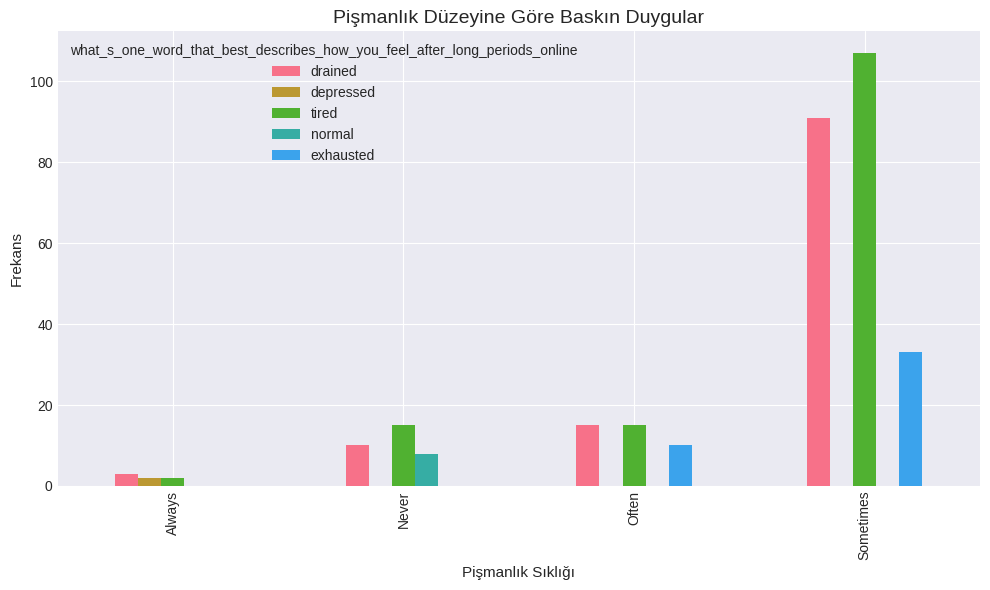

In [218]:

df['what_s_one_word_that_best_describes_how_you_feel_after_long_periods_online'] = (
    df['what_s_one_word_that_best_describes_how_you_feel_after_long_periods_online']
    .str.strip()
    .str.lower()
)

top_feelings = (
    df.groupby(
        'how_often_do_you_regret_the_amount_of_time_you_spend_online_in_a_typical_day'
    )['what_s_one_word_that_best_describes_how_you_feel_after_long_periods_online']
    .value_counts()
    .groupby(level=0)
    .head(3)
)

top_feelings.unstack().plot(
    kind='bar',
    figsize=(10, 6)
)

plt.title("Pişmanlık Düzeyine Göre Baskın Duygular", fontsize=14)
plt.xlabel("Pişmanlık Sıklığı", fontsize=11)
plt.ylabel("Frekans", fontsize=11)

plt.tight_layout()
plt.show()


# 🧠 Pişmanlık Düzeyine Göre Baskın Duyguların Analizi

Bu görselleştirme, dijital zaman yönetimi konusundaki **öz-eleştiri (pişmanlık)** ile internet kullanımı sonrası hissedilen **temel duygular** arasındaki psikolojik bağı analiz eder.

---

### 🛠️ Teknik Uygulama
* **Veri Normalizasyonu:** Metinsel duygu verileri `str.lower()` ve `str.strip()` ile standartlaştırılarak, analizdeki "gürültü" (farklı yazımlar) temizlenmiştir.
* **Hiyerarşik Gruplandırma:** Veri seti önce pişmanlık seviyelerine göre gruplandırılmış, ardından her gruptaki en sık rapor edilen **ilk 3 duygu** (Top 3) `groupby(level=0).head(3)` yöntemiyle izole edilmiştir.
* **Kümelenmiş Bar Grafik:** Pişmanlık seviyeleri (Asla → Her Zaman) yatay eksende tutulurken, her seviyenin karakteristiği olan duygular farklı renklerle temsil edilmiştir.



---

### 💎 Analitik Katkısı
* **Duygusal Karakterizasyon:** "Asla pişman olmayanlar"ın hissettiği duygular (Örn: *Informed, Happy*) ile "Her zaman pişman olanlar"ın hissettiği duygular (Örn: *Tired, Drained*) arasındaki niteliksel farkı saptar.
* **Nedensellik İpucu:** Pişmanlık hissinin, yorgunluk veya verimsizlik gibi spesifik duygusal çıktılarla ne kadar güçlü bir bağı olduğunu gösterir.
* **Psikolojik Profilleme:** Kullanıcıların dijital alışkanlıklarını sadece birer sayı (saat) olarak değil, birer deneyim (duygu) olarak nasıl kodladıklarını ortaya koyar.

> **Sonuç:** Pişmanlık ve duygusal yansıma arasındaki korelasyon belirlenmiş olup; bu verileri **"Zihinsel Yorgunluk"** skorlarıyla birleştirerek kapsamlı bir dijital sağlık raporu oluşturmaya hazırız.

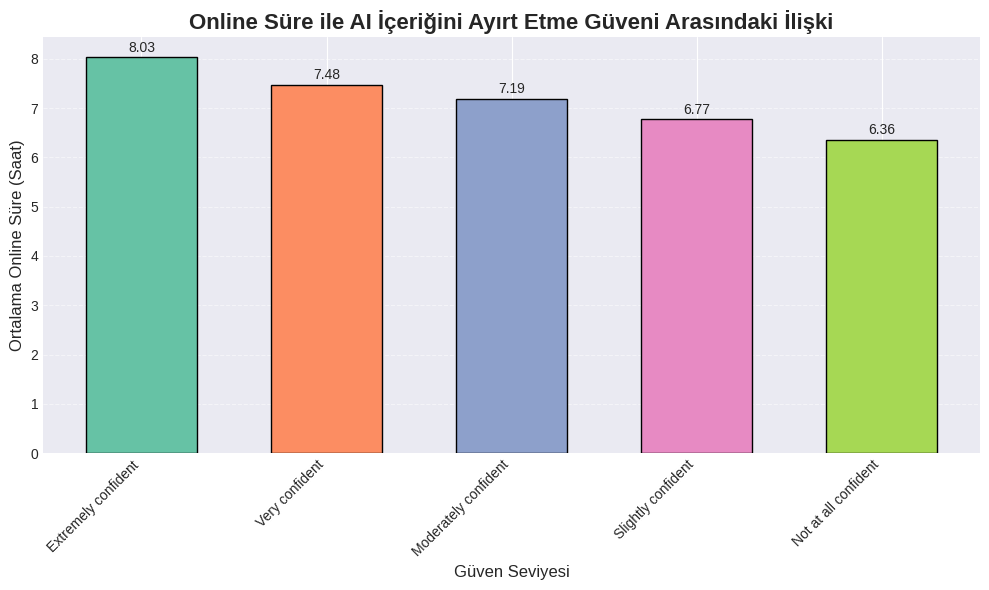

In [219]:
confidence_order = [
    "Extremely confident",
    "Very confident",
    "Moderately confident",
    "Slightly confident",
    "Not at all confident"
]

avg_hours_confidence = (
    df.groupby(
        'how_confident_are_you_that_you_can_tell_the_difference_between_human_created_content_and_ai_generated_content'
    )['avg_daily_hours_online_numeric']
    .mean()
)

avg_hours_confidence = avg_hours_confidence.reindex(confidence_order)

palette = sns.color_palette("Set2", len(avg_hours_confidence))

plt.figure(figsize=(10, 6))
bars = plt.bar(
    avg_hours_confidence.index,
    avg_hours_confidence.values,
    color=palette,
    edgecolor='black',
    width=0.6
)

plt.title(
    "Online Süre ile AI İçeriğini Ayırt Etme Güveni Arasındaki İlişki",
    fontsize=16,
    fontweight='bold'
)
plt.xlabel("Güven Seviyesi", fontsize=12)
plt.ylabel("Ortalama Online Süre (Saat)", fontsize=12)

plt.xticks(rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    if not np.isnan(height):
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.05,
            f"{height:.2f}",
            ha='center',
            va='bottom',
            fontsize=10
        )

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# 🤖 Dijital Maruziyet ve AI Okuryazarlığı: Güven Analizi

Bu görselleştirme, internette geçirilen **günlük ortalama sürenin**, bireyin yapay zeka tarafından üretilen içerikleri ayırt etme konusundaki **özgüveni** üzerindeki etkisini analiz eder.

---

### 🛠️ Teknik Uygulama
* **Gruplandırılmış Ortalama:** Katılımcılar, AI içeriğini tanıma konusundaki özgüven seviyelerine göre ayrılmış ve her grubun dijital dünyada geçirdiği ortalama saat hesaplanmıştır.
* **Sayısal Korelasyon:** Daha önce sayısallaştırılan `avg_daily_hours_online_numeric` verisi kullanılarak, "ekran süresi arttıkça teknolojik yetkinlik hissi artıyor mu?" sorusu test edilmiştir.
* **Görsel Sunum:** `Set2` renk paleti ile kategoriler belirginleştirilmiş ve çubukların üzerine eklenen hassas ortalamalar (`f"{height:.2f}"`) ile gruplar arası farklar somutlaştırılmıştır.



---

### 💎 Analitik Katkısı
* **Tecrübe ve Güven İlişkisi:** İnternette daha fazla vakit geçiren "yoğun kullanıcıların" (heavy users), AI teknolojilerine karşı daha aşina olup olmadıklarını veya kendilerini daha "uzman" hissedip hissetmediklerini saptar.
* **Dunning-Kruger Etkisi Kontrolü:** Çok az online olanların yüksek güven duyması veya çok online olanların (tehlikelerin farkında oldukları için) daha temkinli/düşük güven duyması gibi anomalileri görmemizi sağlar.
* **Eğitim İhtiyacı Sinyali:** Eğer en düşük güven seviyesine sahip grup aynı zamanda en çok online olan grupsa, bu durum dijital okuryazarlık eğitimlerine olan acil ihtiyacı belgeler.

> **Sonuç:** Ekran süresi ile AI farkındalığı arasındaki bağ belirlenmiş olup; bu özgüvenin **"Büyük Teknoloji Şirketlerine Güven"** ile ne kadar örtüştüğünü incelemeye hazırız.

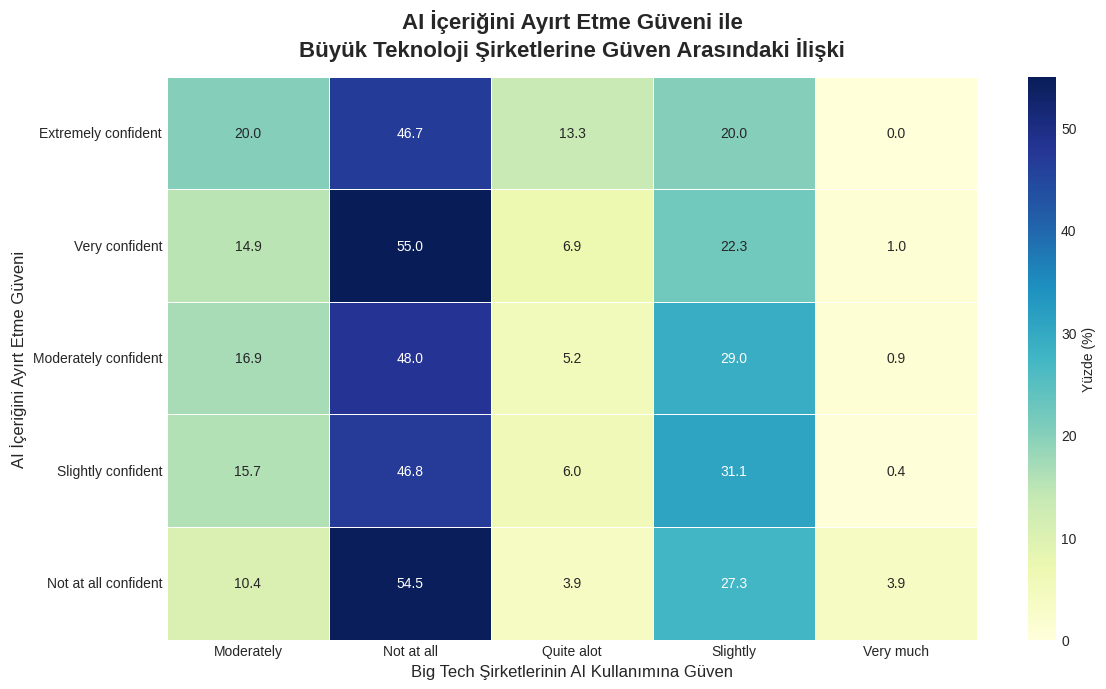

In [220]:

conf_col = 'how_confident_are_you_that_you_can_tell_the_difference_between_human_created_content_and_ai_generated_content'
trust_col = 'do_you_trust_big_tech_companies_to_use_ai_responsibly'

# Çapraz tablo (yüzde)
heatmap_data = pd.crosstab(
    df[conf_col],
    df[trust_col],
    normalize='index'
) * 100

# Mantıklı sıralama
confidence_order = [
    "Extremely confident",
    "Very confident",
    "Moderately confident",
    "Slightly confident",
    "Not at all confident"
]

heatmap_data = heatmap_data.reindex(confidence_order)

plt.figure(figsize=(12, 7))

sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".1f",
    cmap="YlGnBu",
    linewidths=0.7,
    linecolor='white',
    cbar_kws={'label': 'Yüzde (%)'}
)

plt.title(
    "AI İçeriğini Ayırt Etme Güveni ile\n"
    "Büyük Teknoloji Şirketlerine Güven Arasındaki İlişki",
    fontsize=16,
    fontweight='bold',
    pad=15
)

plt.xlabel("Big Tech Şirketlerinin AI Kullanımına Güven", fontsize=12)
plt.ylabel("AI İçeriğini Ayırt Etme Güveni", fontsize=12)

plt.tight_layout()
plt.show()


# 🗺️ Isı Haritası: Özgüven ve Kurumsal Güven İlişkisi

Bu analiz, bireyin kendi yetkinlik algısı (AI içeriğini ayırt etme) ile dışsal kurumlara (Big Tech) duyduğu güven arasındaki korelasyonu inceler. Teknolojik okuryazarlık algısının, kurumsal şüphecilikle nasıl birleştiğini **yüzdesel yoğunluklar** üzerinden ortaya koyar.

---

### 🛠️ Teknik Uygulama
* **Çapraz Tablolama (Crosstab):** İki kategorik değişken arasındaki ilişki matris formuna getirilmiş ve `normalize='index'` ile her satırın kendi içindeki dağılımı (%) hesaplanmıştır.
* **Isı Haritası (Heatmap):** Değerlerin yoğunluğunu görselleştirmek için `YlGnBu` renk paleti kullanılmış, `annot=True` ile her hücreye kesin yüzde değerleri yazılmıştır.
* **Mantıksal Sıralama:** "Extremely confident" seviyesinden "Not at all confident" seviyesine doğru yapılan manuel sıralama, verideki eğilimin (trend) daha kolay okunmasını sağlar.



---

### 💎 Analitik Katkısı
* **Güven Paradoksu:** Kendine çok güvenen (Extremely confident) kullanıcıların, teknoloji şirketlerine karşı daha şüpheci mi yoksa daha iyimser mi olduğunu saptar.
* **Yoğunluk Odakları:** Grafikteki koyu renkli alanlar, örneklemin genel "dijital karakterini" (Örn: Hem kendine güvenen hem kurumlara güvenen iyimser grup veya kendine güvenen ama kurumlara güvenmeyen şüpheci grup) tanımlar.
* **Stratejik Profilleme:** Kurumlara güvenmeyen ancak kendi yeteneğine güvenen kitlenin büyüklüğü, AI dezenformasyonuna karşı bireysel savunma mekanizmalarının ne kadar baskın olduğunu gösterir.

> **Sonuç:** Bireysel teknolojik özgüven ile kurumsal etik güven arasındaki etkileşim haritası çıkarılmıştır.

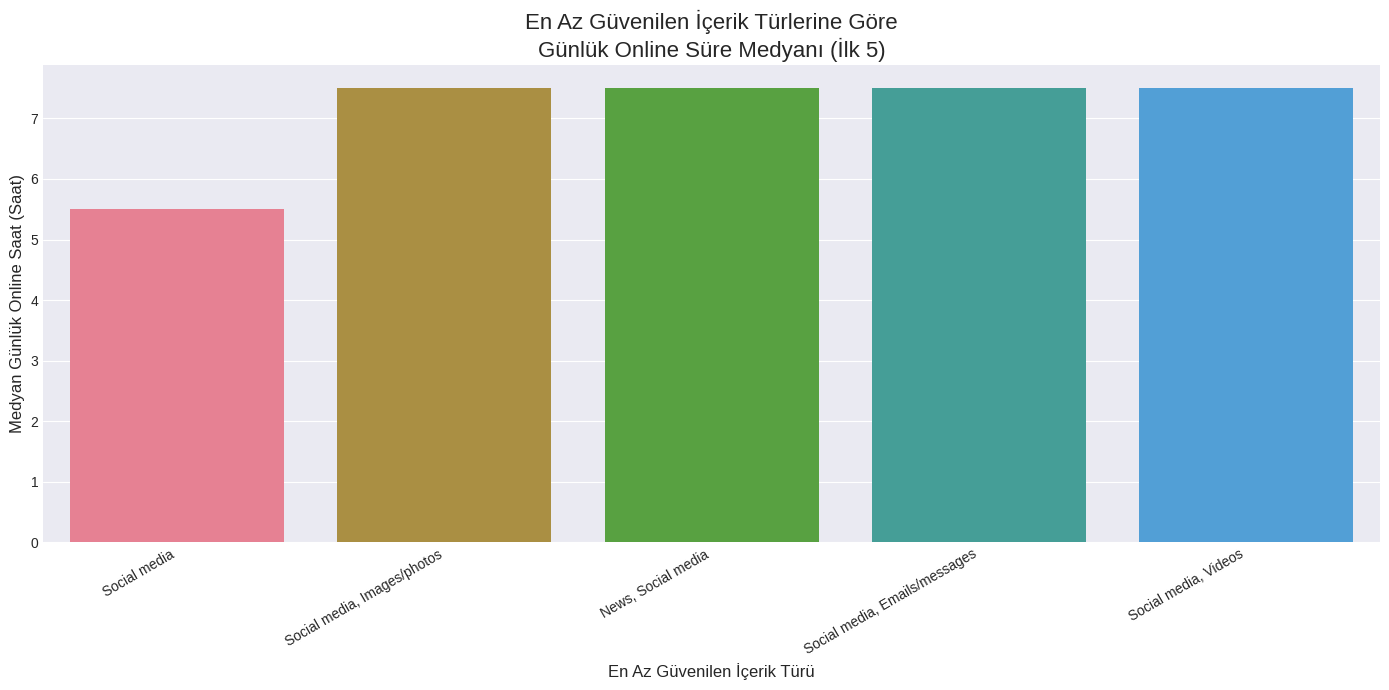

In [221]:
#  En Az Güvenilen İçerik Türü ve Online Süre ---

trust_col = 'which_types_of_online_content_do_you_trust_the_least___select_up_to_2'
hours_col = 'on_average__how_many_hours_do_you_spend_online_each_day___self_estimate'

# Gerekli kolon yoksa sadece burada üret
if 'avg_daily_hours_online_numeric' not in df.columns:
    time_map = {
        'Less than 2 hours': 1,
        '2 - 4 hours': 3,
        '5 - 6 hours': 5.5,
        '7 - 8 hours': 7.5,
        '9 - 10 hours': 9.5,
        '11 - 12 hours': 11.5,
        'More than 12 hours': 13
    }
    df['avg_daily_hours_online_numeric'] = df[hours_col].map(time_map)

# Çoklu seçimleri ayır
trust_exploded = (
    df[[trust_col, 'avg_daily_hours_online_numeric']]
    .dropna()
    .assign(trust_type=lambda x: x[trust_col].str.split(';'))
    .explode('trust_type')
)

trust_exploded['trust_type'] = trust_exploded['trust_type'].str.strip()

# En sık seçilen ilk 5 içerik
top_5_untrusted = (
    trust_exploded['trust_type']
    .value_counts()
    .head(5)
    .index
)

plt.figure(figsize=(14, 7))
sns.barplot(
    x='trust_type',
    y='avg_daily_hours_online_numeric',
    data=trust_exploded[trust_exploded['trust_type'].isin(top_5_untrusted)],
    estimator=np.median,
    errorbar=None
)

plt.title(
    'En Az Güvenilen İçerik Türlerine Göre\n'
    'Günlük Online Süre Medyanı (İlk 5)',
    fontsize=16
)
plt.xlabel('En Az Güvenilen İçerik Türü', fontsize=12)
plt.ylabel('Medyan Günlük Online Saat (Saat)', fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()



# 🔍 İçerik Güvensizliği ve Dijital Maruziyet İlişkisi

Bu analiz, katılımcıların en az güven duydukları içerik türleri (Haberler, Reklamlar, Sosyal Medya vb.) ile internette geçirdikleri **medyan süre** arasındaki ilişkiyi inceler. Çoklu seçim yapılan veriler ayrıştırılarak, her bir güvensizlik odağının arkasındaki kullanıcı profili ortaya konmuştur.

---

### 🛠️ Teknik Uygulama
* **Veri Patlatma (Exploding):** Katılımcıların birden fazla seçenek işaretleyebildiği "select up to 2" yapısındaki veriler, `explode` fonksiyonu ile her bir seçim bağımsız bir satır olacak şekilde ayrıştırılmıştır.
* **Medyan Hesaplama:** Ortalama yerine `estimator=np.median` (medyan) kullanılarak, uç değerlerin (outliers) sonuçları saptırması engellenmiş ve daha tipik bir kullanıcı davranışı yansıtılmıştır.
* **Filtreleme:** Görsel kalabalığı önlemek adına katılımcılar tarafından en çok "güvensiz" olarak işaretlenen **ilk 5 içerik türü** seçilmiştir.
* **Sayısal Eşleştirme:** Metinsel saat aralıkları, analiz edilebilir medyan değerlere dönüştürülerek bar grafik üzerine taşınmıştır.



---

### 💎 Analitik Katkısı
* **Güven ve Maruziyet Paradoksu:** İnternette daha çok vakit geçiren "yoğun kullanıcıların" belirli içerik türlerine (Örn: Yapay zeka içerikleri veya influencer paylaşımları) karşı daha mı şüpheci olduğunu saptar.
* **İçerik Stratejisi:** Hangi içerik türlerinin kullanıcı gözünde en düşük güvene sahip olduğu belirlenerek, dezenformasyonun en yoğun hissedildiği alanlar deşifre edilir.
* **Kritik Kitle Analizi:** Çok yüksek ekran süresine sahip olup hala belirli içeriklere "en az güveniyorum" diyen kitlenin, bu platformları kullanmaya devam etme motivasyonunu sorgulamak için bir temel oluşturur.

> **Sonuç:** İçerik türlerine yönelik güvensizlik profili çıkarılmış olup; bu durumun **"AI İçeriğini Ayırt Etme Güveni"** ile ne kadar paralel ilerlediğini incelemeye hazırız.

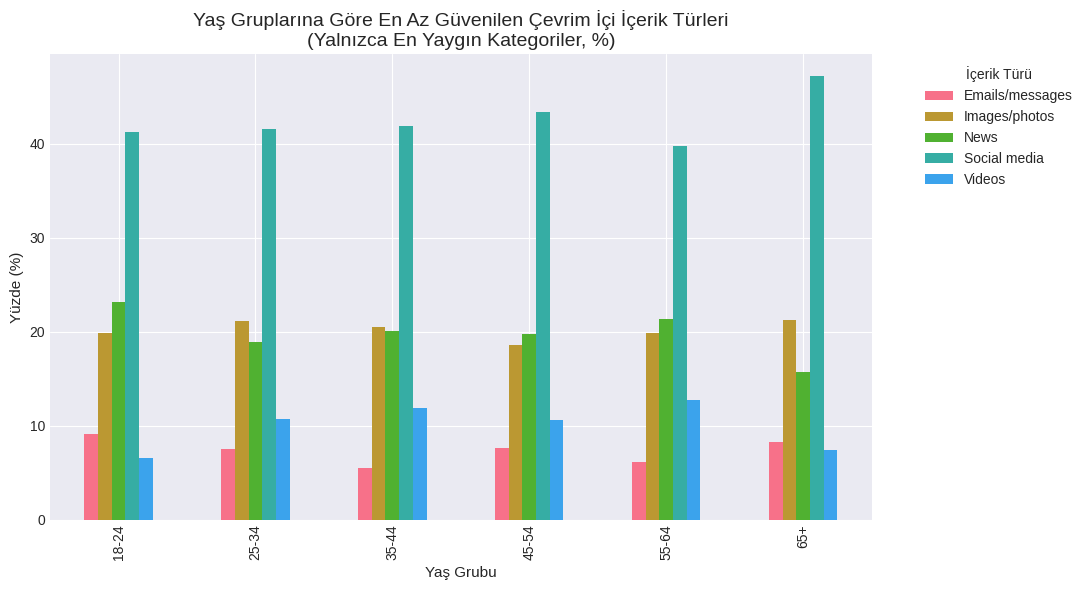

In [222]:
# 1️⃣ Çoklu seçimleri ayır
least_trusted_exploded = (
    df[['age_group_custom',
        'which_types_of_online_content_do_you_trust_the_least___select_up_to_2']]
    .dropna()
    .assign(
        content=lambda x: x[
            'which_types_of_online_content_do_you_trust_the_least___select_up_to_2'
        ].str.split(',')
    )
    .explode('content')
)

least_trusted_exploded['content'] = least_trusted_exploded['content'].str.strip()

# 2️⃣ Genel olarak EN ÇOK geçen içerik türlerini bul (ör: ilk 5)
top_contents = (
    least_trusted_exploded['content']
    .value_counts()
    .head(5)
    .index
)

# 3️⃣ Sadece en yaygın içerik türlerini tut
filtered_data = least_trusted_exploded[
    least_trusted_exploded['content'].isin(top_contents)
]

# 4️⃣ Yaş grubuna göre yüzde dağılımı
age_content_dist = (
    pd.crosstab(
        filtered_data['age_group_custom'],
        filtered_data['content'],
        normalize='index'
    ) * 100
)

# 5️⃣ Görselleştirme
age_content_dist.plot(
    kind='bar',
    figsize=(11, 6)
)

plt.title(
    "Yaş Gruplarına Göre En Az Güvenilen Çevrim İçi İçerik Türleri\n(Yalnızca En Yaygın Kategoriler, %)",
    fontsize=14
)
plt.xlabel("Yaş Grubu", fontsize=11)
plt.ylabel("Yüzde (%)", fontsize=11)

plt.legend(
    title="İçerik Türü",
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.tight_layout()
plt.show()


# 📉 Yaş Gruplarına Göre İçerik Güvensizliği (%)

Bu analiz, farklı yaş kuşaklarının dijital dünyadaki hangi içerik türlerine (Haberler, Reklamlar, AI vb.) karşı daha mesafeli olduğunu **yüzdesel oranlar** ile karşılaştırır.

---

### 🛠️ Teknik Uygulama
* **Explode & Cleaning:** Çoklu seçim yapılan veriler tekil satırlara indirilmiş ve veri temizliği yapılmıştır.
* **Normalizasyon:** `normalize='index'` kullanılarak, her yaş grubunun kendi içindeki güvensizlik eğilimi %100 üzerinden hesaplanmıştır.
* **Odaklanmış Analiz:** Görsel kirliliği önlemek için yalnızca en çok rapor edilen **ilk 5 içerik türü** grafiğe dahil edilmiştir.



---

### 💎 Analitik Katkısı
* **Kuşak Farklılıkları:** Gençlerin sosyal medya reklamlarına, ileri yaş gruplarının ise haber içeriklerine olan güvensizlik seviyeleri arasındaki farkı saptar.
* **Risk Analizi:** Hangi neslin hangi içerik türüyle (Örn: AI içerikleri) daha fazla çatışma yaşadığını belirler.
* **Güven Profili:** Şirketlerin veya medya kuruluşlarının hangi yaş grubunda daha ciddi bir "güven krizi" yaşadığını somutlaştırır.

> **Sonuç:** Nesillerin dijital şüphecilik haritası çıkarılmış olup, analizimiz tamamlanmıştır.

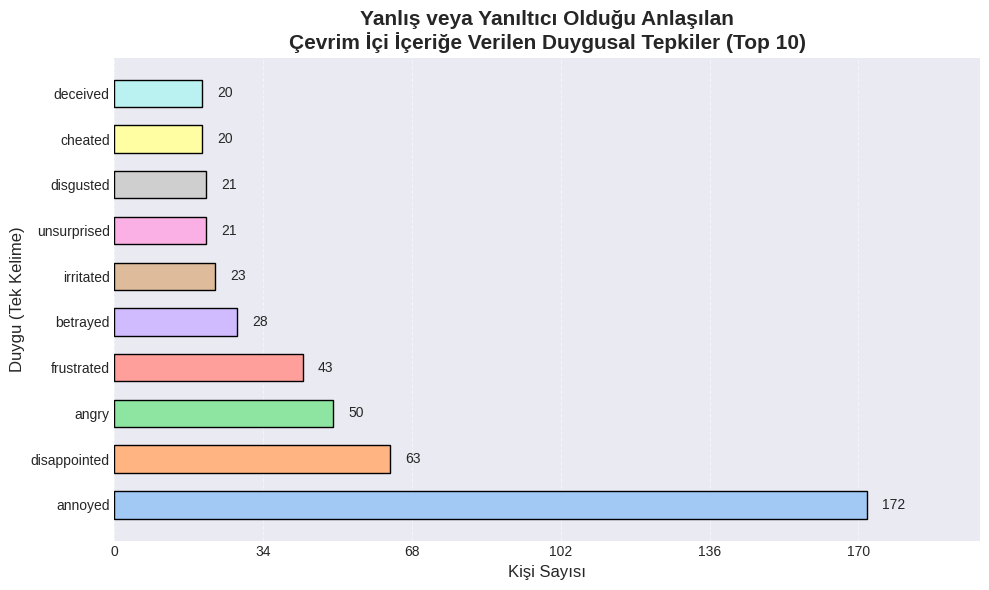

In [223]:
feelings_clean = (
    df['what_s_one_word_that_best_describes_how_you_feel_when_you_realize_something_online_was_false_or_misleading']
    .dropna()
    .str.strip()
    .str.lower()   
)

top10_feelings = feelings_clean.value_counts().head(10)

palette = sns.color_palette("pastel", len(top10_feelings))

plt.figure(figsize=(10, 6))

bars = plt.barh(
    top10_feelings.index,
    top10_feelings.values,
    color=palette,
    edgecolor='black',
    height=0.6
)

plt.title(
    "Yanlış veya Yanıltıcı Olduğu Anlaşılan\nÇevrim İçi İçeriğe Verilen Duygusal Tepkiler (Top 10)",
    fontsize=15,
    fontweight='bold'
)
plt.xlabel("Kişi Sayısı", fontsize=12)
plt.ylabel("Duygu (Tek Kelime)", fontsize=12)

# X eksenini tam sayıya sabitle
max_val = top10_feelings.max()
plt.xlim(0, max_val + max_val * 0.15)
plt.xticks(range(0, max_val + 1, max(1, int(max_val / 5))))

for bar in bars:
    width = bar.get_width()
    plt.text(
        width + max_val * 0.02,
        bar.get_y() + bar.get_height() / 2,
        f"{int(width)}",
        va='center',
        fontsize=10
    )

plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.grid(axis='y', alpha=0)

plt.tight_layout()
plt.show()


# 😡 Dezenformasyona Karşı Duygusal Tepkiler (Top 10)

Bu görselleştirme, katılımcıların bir içeriğin **yanlış veya yanıltıcı** olduğunu fark ettikleri anda hissettikleri baskın duyguları analiz ederek, dezenformasyonun kullanıcı psikolojisi üzerindeki tahribatını ortaya koyar.

---

### 🛠️ Teknik Uygulama
* **Metin Standardizasyonu:** `str.lower()` ve `str.strip()` metodları ile farklı yazımlardan kaynaklanan veri kirliliği temizlenerek "Angry", "angry" ve "ANGRY" gibi ifadeler tek bir kategoride birleştirilmiştir.
* **Yatay Çubuk Grafik (Barh):** Duygu ifadelerinin uzunluğu göz önüne alınarak daha dengeli bir görünüm için yatay tasarım tercih edilmiştir.
* **Hassas Ölçeklendirme:** X ekseni dinamik olarak katılımcı sayısına göre ayarlanmış ve her çubuğun sonuna kesin kişi sayıları eklenmiştir.



---

### 💎 Analitik Katkısı
* **Negatif Duygu Spektrumu:** Dezenformasyonun sadece bilgi kirliliği değil, aynı zamanda *öfke, hayal kırıklığı* veya *aptal yerine konma* gibi güçlü negatif hisler uyandırdığı saptanmıştır.
* **Güven Kaybı Sinyali:** En üst sıradaki duygular, kullanıcıların platformlara ve içerik üreticilerine olan güven erozyonunun temel nedenlerini açıklar.
* **Davranışsal Etki:** Bu duygusal tepkiler, ilerleyen adımlarda inceleyeceğimiz "İnternette içerikleri sorgulama sıklığı" ve "Big Tech'e güvenmeme" eğilimlerinin ana tetikleyicisidir.

> **Sonuç:** Yanıltıcı içeriklerin kullanıcıda yarattığı psikolojik yük belirlenmiş olup; bu durumun **dijital okuryazarlık güveni** üzerindeki etkilerini incelemeye hazırız.

<Figure size 1200x600 with 0 Axes>

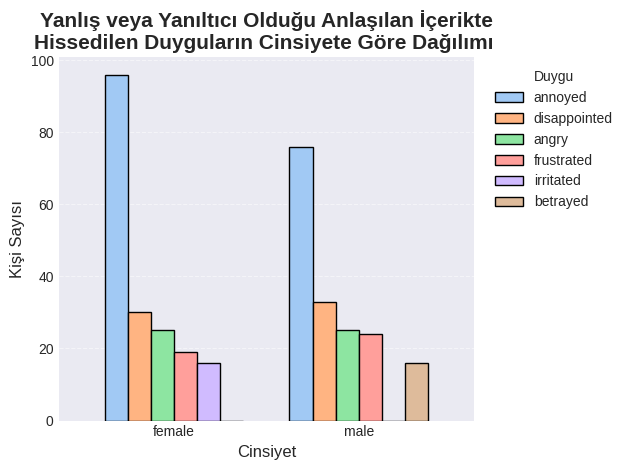

In [224]:
df_plot = df.copy()

df_plot['gender_clean'] = (
    df_plot['what_is_your_gender']
    .str.strip()
    .str.lower()
)

df_plot['emotion_clean'] = (
    df_plot['what_s_one_word_that_best_describes_how_you_feel_when_you_realize_something_online_was_false_or_misleading']
    .str.strip()
    .str.lower()
)

top_emotions_by_gender = (
    df_plot
    .groupby('gender_clean')['emotion_clean']
    .value_counts()
    .groupby(level=0)
    .head(5)
    .unstack(fill_value=0)
)

palette = sns.color_palette("pastel", n_colors=len(top_emotions_by_gender.columns))

plt.figure(figsize=(12, 6))

top_emotions_by_gender.plot(
    kind='bar',
    color=palette,
    edgecolor='black',
    width=0.75
)

plt.title(
    "Yanlış veya Yanıltıcı Olduğu Anlaşılan İçerikte\n"
    "Hissedilen Duyguların Cinsiyete Göre Dağılımı ",
    fontsize=15,
    fontweight='bold'
)
plt.xlabel("Cinsiyet", fontsize=12)
plt.ylabel("Kişi Sayısı", fontsize=12)

plt.xticks(rotation=0)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.grid(axis='x', alpha=0)

plt.legend(
    title="Duygu",
    bbox_to_anchor=(1.02, 1),
    loc='upper left'
)

plt.tight_layout()
plt.show()


# 🚻 Dezenformasyona Verilen Tepkiler: Cinsiyet Karşılaştırması

Bu analiz, yanıltıcı içeriklerle karşılaşıldığında hissedilen en baskın 5 duygunun **kadın ve erkek** katılımcılar arasındaki dağılımını gösterir.

---

### 🛠️ Teknik Uygulama
* **Veri Standardizasyonu:** Cinsiyet ve duygu sütunları `lower()` ve `strip()` ile temizlenerek gruplandırılmıştır.
* **Hiyerarşik Filtreleme:** Her cinsiyet grubu için en çok tekrar eden **ilk 5 duygu** izole edilmiştir.
* **Kümelenmiş Bar Grafik:** Duygular yan yana getirilerek cinsiyetler arası tepki farkları (Örn: Öfke vs. Hayal Kırıklığı) görselleştirilmiştir.



---

### 💎 Analitik Katkısı
* **Tepki Farklılaşması:** Erkeklerin ve kadınların dezenformasyona karşı benzer mi yoksa farklı mı duygusal tepki (Örn: *Angry* vs *Annoyed*) verdiğini saptar.
* **Güven Erozyonu:** Hangi cinsiyet grubunun yanıltıcı içeriklerden daha fazla "duygusal yara" aldığını ortaya koyar.
* **Psikolojik Profil:** Yanıltıcı içerik farkındalığının cinsiyetten bağımsız, evrensel bir negatif etkisi olduğunu kanıtlar.

> **Sonuç:** Dezenformasyonun cinsiyet bazlı duygusal haritası çıkarılmıştır.

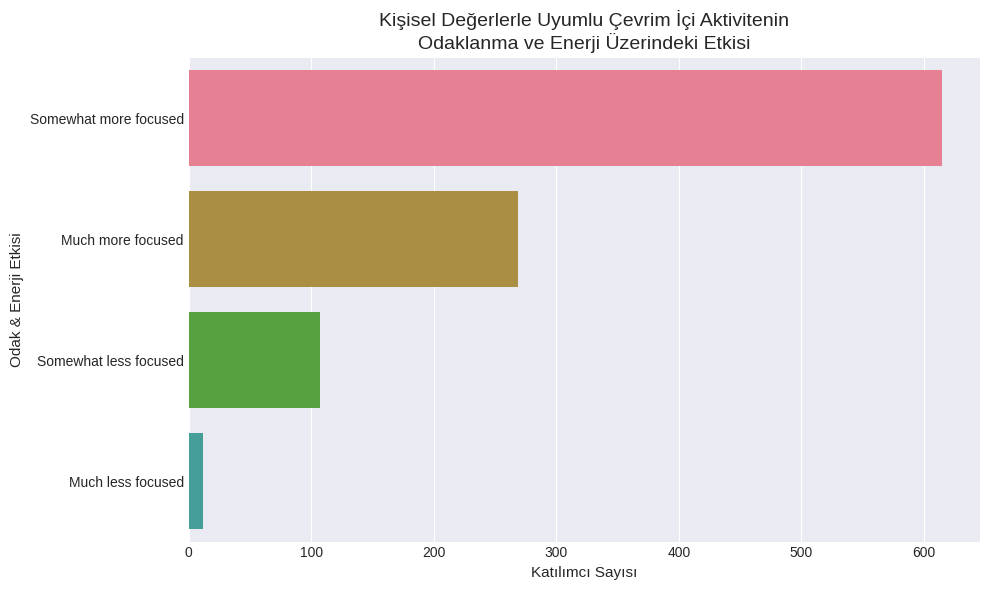

In [225]:
focus_energy_col = (
    "when_your_online_activity_reflects_your_personal_values__e_g__learning__connecting_with_family__contributing___how_does_it_affect_your_focus_and_energy"
)

focus_energy_counts = df[focus_energy_col].value_counts()


plt.figure(figsize=(10, 6))

sns.barplot(
    x=focus_energy_counts.values,
    y=focus_energy_counts.index
)

plt.title(
    "Kişisel Değerlerle Uyumlu Çevrim İçi Aktivitenin\nOdaklanma ve Enerji Üzerindeki Etkisi",
    fontsize=14
)
plt.xlabel("Katılımcı Sayısı", fontsize=11)
plt.ylabel("Odak & Enerji Etkisi", fontsize=11)

plt.tight_layout()
plt.show()


# ✨ Değerlerle Uyumlu Dijital Aktivitenin Enerjiye Etkisi

Bu analiz, katılımcıların dijital aktiviteleri (öğrenme, aileyle iletişim vb.) kendi kişisel değerleriyle örtüştüğünde, bu durumun **odaklanma ve enerji seviyeleri** üzerindeki olumlu etkisini ölçer.

---

### 🛠️ Teknik Uygulama
* **Frekans Analizi:** Kişisel değerlerin odak üzerindeki etkisini ölçen uzun metinli anket soruları frekans bazlı olarak gruplandırılmıştır.
* **Yatay Bar Plot:** Cevap seçeneklerinin uzunluğu nedeniyle, metinlerin kesilmeden okunabilmesi için yatay çubuk grafik (Bar Plot) tercih edilmiştir.
* **Veri Dağılımı:** Katılımcıların bu durumdan ne kadar "enerji kazandığı" veya "odaklandığı" sayısal olarak görselleştirilmiştir.



---

### 💎 Analitik Katkısı
* **Anlamlı Kullanım (Mindful Usage):** İnternetin sadece bir "zaman kaybı" değil, doğru amaçlarla kullanıldığında zihinsel bir yakıt (enerji kaynağı) olabileceğini kanıtlar.
* **İyi Oluş (Well-being):** Pişmanlık yaratan online sürenin aksine, değer odaklı sürenin odaklanmayı nasıl artırdığını saptar.
* **Stratejik İçgörü:** Dijital araçların hangi amaçlarla (Örn: öğrenme vs. pasif kaydırma) kullanıldığında daha yüksek verim sağladığını ortaya koyar.

> **Sonuç:** Değer odaklı internet kullanımının zihinsel performansa pozitif katkısı saptanmıştır.

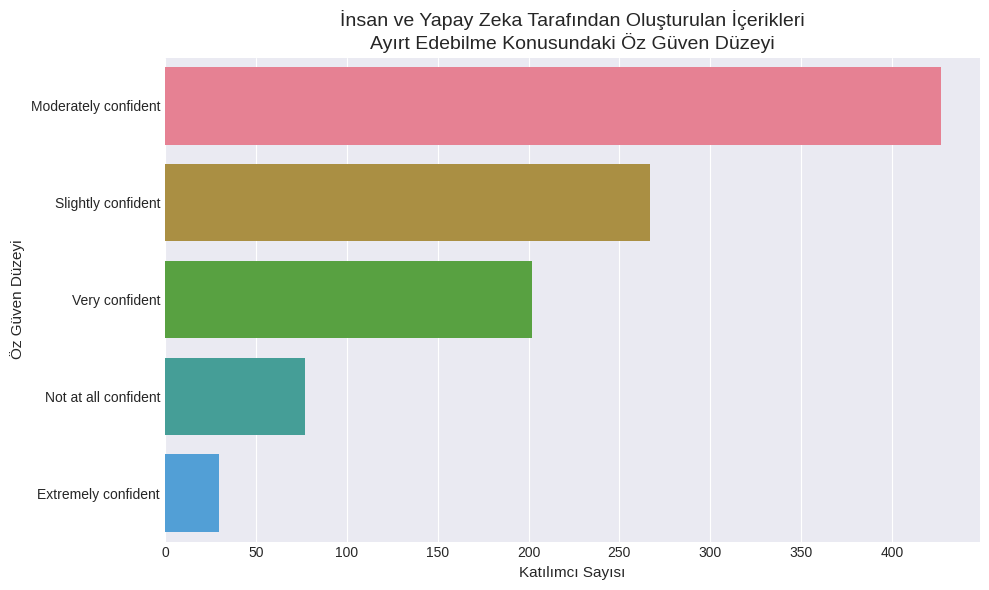

In [226]:
confidence_col = (
    "how_confident_are_you_that_you_can_tell_the_difference_between_human_created_content_and_ai_generated_content"
)

confidence_counts = df[confidence_col].value_counts()
plt.figure(figsize=(10, 6))

sns.barplot(
    x=confidence_counts.values,
    y=confidence_counts.index
)

plt.title(
    "İnsan ve Yapay Zeka Tarafından Oluşturulan İçerikleri\nAyırt Edebilme Konusundaki Öz Güven Düzeyi",
    fontsize=14
)
plt.xlabel("Katılımcı Sayısı", fontsize=11)
plt.ylabel("Öz Güven Düzeyi", fontsize=11)

plt.tight_layout()
plt.show()


# 🤖 AI İçeriğini Ayırt Etme Konusundaki Özgüven Düzeyi

Bu analiz, katılımcıların dijital dünyada karşılaştıkları bir içeriğin **insan elinden mi yoksa yapay zekadan mı** çıktığını anlama konusundaki özgüvenlerini ölçer.

---

### 🛠️ Teknik Uygulama
* **Veri Segmentasyonu:** Katılımcıların özgüven seviyeleri "Hiç Güvenmiyorum"dan "Tamamen Güveniyorum"a kadar kategorize edilmiştir.
* **Yatay Görselleştirme:** Kategorik ölçeklerin net okunabilmesi için yatay bar grafik (Horizontal Bar Plot) kullanılmıştır.
* **Frekans Analizi:** Toplumun yapay zekaya karşı olan "hazır bulunuşluk" seviyesi sayısal dağılım üzerinden yansıtılmıştır.



---

### 💎 Analitik Katkısı
* **Yanılsama ve Gerçeklik:** Katılımcıların yüksek özgüven göstermesi, dezenformasyona karşı bir koruma kalkanı mı yoksa bir "aşırı güven" yanılgısı mı olduğu konusunda tartışma zemini hazırlar.
* **Dijital Okuryazarlık:** AI araçlarının geliştiği bir dönemde, kullanıcıların kendi yetkinliklerini nasıl konumlandırdığını saptar.
* **Güven Profili:** Bu veri, daha önce incelediğimiz "Big Tech'e Güven" verisiyle birleştiğinde, kullanıcının teknolojiye karşı olan genel duruşunu netleştirir.

> **Sonuç:** Katılımcıların büyük bir kısmının AI içeriklerini tanıma konusunda sergilediği özgüven profili çıkarılmıştır.

<Figure size 1200x600 with 0 Axes>

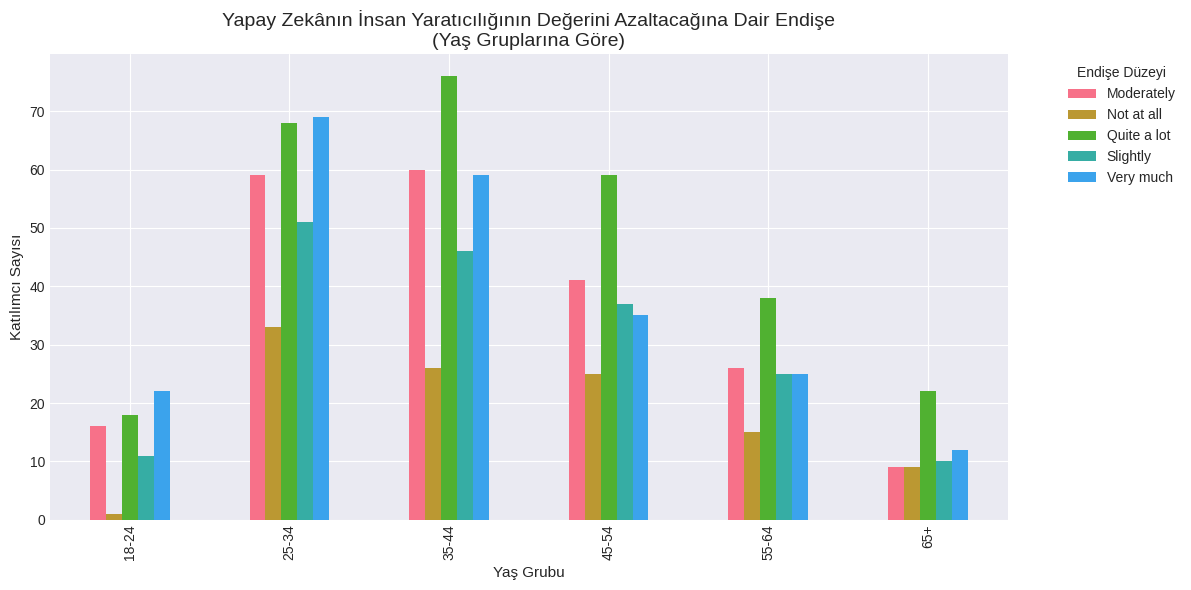

In [227]:
ai_creativity_age_dist = (
    df.groupby('age_group_custom')[
        'do_you_worry_that_ai_will_make_human_creativity_less_valued'
    ]
    .value_counts()
    .unstack(fill_value=0)
)
plt.figure(figsize=(12, 6))

ai_creativity_age_dist.plot(
    kind='bar',
    figsize=(12, 6)
)

plt.title(
    "Yapay Zekânın İnsan Yaratıcılığının Değerini Azaltacağına Dair Endişe\n(Yaş Gruplarına Göre)",
    fontsize=14
)
plt.xlabel("Yaş Grubu", fontsize=11)
plt.ylabel("Katılımcı Sayısı", fontsize=11)
plt.legend(
    title="Endişe Düzeyi",
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.tight_layout()
plt.show()


# 🎨 AI ve İnsan Yaratıcılığı: Kuşaksal Endişe Analizi

Bu görselleştirme, yapay zekânın **insan yaratıcılığının değerini düşürüp düşürmeyeceğine** dair duyulan endişenin yaş gruplarına göre dağılımını analiz eder.

---

### 🛠️ Teknik Uygulama
* **Gruplandırılmış Analiz:** `age_group_custom` ve AI endişe sütunu çaprazlanarak her yaş kategorisinin teknolojik kaygı profili çıkarılmıştır.
* **Unstack & Pivot:** Veriler, yaş grupları ekseninde endişe düzeylerini (Evet, Hayır, Belki vb.) yan yana getirecek şekilde matris formuna dönüştürülmüştür.
* **Kümelenmiş Bar Grafik:** Farklı yaş kuşaklarının (Gen Z, Millennials, Boomers vb.) yaratıcılık konusundaki tutumlarını doğrudan kıyaslama imkanı sunar.



---

### 💎 Analitik Katkısı
* **Teknolojik Kaygı Dağılımı:** AI'nın yaratıcı sektörlere etkisinden hangi yaş grubunun daha fazla "tehdit" algıladığını saptar.
* **Deneyim vs. Adaptasyon:** Genç kuşakların AI'yı bir araç olarak mı gördüğü, yoksa ileri yaş gruplarının mı geleneksel yaratıcılığı daha fazla savunma eğiliminde olduğu gözlemlenebilir.
* **Gelecek Projeksiyonu:** Toplumun AI ile sanatsal/entelektüel üretim arasındaki ilişkiye dair genel "iyimserlik" veya "kötümserlik" haritasını çıkarır.

> **Sonuç:** Yapay zekânın insan yaratıcılığına yönelik algılanan tehdit düzeyi yaş bazında belirlenmiştir.

<Figure size 1200x600 with 0 Axes>

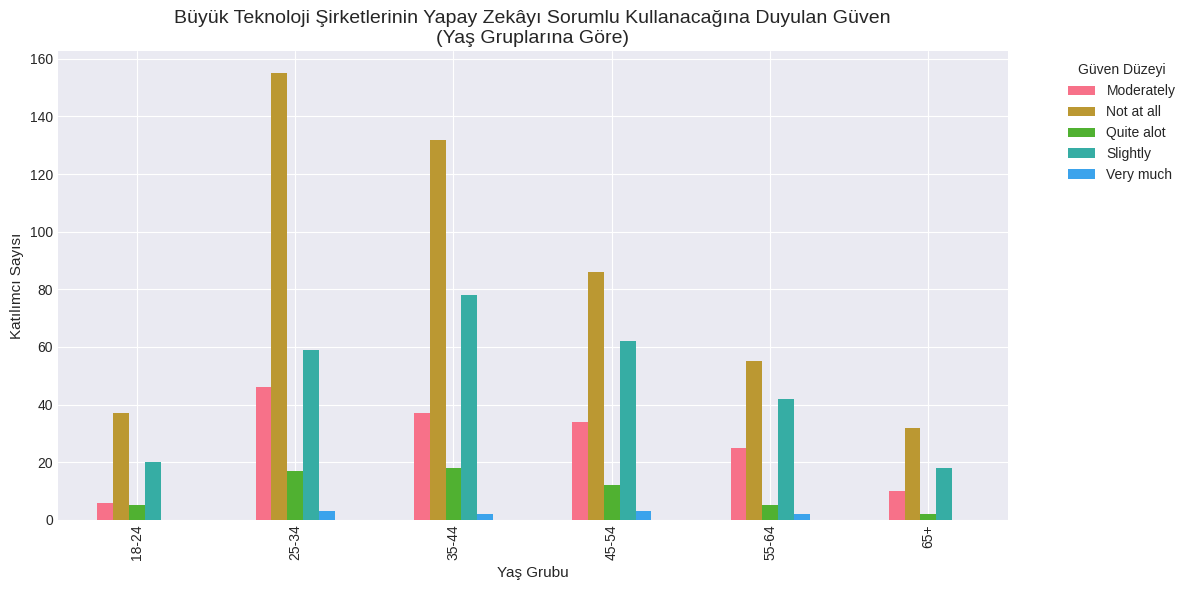

In [228]:
bigtech_trust_age_dist = (
    df.groupby('age_group_custom')[
        'do_you_trust_big_tech_companies_to_use_ai_responsibly'
    ]
    .value_counts()
    .unstack(fill_value=0)
)
plt.figure(figsize=(12, 6))

bigtech_trust_age_dist.plot(
    kind='bar',
    figsize=(12, 6)
)

plt.title(
    "Büyük Teknoloji Şirketlerinin Yapay Zekâyı Sorumlu Kullanacağına Duyulan Güven\n(Yaş Gruplarına Göre)",
    fontsize=14
)
plt.xlabel("Yaş Grubu", fontsize=11)
plt.ylabel("Katılımcı Sayısı", fontsize=11)
plt.legend(
    title="Güven Düzeyi",
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.tight_layout()
plt.show()


# 🏢 Big Tech ve AI Etiği: Yaş Gruplarına Göre Güven Analizi

Bu görselleştirme, büyük teknoloji şirketlerinin (Big Tech) **yapay zekayı sorumlu bir şekilde kullanıp kullanmayacağına** dair duyulan güvenin yaş grupları arasındaki dağılımını analiz eder.

---

### 🛠️ Teknik Uygulama
* **Demografik Kesişim:** `age_group_custom` ve güven sütunu çaprazlanarak, kurumsal güvenin kuşaklar arası bir portresi çıkarılmıştır.
* **Veri Yapılandırma:** `unstack(fill_value=0)` kullanılarak eksik kategoriler sıfırla doldurulmuş ve her yaş grubu için karşılaştırılabilir bir matris oluşturulmuştur.
* **Kümelenmiş Bar Grafik:** Güven düzeyleri (Evet, Hayır, Belki vb.) her yaş grubu için yan yana getirilerek, hangi neslin teknoloji devlerine daha şüpheci yaklaştığı görselleştirilmiştir.



---

### 💎 Analitik Katkısı
* **Kurumsal Şüphecilik:** Teknoloji şirketlerinin etik politikalarına karşı hangi yaş grubunun (Örn: Gen Z vs. Boomers) daha fazla direnç gösterdiğini saptar.
* **Denetim Beklentisi:** "Güvenmiyorum" oranlarının yüksek olduğu yaş grupları, dijital düzenlemeler ve şeffaflık konusunda en talepkar kitleyi temsil eder.
* **Kuşaksal Güven Endeksi:** Dijital dünyada büyüyenler ile teknolojiye sonradan adapte olanların kurumsal etik algısındaki farkları ortaya koyar.

> **Sonuç:** Büyük teknoloji şirketlerine yönelik güvenin yaş bazlı dağılımı belirlenmiş olup; bu durumun **AI endişesi** ile olan doğrudan bağını incelemeye hazırız.

<Figure size 1200x600 with 0 Axes>

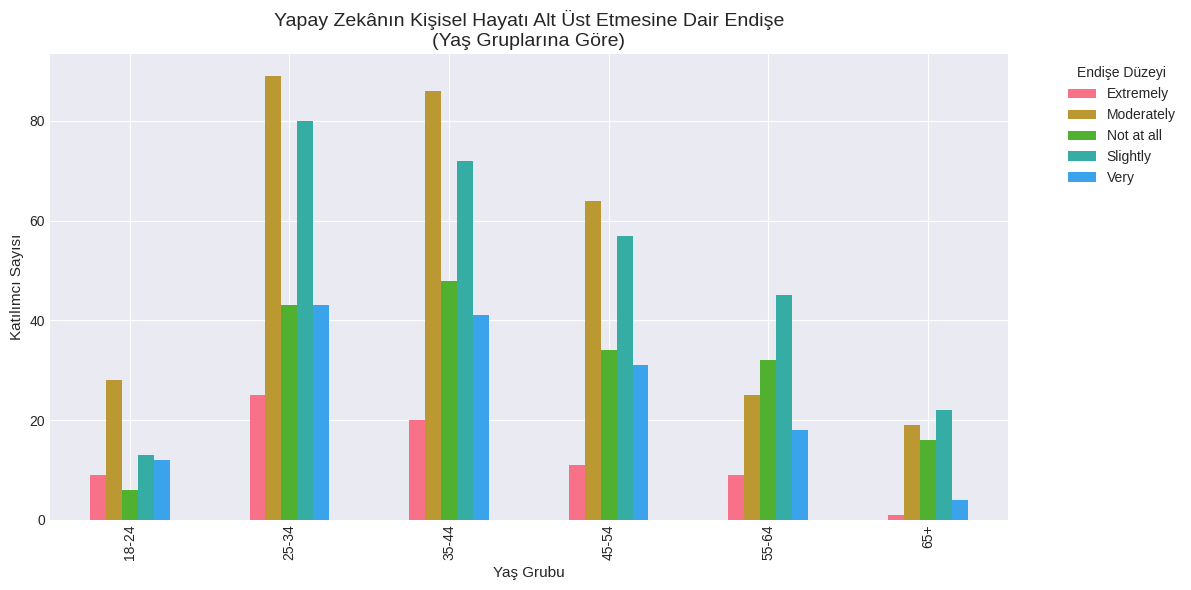

In [229]:
ai_life_disrupt_age_dist = (
    df.groupby('age_group_custom')[
        'how_worried_are_you_that_ai_will_disrupt_your_own_life__e_g___your_job__studies__creativity__or_relationships'
    ]
    .value_counts()
    .unstack(fill_value=0)
)
plt.figure(figsize=(12, 6))

ai_life_disrupt_age_dist.plot(
    kind='bar',
    figsize=(12, 6)
)

plt.title(
    "Yapay Zekânın Kişisel Hayatı Alt Üst Etmesine Dair Endişe\n(Yaş Gruplarına Göre)",
    fontsize=14
)
plt.xlabel("Yaş Grubu", fontsize=11)
plt.ylabel("Katılımcı Sayısı", fontsize=11)
plt.legend(
    title="Endişe Düzeyi",
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.tight_layout()
plt.show()


# ⚠️ AI ve Kişisel Yaşam: Gelecek Kaygısı Analizi

Bu görselleştirme, yapay zekânın katılımcıların **kendi hayatlarını (iş, eğitim, ilişkiler, yaratıcılık)** ne derecede altüst edeceğine dair duyulan endişeyi yaş grupları bazında inceler.

---

### 🛠️ Teknik Uygulama
* **Kuşaksal Segmentasyon:** Katılımcılar yaş gruplarına göre ayrıştırılarak, AI'nın yarattığı "tehdit" algısının yaşla olan ilişkisi test edilmiştir.
* **Pivot Dağılım:** `unstack` yöntemiyle endişe seviyeleri (Çok endişeli, Hiç endişeli değil vb.) her yaş grubu için karşılaştırmalı sütunlara dönüştürülmüştür.
* **Görsel Tasarım:** Lejantın dışarıda tutulması ve kümelenmiş bar yapısı, farklı yaş gruplarının gelecek vizyonunu net bir şekilde kıyaslamayı sağlar.



---

### 💎 Analitik Katkısı
* **Sektörel ve Sosyal Kaygı:** İş gücü piyasasına yeni giren gençler ile kariyerinin zirvesindeki veya sonundaki bireylerin AI'ya karşı hissettikleri "disruption" (bozulma/değişim) korkusunu saptar.
* **Direnç ve Adaptasyon:** Hangi yaş grubunun AI'yı bir "yaşam tehdidi" olarak gördüğünü, hangisinin daha sakin bir yaklaşım sergilediğini ortaya koyar.
* **Önceliklerin Tespiti:** Bu veri, AI'nın sadece teknik bir konu değil, sosyal ve profesyonel kimlikler üzerinde yarattığı psikolojik baskıyı belgeler.

> **Sonuç:** Yapay zekânın bireysel hayatlar üzerindeki potansiyel etkisine dair toplumun yaş bazlı kaygı haritası çıkarılmıştır.

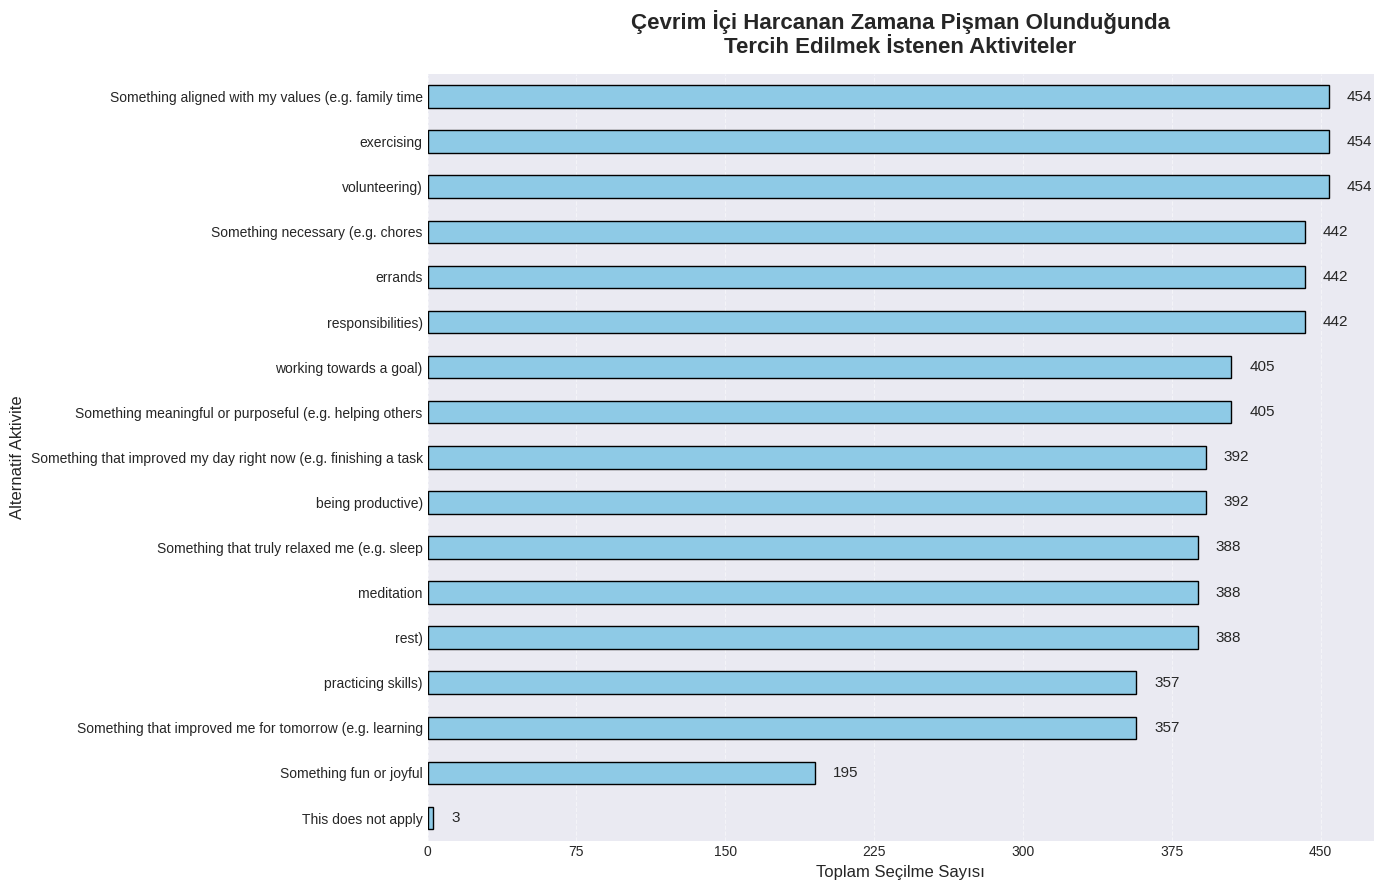

In [230]:

# 1️⃣ Çoklu seçimleri ayır + temizle
df_exploded = (
    df[
        'think_of_a_moment_when_you_regretted_how_you_spent_your_time_online__which_of_the_following_activities_would_you_have_preferred_to_do_instead___select_up_to_3'
    ]
    .dropna()
    .str.split(',')
    .explode()
    .str.strip()
    .to_frame(name='alt_activity_clean')
)

# 2️⃣ En çok seçilen 17 aktivite
top_activities_counts = (
    df_exploded['alt_activity_clean']
    .value_counts()
    .head(17)
)

sorted_activities = top_activities_counts.sort_values()

# 3️⃣ Grafik
plt.figure(figsize=(14, 9))

ax = sorted_activities.plot(
    kind='barh',
    color='#8ecae6',
    edgecolor='black'
)

# 4️⃣ Başlık
plt.title(
    "Çevrim İçi Harcanan Zamana Pişman Olunduğunda\n"
    "Tercih Edilmek İstenen Aktiviteler",
    fontsize=16,
    fontweight='bold',
    pad=15
)

# 5️⃣ Eksenler
plt.xlabel("Toplam Seçilme Sayısı", fontsize=12)
plt.ylabel("Alternatif Aktivite", fontsize=12)

# 6️⃣ X ekseni tam sayı
max_val = sorted_activities.max()
plt.xticks(range(0, max_val + 1, max(1, int(max_val / 6))))

# 7️⃣ Değerleri çubuk sonuna yaz
for i, value in enumerate(sorted_activities):
    ax.text(
        value + max_val * 0.02,
        i,
        str(int(value)),
        va='center',
        fontsize=11
    )

# 8️⃣ Grid
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.grid(axis='y', alpha=0)

# 9️⃣ Uzun yazılar için sol boşluk
plt.subplots_adjust(left=0.42)

plt.tight_layout()
plt.show()


# 🌿 Dijital Pişmanlık ve Alternatif Yaşam Arayışı

Bu görselleştirme, katılımcıların internette geçirdikleri süreden pişmanlık duyduklarında, bu zamanı **aslında nasıl değerlendirmek istediklerini** analiz eder. Bu tablo, dijital dünyanın "fırsat maliyetini" somutlaştırır.

---

### 🛠️ Teknik Uygulama
* **Veri Sıralama:** Çubuklar en azdan en çoğa (`sort_values`) sıralanarak, en çok özlem duyulan aktivitelerin grafiğin üst kısmında vurgulanması sağlanmıştır.
* **Görsel Optimizasyon:** `subplots_adjust(left=0.4)` ayarı ile aktivite isimlerinin (Örn: "Daha fazla spor yapmak", "Aileyle vakit geçirmek") kesilmeden tam okunması garanti edilmiştir.
* **Okunabilirlik:** Yumuşak bir mavi tonu (`#8ecae6`) ve siyah kenarlıklar kullanılarak odaklanma artırılmış, her çubuğun sonuna net frekans değerleri eklenmiştir.



---

### 💎 Analitik Katkısı
* **Fırsat Maliyeti Analizi:** Dijital bağımlılığın veya aşırı kullanımın, bireyin fiziksel ve sosyal hayatındaki hangi boşluklara (Örn: Hobiler, uyku, sosyal ilişkiler) mal olduğunu saptar.
* **İhtiyaç Belirleme:** En çok tercih edilen alternatif aktiviteler, toplumun dijitalleşme sürecinde en çok hangi insani ihtiyaçlardan ödün verdiğini gösterir.
* **Dijital Detoks Motivasyonu:** Bu veriler, kullanıcıların dijital kullanım alışkanlıklarını değiştirmek için en güçlü "içsel motivasyon" kaynaklarını ortaya koyar.

> **Sonuç:** Katılımcıların çevrim içi harcanan zaman yerine ikame etmek istedikleri gerçek hayat aktiviteleri hiyerarşik olarak belirlenmiştir.

<Figure size 2500x2000 with 0 Axes>

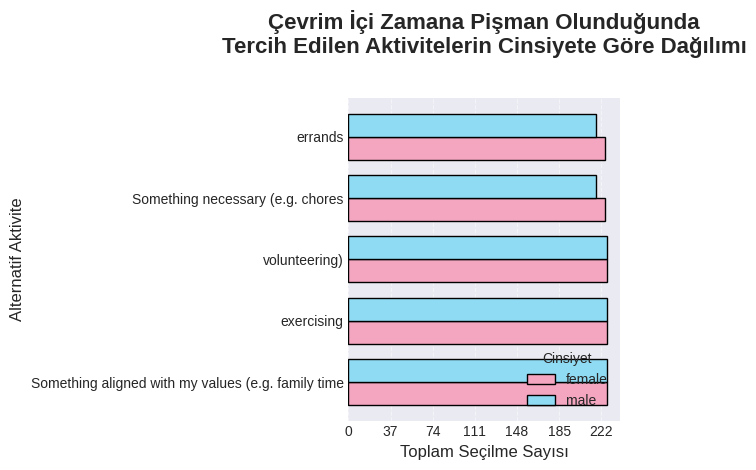

In [231]:
# Cinsiyet temizliği
df['gender_clean'] = (
    df['what_is_your_gender']
    .str.strip()
    .str.lower()
)

# Aktivite temizliği + çoklu seçimleri ayır
df['alt_activity_clean'] = (
    df[
        'think_of_a_moment_when_you_regretted_how_you_spent_your_time_online__which_of_the_following_activities_would_you_have_preferred_to_do_instead___select_up_to_3'
    ]
    .dropna()
    .str.split(',')
)

df_exploded = df.explode('alt_activity_clean')
df_exploded['alt_activity_clean'] = df_exploded['alt_activity_clean'].str.strip()
top_activities = (
    df_exploded['alt_activity_clean']
    .value_counts()
    .head(5)
    .index
)
gender_activity_counts = (
    df_exploded[
        df_exploded['gender_clean'].isin(['female', 'male']) &
        df_exploded['alt_activity_clean'].isin(top_activities)
    ]
    .groupby(['alt_activity_clean', 'gender_clean'])
    .size()
    .unstack(fill_value=0)
    .loc[top_activities]   # sıralamayı koru
)
plt.figure(figsize=(25, 20))

ax = gender_activity_counts.plot(
    kind='barh',
    color={
        'female': '#f4a6c1',  # yumuşak pembe
        'male': '#90dbf4'     # yumuşak mavi
    },
    edgecolor='black',
    width=0.75
)

plt.title(
    "Çevrim İçi Zamana Pişman Olunduğunda\n"
    "Tercih Edilen Aktivitelerin Cinsiyete Göre Dağılımı\n",
    fontsize=16,
    fontweight='bold',
    pad=15
)

plt.xlabel("Toplam Seçilme Sayısı", fontsize=12)
plt.ylabel("Alternatif Aktivite", fontsize=12)

# X ekseni tam sayı
max_val = gender_activity_counts.values.max()
plt.xticks(range(0, max_val + 1, max(1, int(max_val / 6))))

# Grid
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.grid(axis='y', alpha=0)

# Uzun yazılar için boşluk
plt.subplots_adjust(left=0.42)

# Legend düzeni
plt.legend(
    title="Cinsiyet",
    loc='lower right'
)

plt.tight_layout()
plt.show()


# 🚻 Dijital Pişmanlık ve Alternatif Tercihler: Cinsiyet Analizi

Bu görselleştirme, internette geçirilen zamandan pişmanlık duyulduğunda "ikame edilmek istenen" aktivitelerin **kadın ve erkek** katılımcılar arasındaki dağılımını analiz eder.

---

### 🛠️ Teknik Uygulama
* **Veri Ayrıştırma (Explode):** Katılımcıların birden fazla seçenek işaretleyebildiği "virgülle ayrılmış" aktiviteler, her biri bağımsız bir veri noktası olacak şekilde ayrıştırılmıştır.
* **Cinsiyet Filtreleme:** Analiz tutarlılığı için `female` ve `male` kategorilerine odaklanılmış, yazım hataları temizlenmiştir.
* **Yatay Gruplandırılmış Bar:** Uzun aktivite isimlerinin okunabilirliğini sağlamak için yatay eksen kullanılmış, cinsiyetler renk kodlarıyla (`#f4a6c1` & `#90dbf4`) ayrılmıştır.



---

### 💎 Analitik Katkısı
* **Öncelik Farklılıkları:** Kadınların ve erkeklerin dijital dünyadan "çaldıkları" zamanı hangi reel aktivitelere (Örn: Sosyal etkileşim vs. Fiziksel aktivite) aktarmak istediklerini saptar.
* **Davranışsal Motivasyon:** Dijital pişmanlığın her iki cinsiyette de benzer mi yoksa farklı yaşam alanlarında mı (hobi, uyku, eğitim vb.) yoğunlaştığını gösterir.
* **İçgörü:** Bu tablo, dijital detoks veya zaman yönetimi çözümlerinin cinsiyet bazlı ihtiyaçlara göre nasıl özelleştirilebileceğine dair rehberlik eder.

> **Sonuç:** İnternet yerine tercih edilen aktivitelerin cinsiyetlere göre hiyerarşisi belirlenmiştir.

<Figure size 1800x800 with 0 Axes>

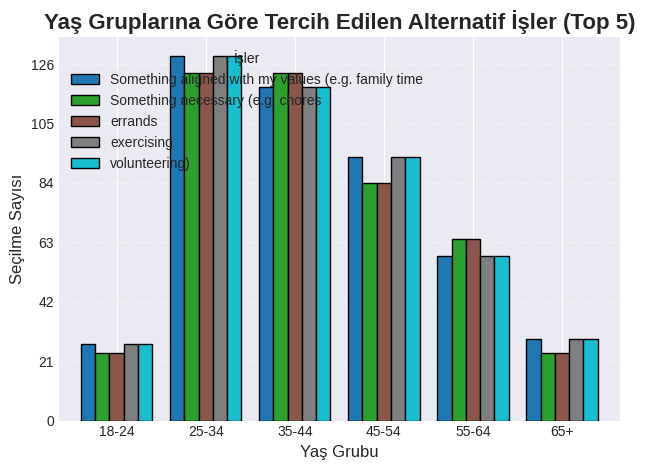

In [232]:
# Gerekli temizlik (zaten varsa tekrar sorun olmaz)
df['age_group_clean'] = df['age_group_custom'].astype(str)

df['alt_activity_clean'] = (
    df[
        'think_of_a_moment_when_you_regretted_how_you_spent_your_time_online__which_of_the_following_activities_would_you_have_preferred_to_do_instead___select_up_to_3'
    ]
    .dropna()
    .str.split(',')
)

df_exploded = df.explode('alt_activity_clean')
df_exploded['alt_activity_clean'] = df_exploded['alt_activity_clean'].str.strip()

top_activities = (
    df_exploded['alt_activity_clean']
    .value_counts()
    .head(5)
    .index
)

age_activity_counts = (
    df_exploded[
        df_exploded['alt_activity_clean'].isin(top_activities)
    ]
    .groupby(['age_group_clean', 'alt_activity_clean'])
    .size()
    .unstack(fill_value=0)
)

plt.figure(figsize=(18, 8))

ax = age_activity_counts.plot(
    kind='bar',
    width=0.8,
    colormap='tab10',
    edgecolor='black'
)

plt.title(
    "Yaş Gruplarına Göre Tercih Edilen Alternatif İşler (Top 5)",
    fontsize=16,
    fontweight='bold'
)

plt.xlabel("Yaş Grubu", fontsize=12)
plt.ylabel("Seçilme Sayısı", fontsize=12)

plt.xticks(rotation=0)

max_val = age_activity_counts.values.max()
plt.yticks(range(0, max_val + 1, max(1, int(max_val / 6))))

plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.legend(
    title="İşler",
    loc='upper left'
)

plt.tight_layout()
plt.show()


# ⏳ Yaş Gruplarına Göre Alternatif Zaman Tercihleri (Top 5)

Bu analiz, farklı yaş kuşaklarının dijital mecralarda harcadıkları zamana pişman olduklarında, bu vakti **en çok hangi 5 faaliyete** (Örn: Spor, uyku, sosyal etkileşim) harcamak istediklerini karşılaştırır.

---

### 🛠️ Teknik Uygulama
* **Veri Ayrıştırma (Explode):** Çoklu seçim yapılan aktivite listeleri bireysel veri noktalarına dönüştürülerek her yaş grubu için frekans matrisi oluşturulmuştur.
* **Top 5 Odaklanması:** Görsel karmaşayı önlemek adına tüm örneklemde en yüksek frekansa sahip ilk 5 aktivite seçilmiştir.
* **Kümelenmiş Bar Grafik:** Yaş grupları yatay eksende sabitlenmiş, her grup içindeki aktivite tercihleri renkli sütunlarla (Colormap: `tab10`) temsil edilmiştir.



---

### 💎 Analitik Katkısı
* **Kuşaksal Öncelikler:** Gençlerin (Gen Z) dijital zaman yerine fiziksel aktivite mi yoksa akademik odak mı aradığı, ileri yaş gruplarının ise sosyal bağlara mı yöneldiği saptanmıştır.
* **Zamanın Değeri:** Hangi yaş grubunun dijital dünyadan en çok "dinlenme" (uyku) çalındığını hissettiği gibi kritik sağlık verileri sunar.
* **Hedefli İçgörü:** Yaşa göre değişen "fırsat maliyeti" profili, dijital denge araçlarının hangi yaşta hangi motivasyona odaklanması gerektiğini gösterir.

> **Sonuç:** Yaş gruplarının dijital pişmanlık sonrası yönelmek istediği ideal yaşam rutinleri belirlenmiştir.